In [36]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras.layers.normalization import BatchNormalization
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import h5py
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Model
from sklearn.metrics import classification_report

In [8]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.cb = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='auto')
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True,
        callbacks = [self.cb]
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image);
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id])
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



## Setting - 1

In [9]:
filter_size1 = 6;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 16;
kernel_size2 = 5;
pool_size2 = 2;
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1700 - acc: 0.9469 - val_loss: 0.0909 - val_acc: 0.9733
Epoch 2/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0577 - acc: 0.9824 - val_loss: 0.0385 - val_acc: 0.9886
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0427 - acc: 0.9870 - val_loss: 0.0376 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0351 - acc: 0.9897 - val_loss: 0.0415 - val_acc: 0.9878
Epoch 00004: early stopping


In [10]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 4s 374us/step


[0.04153129385408884, 0.9878]

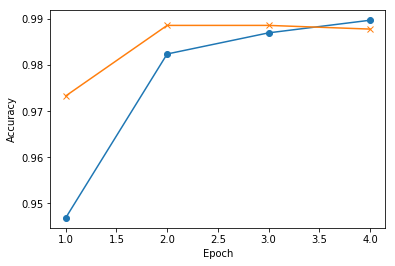

In [11]:
obj.epoch_acc();


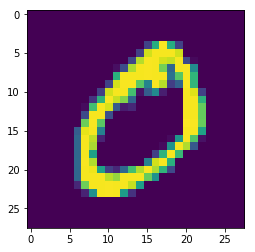

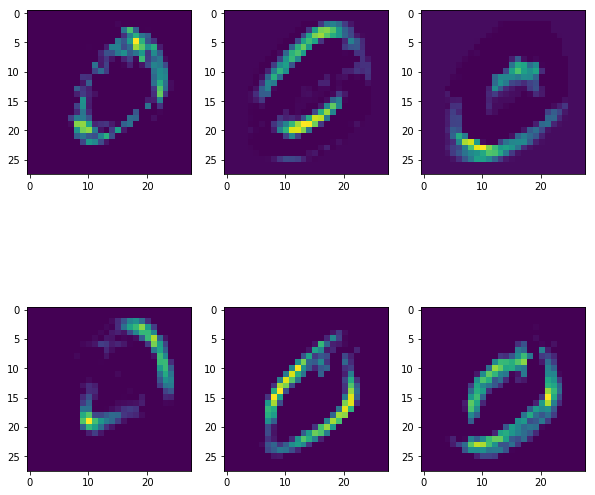

In [12]:
obj.predict_before_display(3,2,0,1);

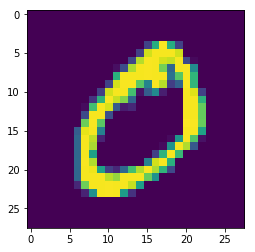

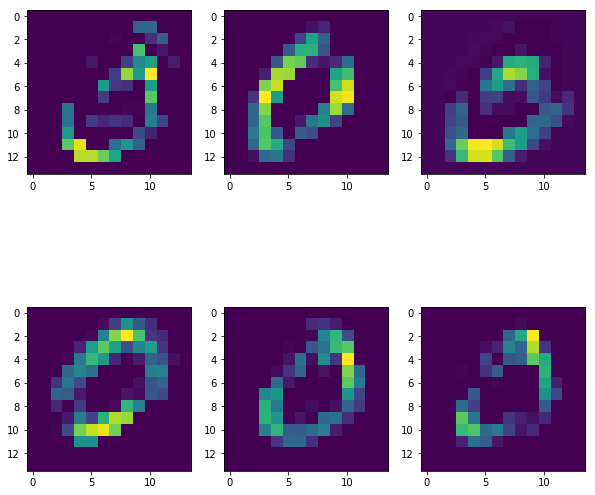

In [141]:
obj.predict_before_display(3,2,1,1);

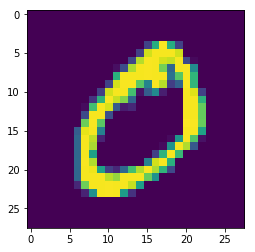

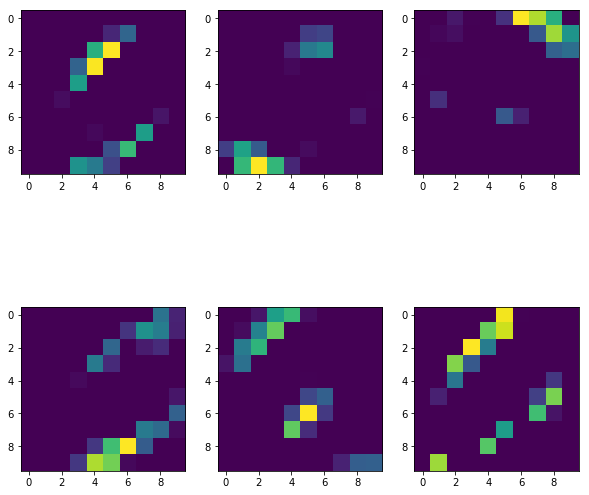

In [142]:
obj.predict_before_display(3,2,2,1);

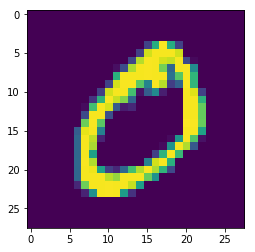

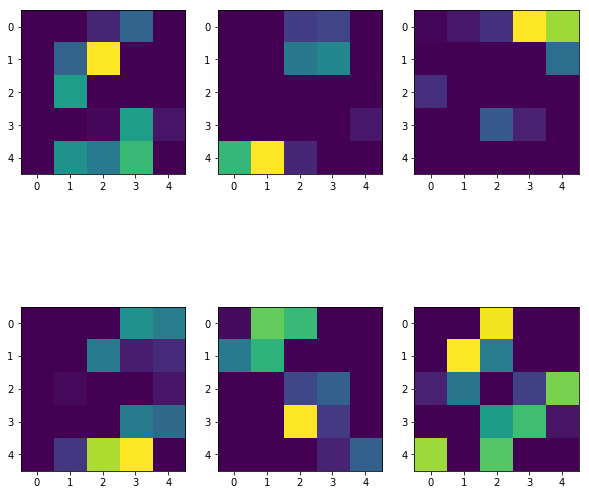

In [143]:
obj.predict_before_display(3,2,3,1);

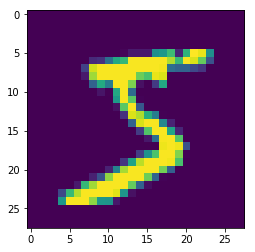

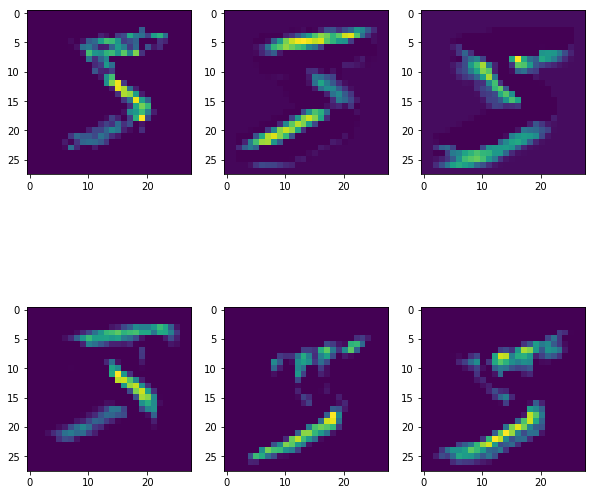

In [13]:
obj.predict_before_display(3,2,0,0);

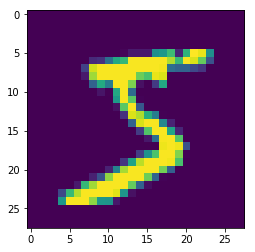

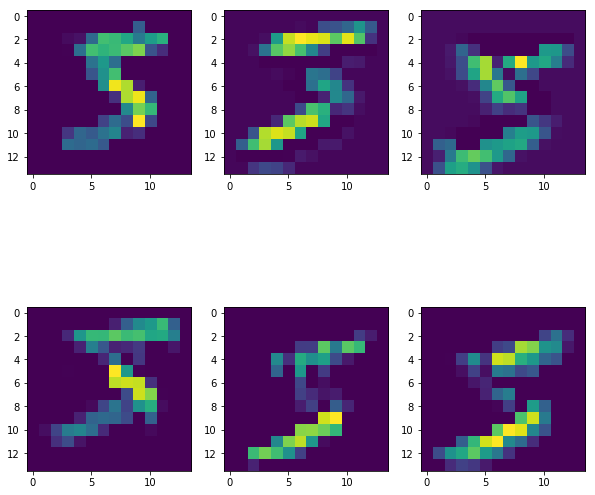

In [14]:
obj.predict_before_display(3,2,1,0);

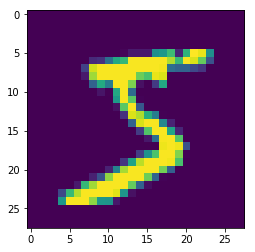

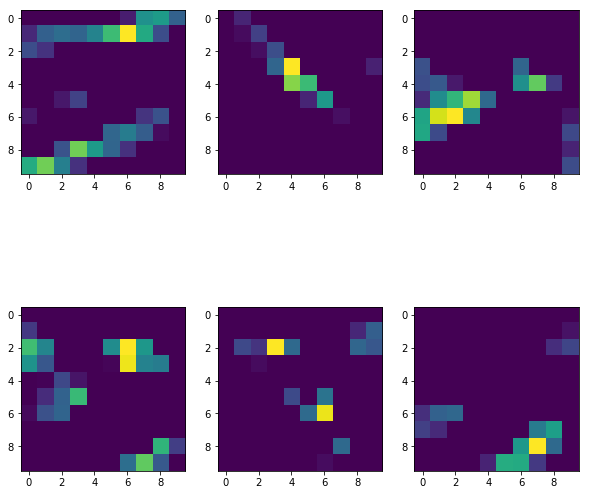

In [15]:
obj.predict_before_display(3,2,2,0);

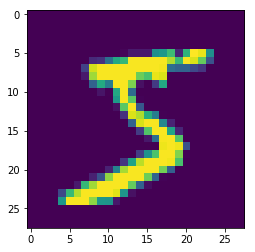

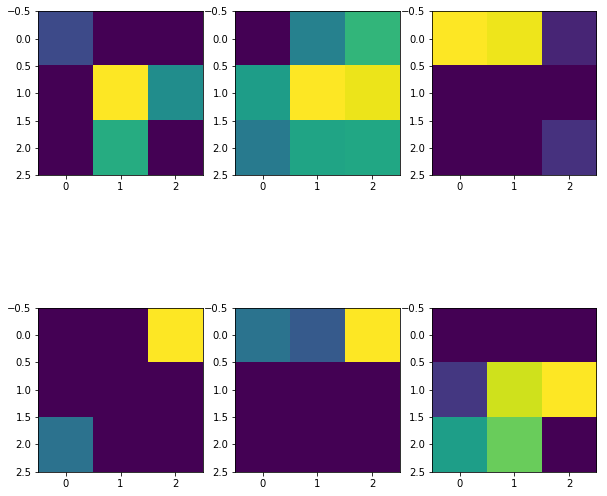

In [66]:
obj.predict_before_display(3,2,3,0);

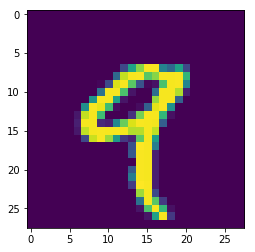

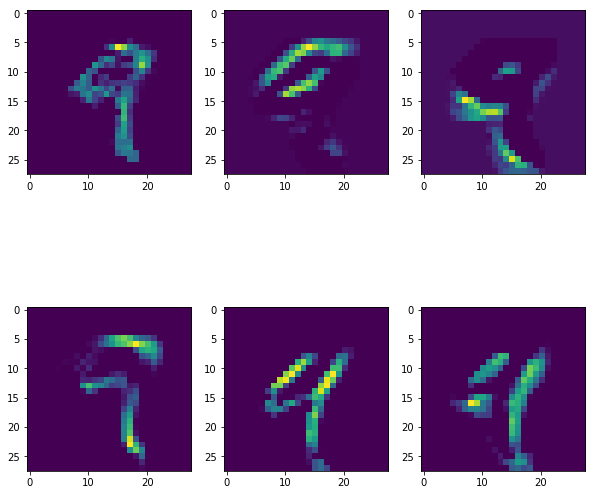

In [22]:
obj.predict_before_display(3,2,0,4);

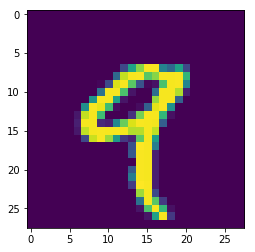

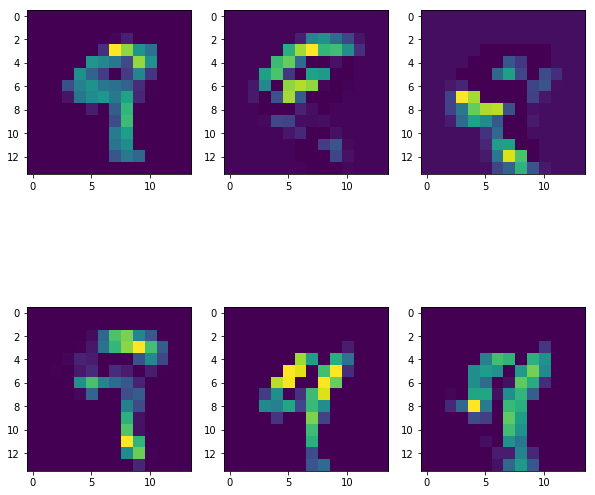

In [23]:
obj.predict_before_display(3,2,1,4);

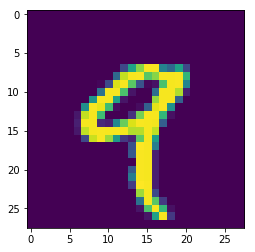

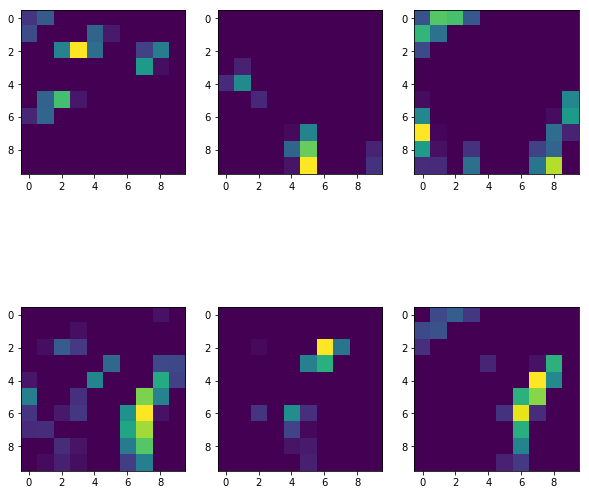

In [24]:
obj.predict_before_display(3,2,2,4);

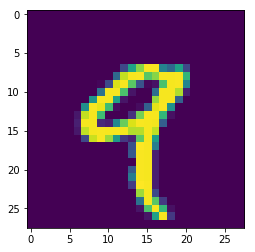

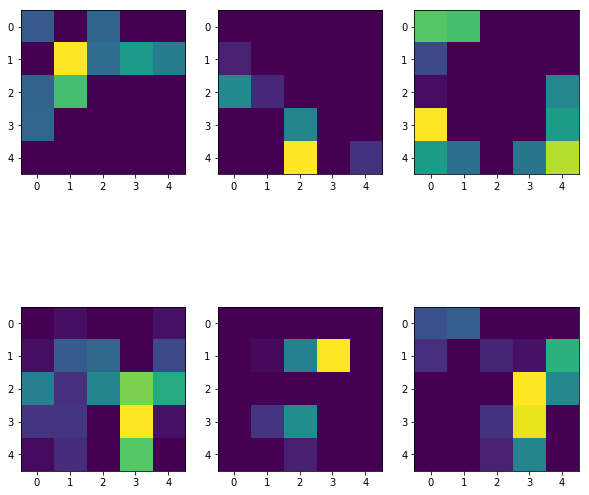

In [25]:
obj.predict_before_display(3,2,3,4);

array([[ 971,    1,    0,    0,    1,    0,    6,    1,    0,    0],
       [   0, 1132,    0,    1,    1,    0,    0,    1,    0,    0],
       [   2,    3, 1018,    1,    0,    0,    0,    6,    2,    0],
       [   0,    0,    0, 1007,    0,    2,    0,    1,    0,    0],
       [   0,    1,    0,    0,  960,    0,    1,    5,    0,   15],
       [   0,    0,    0,   11,    0,  877,    2,    1,    0,    1],
       [   3,    2,    0,    0,    1,    2,  949,    0,    1,    0],
       [   0,    2,    2,    1,    0,    0,    0, 1022,    0,    1],
       [   2,    5,    4,    2,    2,    2,    1,    6,  945,    5],
       [   0,    2,    0,    3,    1,    4,    0,    2,    0,  997]],
      dtype=int64)

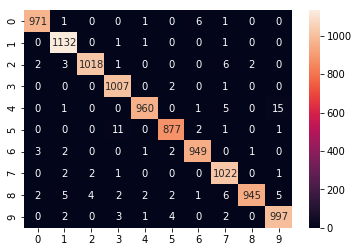

In [17]:
cm = obj.confusion_matrix();
cm

In [18]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99       980
    class 1       0.99      1.00      0.99      1135
    class 2       0.99      0.99      0.99      1032
    class 3       0.98      1.00      0.99      1010
    class 4       0.99      0.98      0.99       982
    class 5       0.99      0.98      0.99       892
    class 6       0.99      0.99      0.99       958
    class 7       0.98      0.99      0.99      1028
    class 8       1.00      0.97      0.98       974
    class 9       0.98      0.99      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [19]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                9680      
__________

## Setting - 2

In [33]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [34]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [35]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [36]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [37]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [38]:
# Increase in Filter size
filter_size1 = 16;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 26;
kernel_size2 = 5;
pool_size2 = 2;
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1406 - acc: 0.9553 - val_loss: 0.0440 - val_acc: 0.9860
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0448 - acc: 0.9863 - val_loss: 0.0510 - val_acc: 0.9850
Epoch 3/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0342 - acc: 0.9899 - val_loss: 0.0438 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0283 - acc: 0.9919 - val_loss: 0.0353 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0254 - acc: 0.9925 - val_loss: 0.0368 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0475 - val_acc: 0.9878
Epoch 7/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0212 - acc: 0.9941 - val_loss: 0.0387 - val_acc

In [39]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 5s 463us/step


[0.06772053957419066, 0.9908]

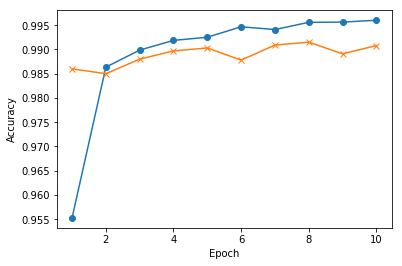

In [40]:
obj.epoch_acc();


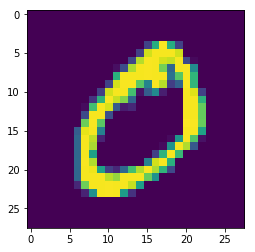

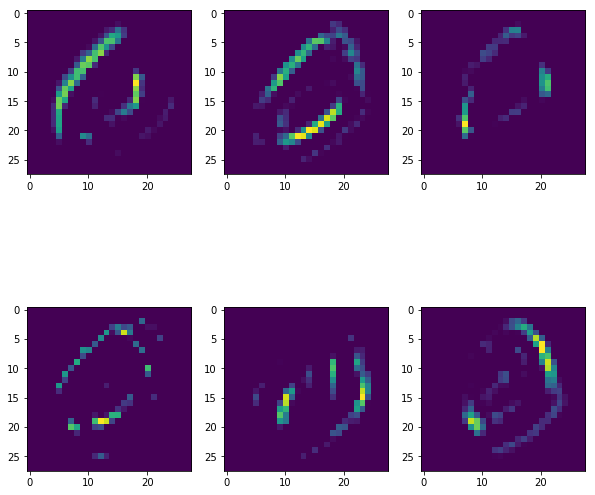

In [41]:
obj.predict_before_display(3,2,0,1);

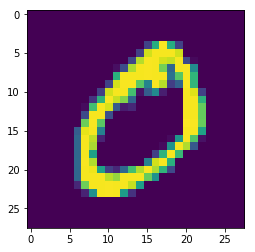

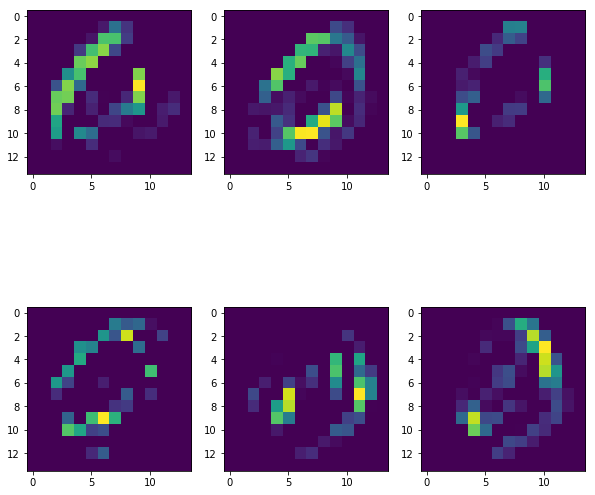

In [42]:
obj.predict_before_display(3,2,1,1);

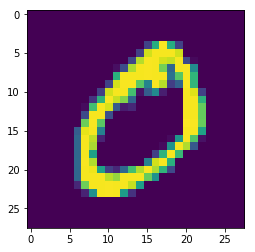

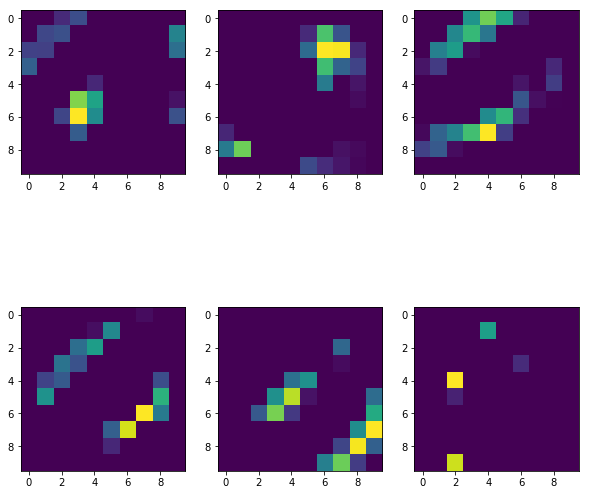

In [43]:
obj.predict_before_display(3,2,2,1);

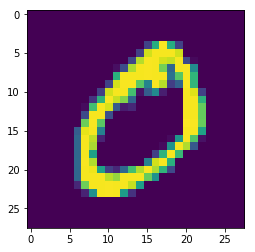

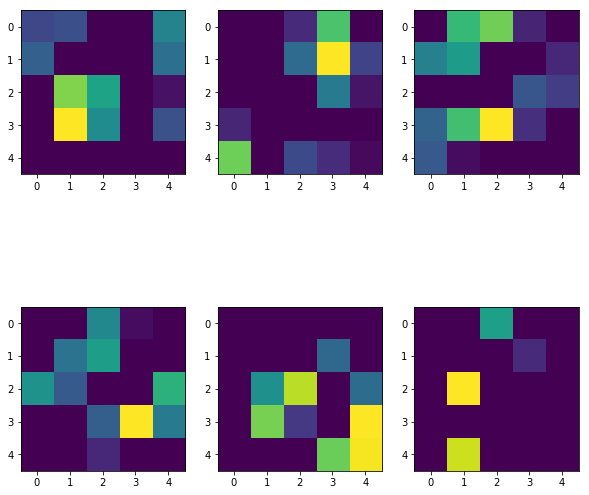

In [44]:
obj.predict_before_display(3,2,3,1);

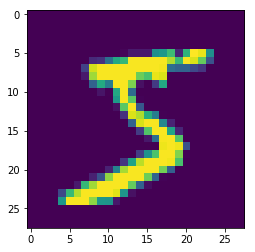

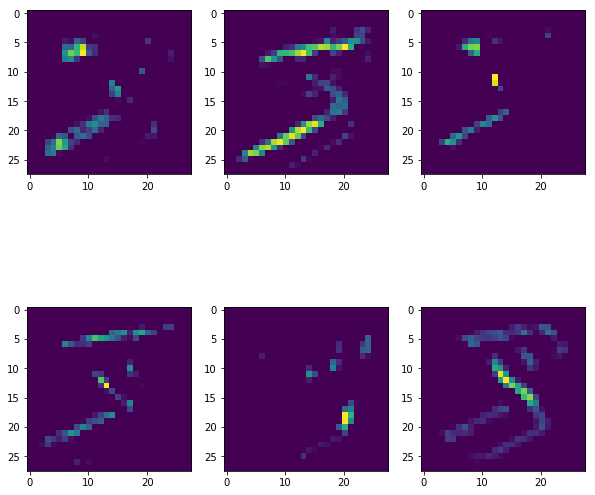

In [45]:
obj.predict_before_display(3,2,0,0);

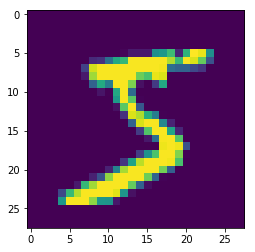

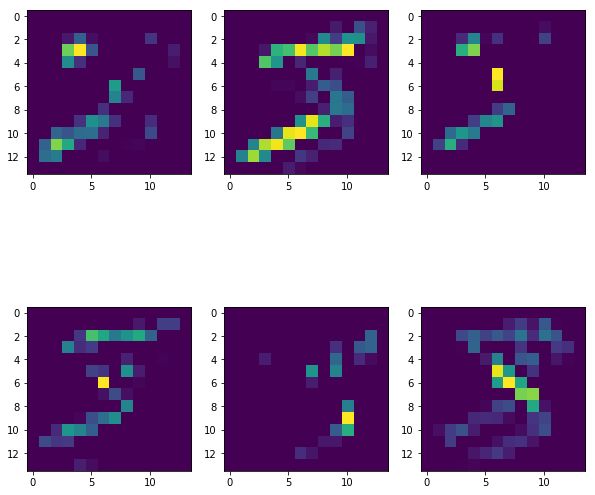

In [46]:
obj.predict_before_display(3,2,1,0);

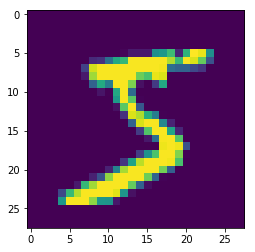

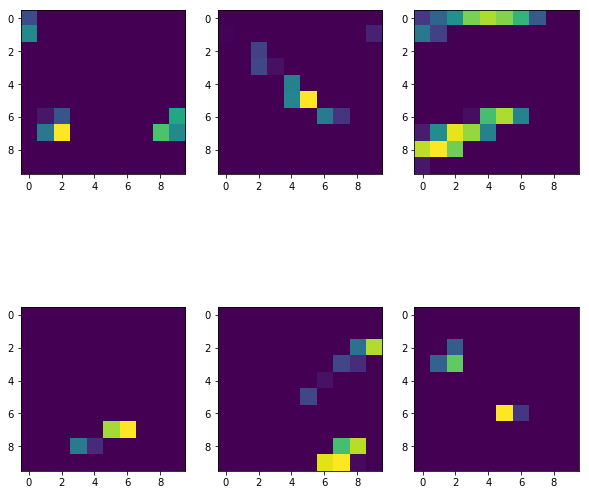

In [47]:
obj.predict_before_display(3,2,2,0);

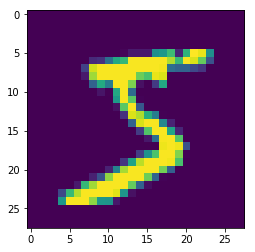

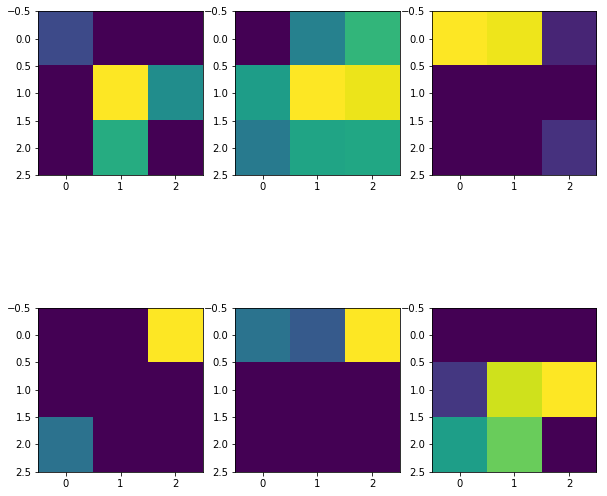

In [67]:
obj.predict_before_display(3,2,3,0);

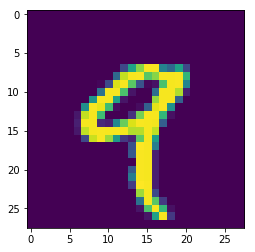

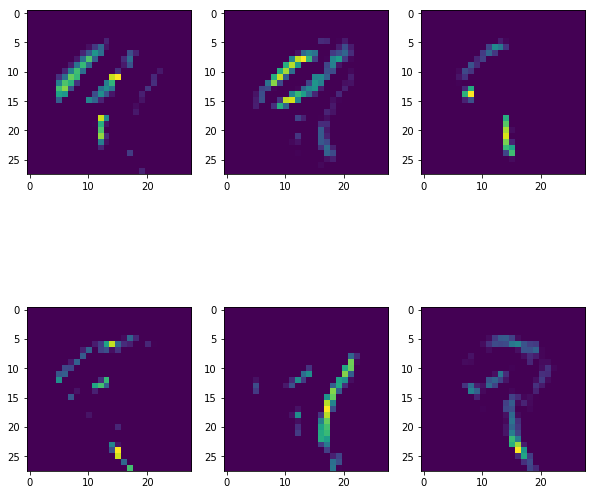

In [49]:
obj.predict_before_display(3,2,0,4);

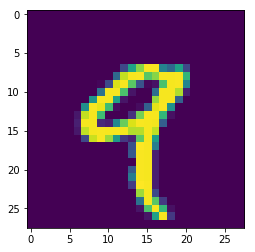

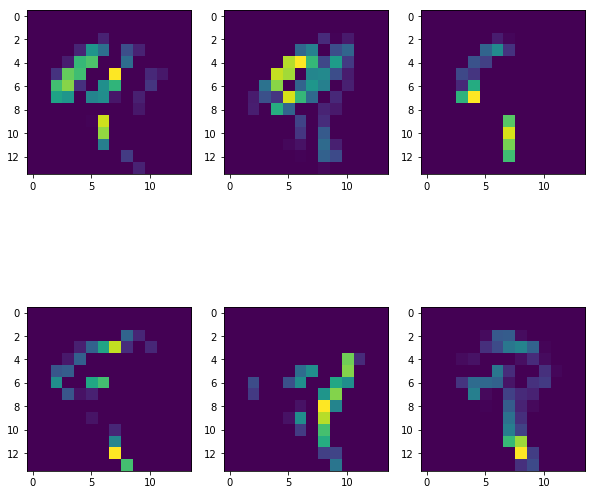

In [50]:
obj.predict_before_display(3,2,1,4);

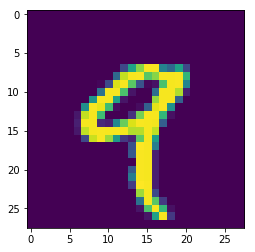

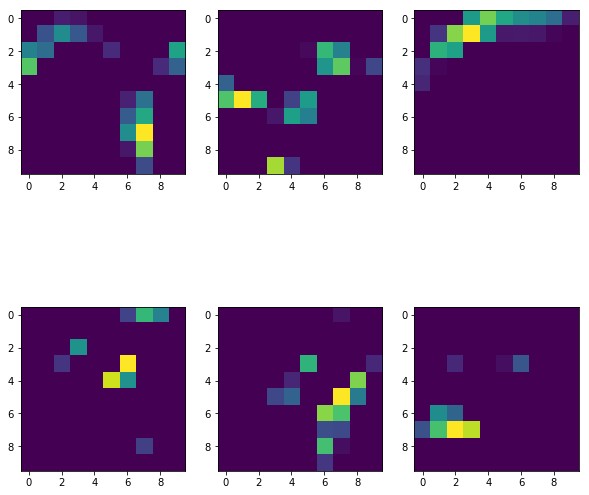

In [51]:
obj.predict_before_display(3,2,2,4);

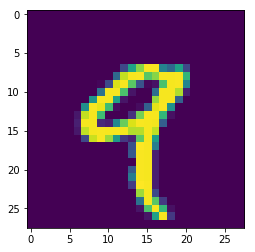

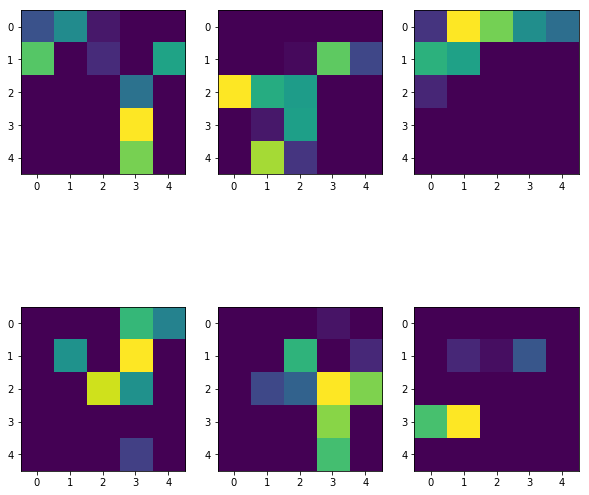

In [52]:
obj.predict_before_display(3,2,3,4);

array([[ 976,    0,    0,    0,    0,    0,    2,    2,    0,    0],
       [   1, 1131,    0,    1,    0,    0,    2,    0,    0,    0],
       [   1,    0, 1028,    0,    0,    0,    0,    2,    1,    0],
       [   0,    1,    5,  999,    0,    1,    0,    2,    1,    1],
       [   0,    0,    0,    0,  974,    0,    6,    0,    0,    2],
       [   2,    0,    0,   10,    0,  873,    6,    0,    1,    0],
       [   0,    1,    1,    0,    0,    1,  954,    0,    1,    0],
       [   0,    3,    3,    0,    0,    0,    0, 1021,    0,    1],
       [   4,    0,    4,    1,    1,    0,    1,    2,  959,    2],
       [   1,    0,    2,    0,    5,    3,    0,    5,    0,  993]],
      dtype=int64)

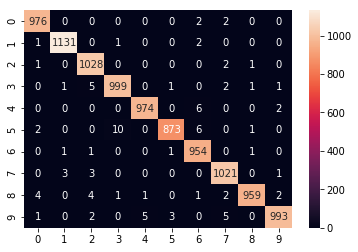

In [53]:
cm = obj.confusion_matrix();
cm

In [54]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      1.00      0.99       980
    class 1       1.00      1.00      1.00      1135
    class 2       0.99      1.00      0.99      1032
    class 3       0.99      0.99      0.99      1010
    class 4       0.99      0.99      0.99       982
    class 5       0.99      0.98      0.99       892
    class 6       0.98      1.00      0.99       958
    class 7       0.99      0.99      0.99      1028
    class 8       1.00      0.98      0.99       974
    class 9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [55]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 26)        10426     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 26)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 650)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               78120     
_________________________________________________________________
dense_11 (Dense)             (None, 80)                9680      
__________

## Setting - 3

In [86]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [87]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [88]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [89]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [90]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [91]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.cb = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='auto')
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True,
        callbacks = [self.cb]
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [92]:
# increasing both the kernel  sizes
filter_size1 = 6;
kernel_size1 = 9;
pool_size1 = 2;
filter_size2 = 16;
kernel_size2 = 9;
pool_size2 = 2;
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.2215 - acc: 0.9313 - val_loss: 0.0672 - val_acc: 0.9795
Epoch 2/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0742 - acc: 0.9777 - val_loss: 0.0558 - val_acc: 0.9820
Epoch 3/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0543 - acc: 0.9836 - val_loss: 0.0657 - val_acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0717 - val_acc: 0.9807
Epoch 00004: early stopping


In [93]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 6s 623us/step


[0.07166753204037049, 0.9807]

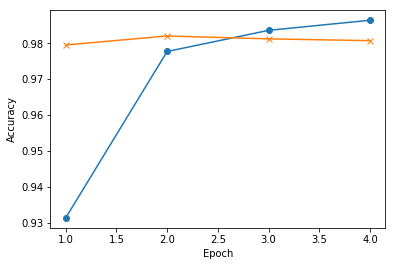

In [94]:
obj.epoch_acc();


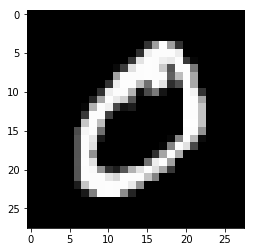

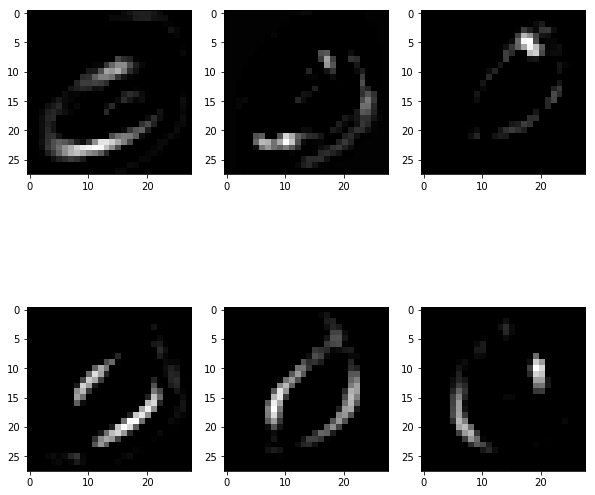

In [95]:
obj.predict_before_display(3,2,0,1);

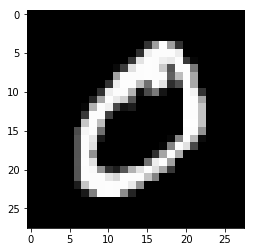

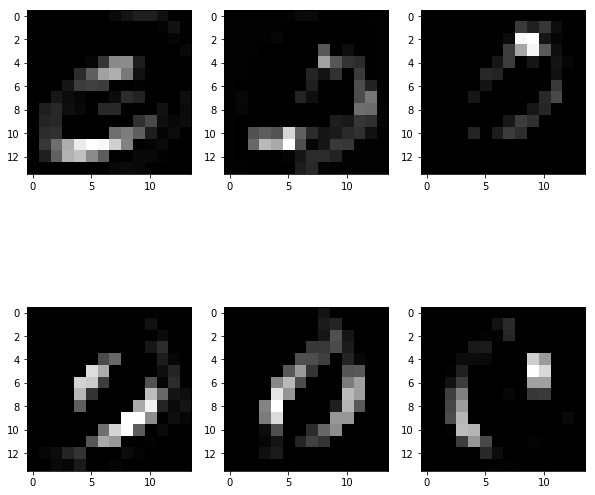

In [96]:
obj.predict_before_display(3,2,1,1);

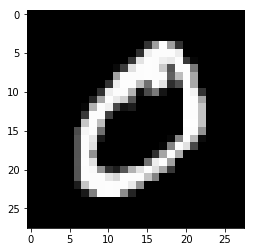

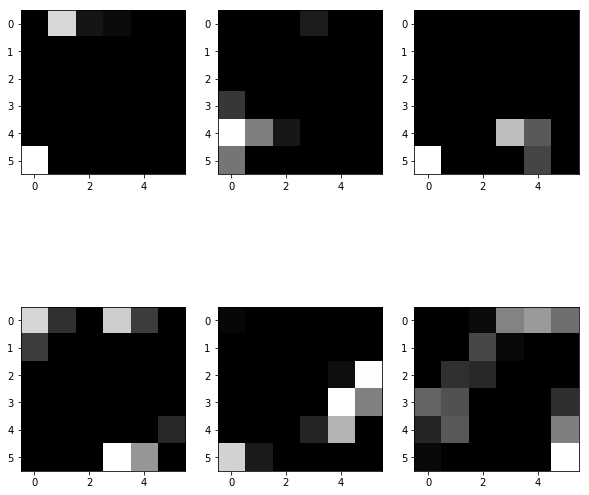

In [97]:
obj.predict_before_display(3,2,2,1);

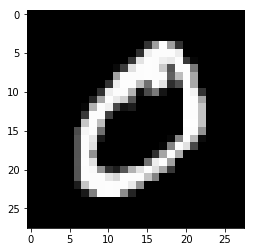

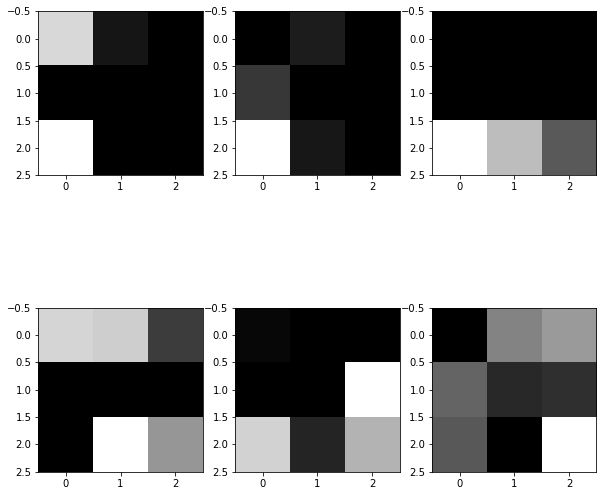

In [98]:
obj.predict_before_display(3,2,3,1);

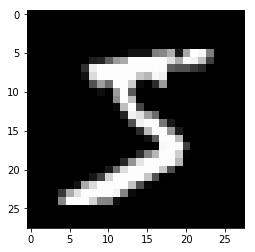

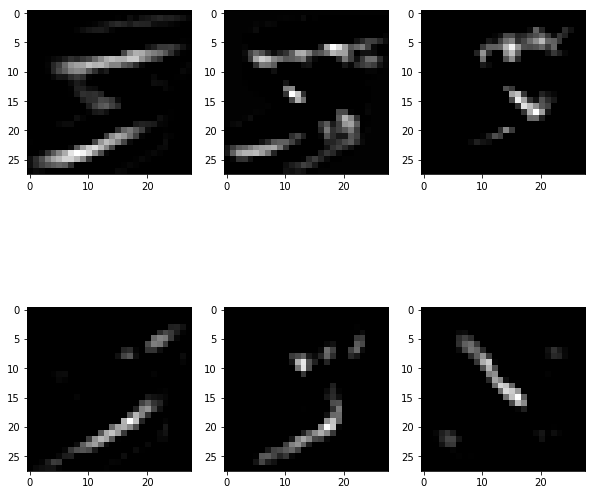

In [99]:
obj.predict_before_display(3,2,0,0);

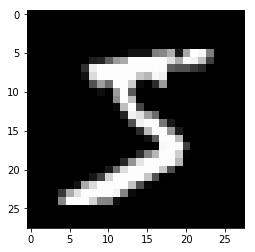

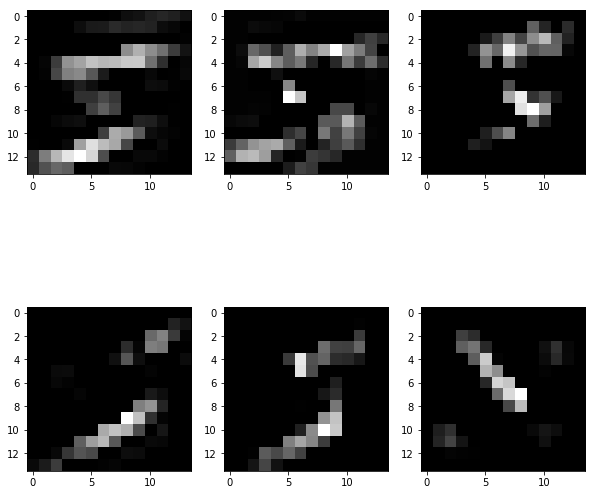

In [100]:
obj.predict_before_display(3,2,1,0);

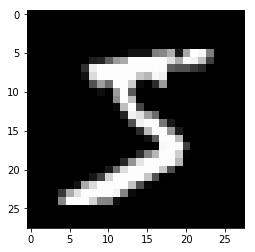

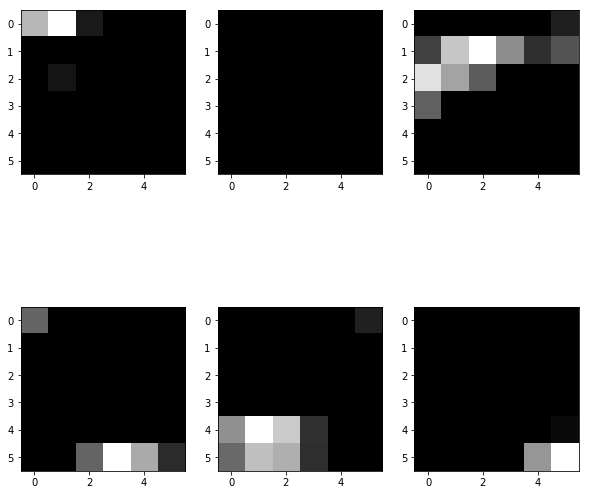

In [101]:
obj.predict_before_display(3,2,2,0);

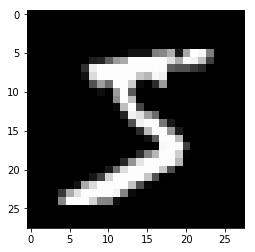

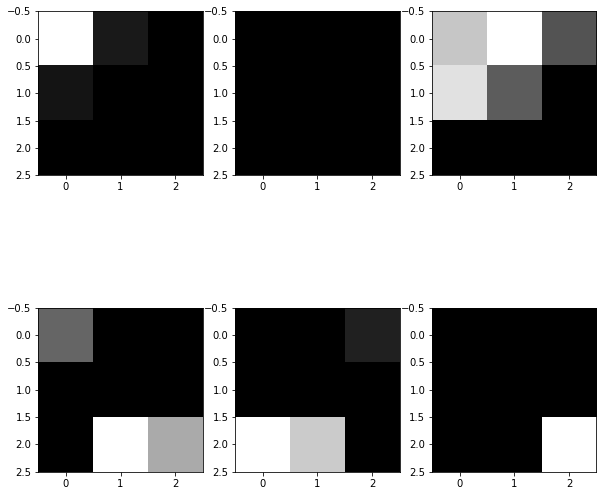

In [102]:
obj.predict_before_display(3,2,3,0);

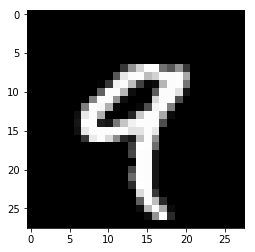

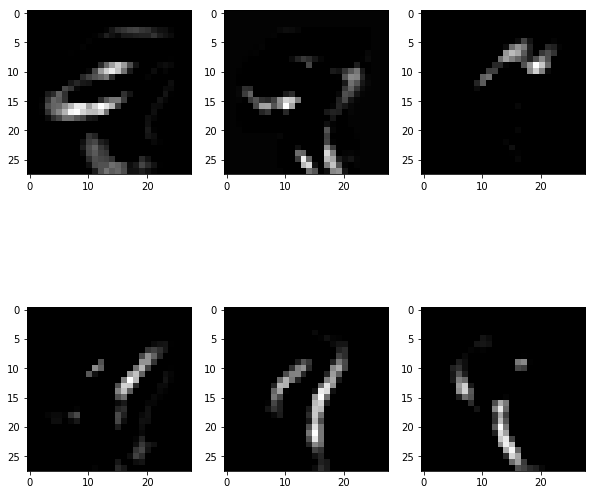

In [103]:
obj.predict_before_display(3,2,0,4);

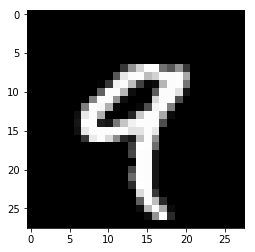

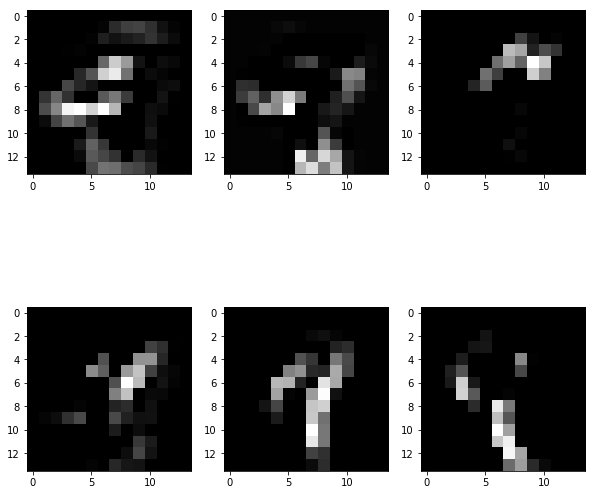

In [104]:
obj.predict_before_display(3,2,1,4);

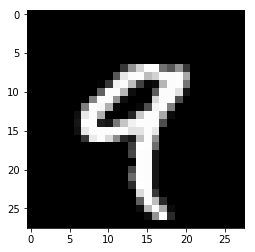

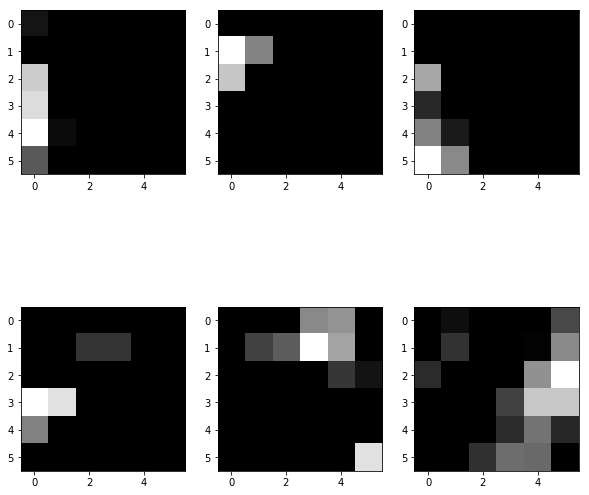

In [105]:
obj.predict_before_display(3,2,2,4);

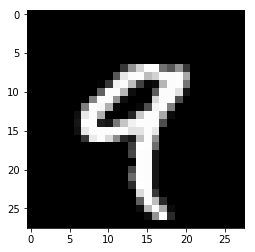

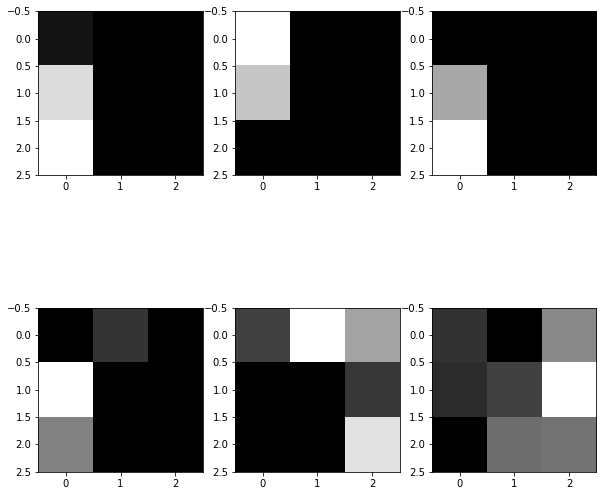

In [106]:
obj.predict_before_display(3,2,3,4);

array([[ 974,    0,    0,    0,    0,    0,    0,    3,    3,    0],
       [   3, 1118,    1,    5,    0,    0,    1,    4,    1,    2],
       [   1,    1, 1016,    7,    0,    0,    0,    5,    2,    0],
       [   0,    0,    0, 1004,    0,    0,    0,    3,    2,    1],
       [   0,    0,    2,    0,  942,    0,    2,    3,    1,   32],
       [   3,    0,    0,   29,    0,  855,    1,    1,    2,    1],
       [  10,    2,    0,    1,    2,    4,  934,    0,    5,    0],
       [   0,    1,    6,    2,    0,    0,    0, 1016,    1,    2],
       [   1,    0,    1,    9,    1,    1,    0,    2,  957,    2],
       [   1,    1,    1,    4,    3,    1,    0,    3,    4,  991]],
      dtype=int64)

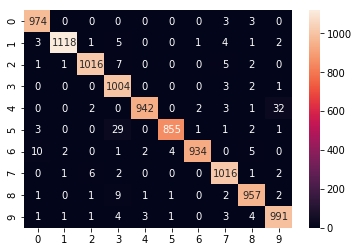

In [107]:
cm = obj.confusion_matrix();
cm

In [108]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.98      0.99      0.99       980
    class 1       1.00      0.99      0.99      1135
    class 2       0.99      0.98      0.99      1032
    class 3       0.95      0.99      0.97      1010
    class 4       0.99      0.96      0.98       982
    class 5       0.99      0.96      0.98       892
    class 6       1.00      0.97      0.99       958
    class 7       0.98      0.99      0.98      1028
    class 8       0.98      0.98      0.98       974
    class 9       0.96      0.98      0.97      1009

avg / total       0.98      0.98      0.98     10000



In [109]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         492       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 16)          7792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)               17400     
_________________________________________________________________
dense_23 (Dense)             (None, 80)                9680      
__________

## Setting - 4

In [110]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [111]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [112]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [113]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [114]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [115]:
# increasing both the filter size and the kernel sizes
filter_size1 = 16;
kernel_size1 = 9;
pool_size1 = 2;
filter_size2 = 26;
kernel_size2 = 9;
pool_size2 = 2;
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1558 - acc: 0.9502 - val_loss: 0.0503 - val_acc: 0.9846
Epoch 2/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0530 - acc: 0.9849 - val_loss: 0.0305 - val_acc: 0.9903
Epoch 3/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0393 - acc: 0.9893 - val_loss: 0.0537 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0344 - acc: 0.9908 - val_loss: 0.0440 - val_acc: 0.9882
Epoch 00004: early stopping


In [116]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 7s 729us/step


[0.043981444334866594, 0.9882]

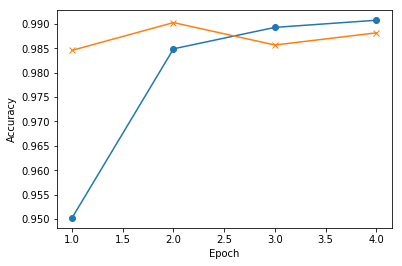

In [117]:
obj.epoch_acc();


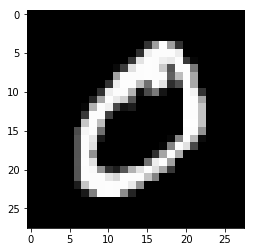

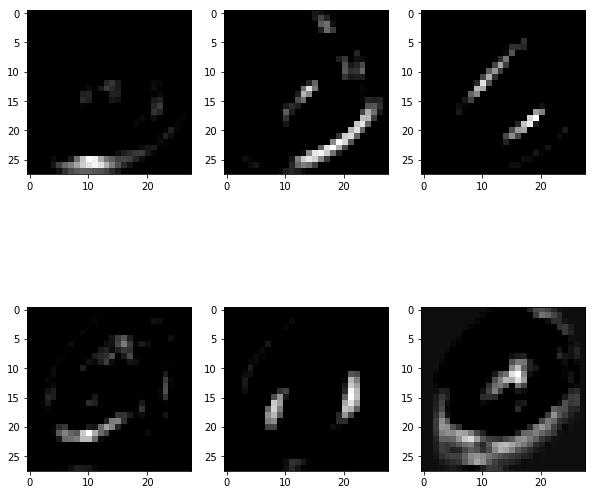

In [118]:
obj.predict_before_display(3,2,0,1);

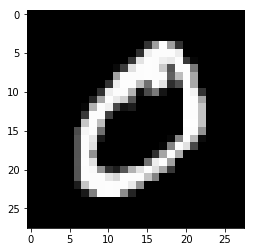

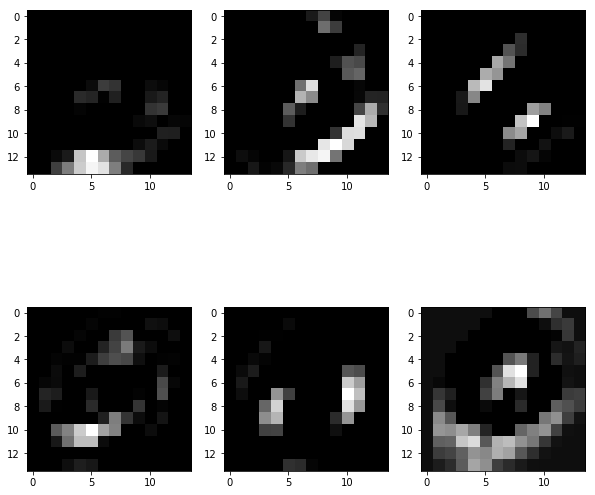

In [119]:
obj.predict_before_display(3,2,1,1);

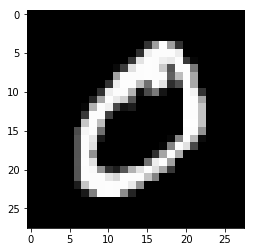

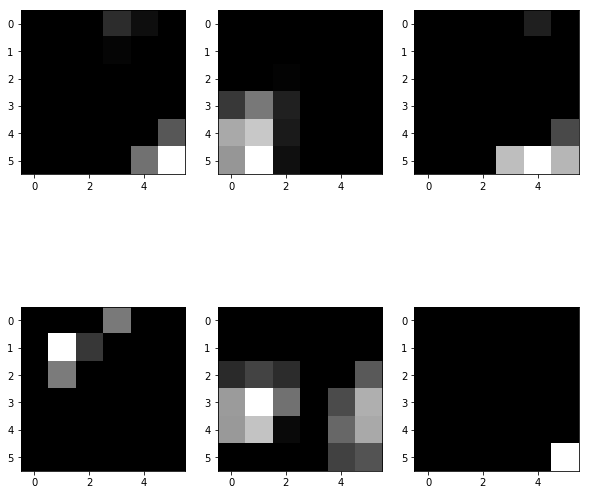

In [120]:
obj.predict_before_display(3,2,2,1);

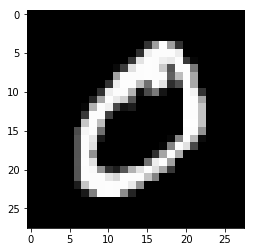

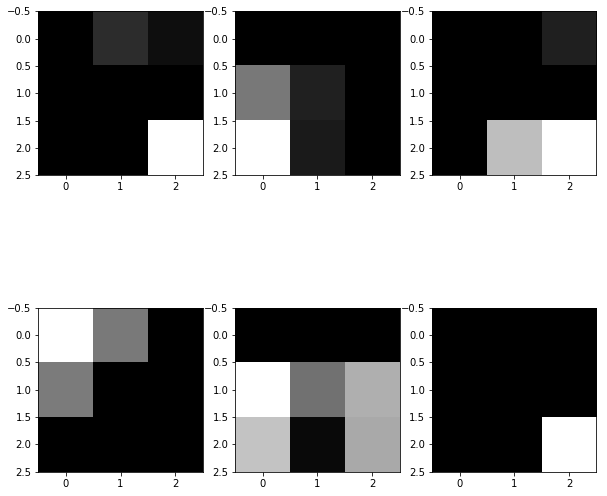

In [121]:
obj.predict_before_display(3,2,3,1);

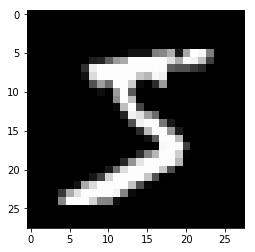

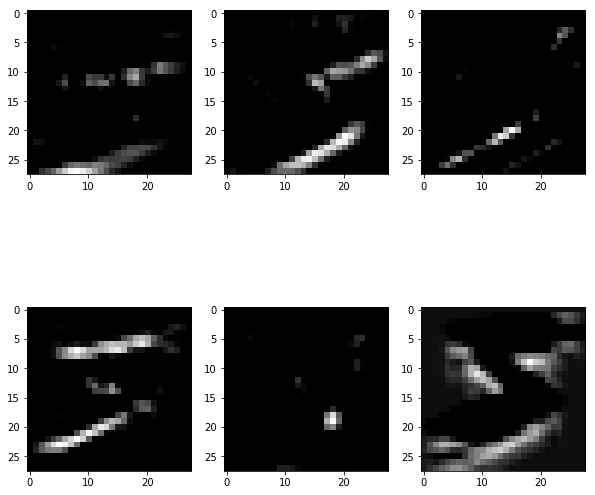

In [122]:
obj.predict_before_display(3,2,0,0);

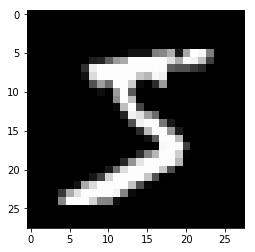

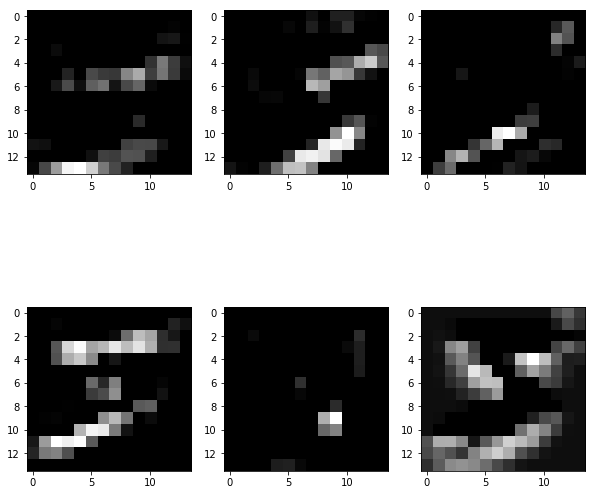

In [123]:
obj.predict_before_display(3,2,1,0);

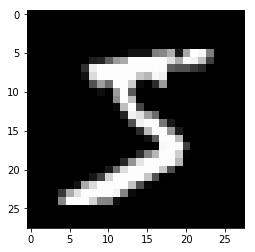

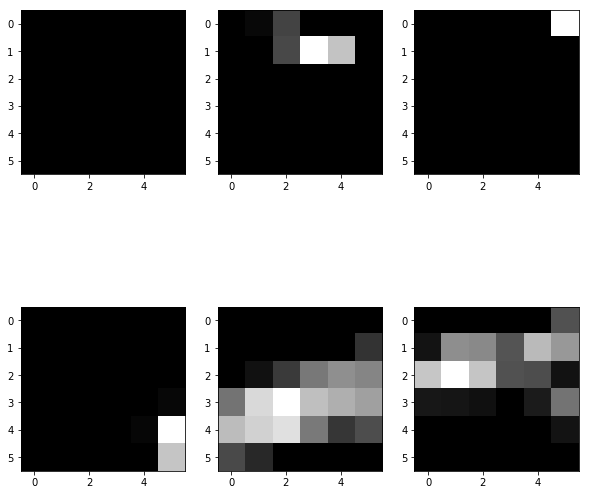

In [124]:
obj.predict_before_display(3,2,2,0);

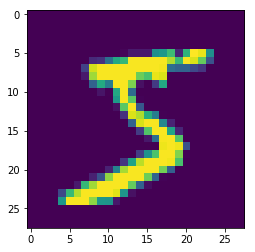

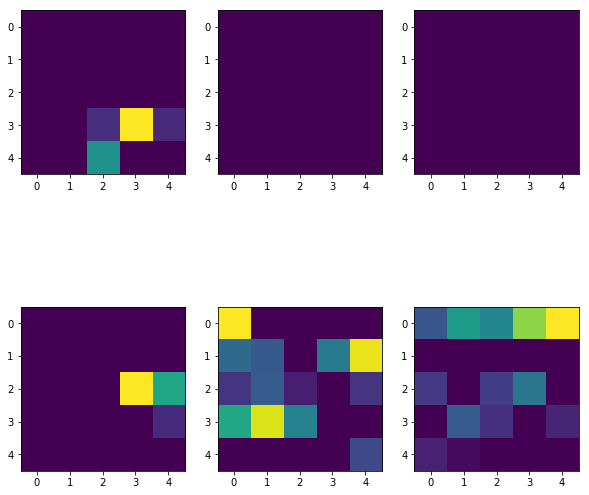

In [145]:
obj.predict_before_display(3,2,3,0);

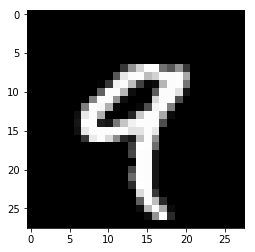

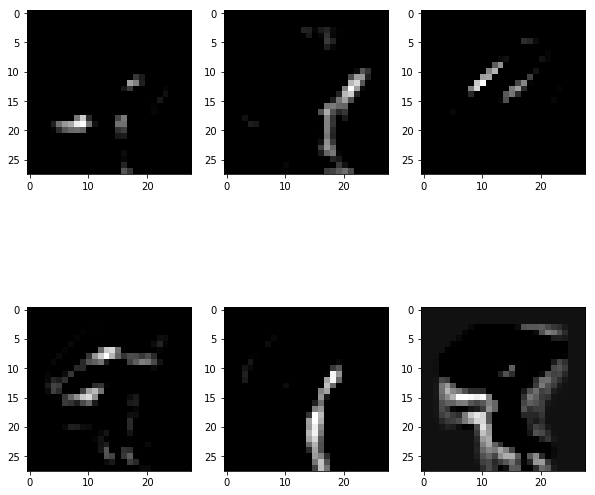

In [126]:
obj.predict_before_display(3,2,0,4);

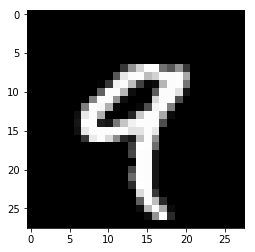

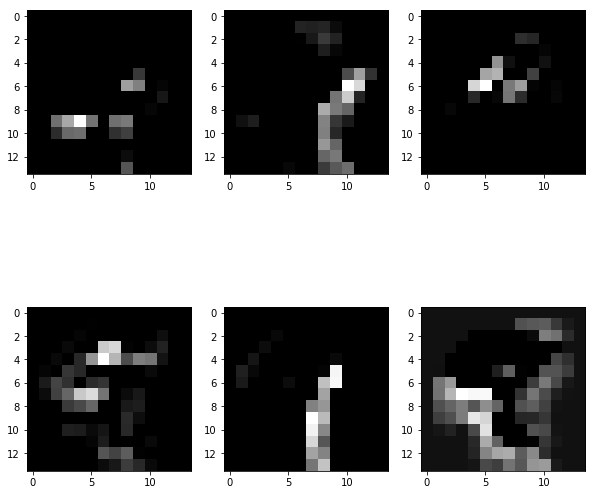

In [127]:
obj.predict_before_display(3,2,1,4);

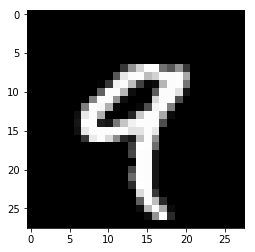

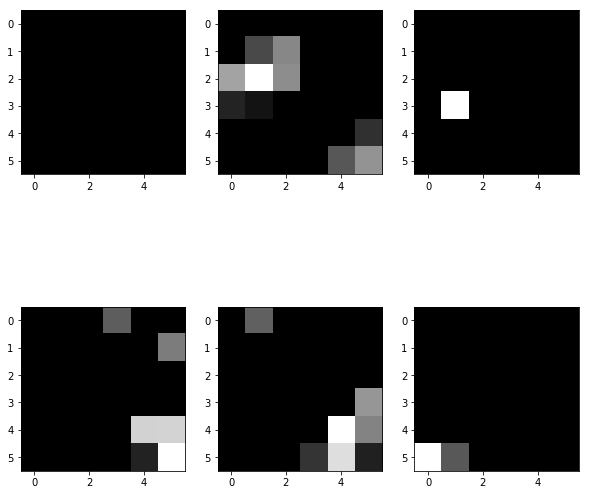

In [128]:
obj.predict_before_display(3,2,2,4);

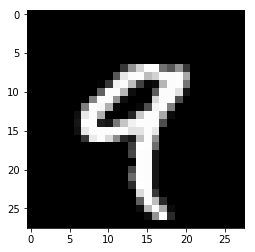

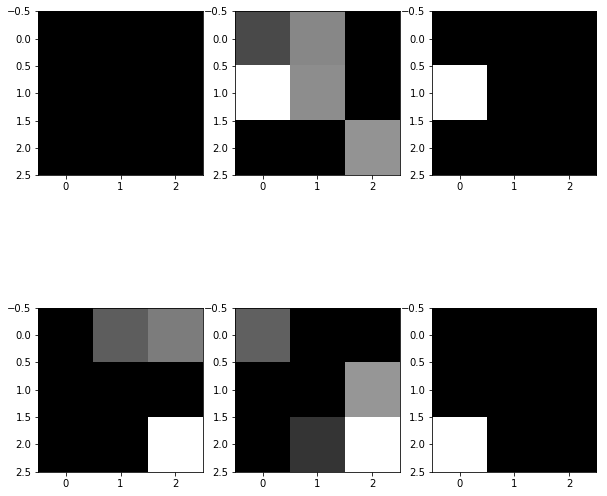

In [129]:
obj.predict_before_display(3,2,3,4);

array([[ 969,    1,    0,    0,    0,    5,    4,    0,    0,    1],
       [   0, 1131,    0,    1,    0,    1,    1,    1,    0,    0],
       [   2,    1, 1022,    1,    0,    0,    0,    5,    1,    0],
       [   0,    0,    2,  997,    0,    9,    0,    1,    0,    1],
       [   0,    0,    2,    0,  976,    0,    1,    0,    0,    3],
       [   1,    0,    0,    4,    0,  886,    1,    0,    0,    0],
       [   2,    1,    0,    0,    2,    5,  940,    0,    8,    0],
       [   0,    3,    2,    2,    1,    1,    0, 1013,    1,    5],
       [   1,    0,    2,    0,    0,    4,    0,    0,  963,    4],
       [   0,    1,    0,    0,   12,   11,    0,    0,    0,  985]],
      dtype=int64)

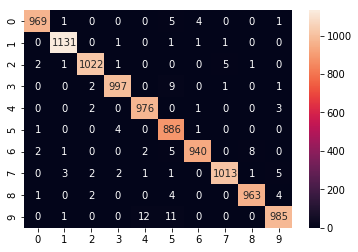

In [130]:
cm = obj.confusion_matrix();
cm

In [131]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99       980
    class 1       0.99      1.00      1.00      1135
    class 2       0.99      0.99      0.99      1032
    class 3       0.99      0.99      0.99      1010
    class 4       0.98      0.99      0.99       982
    class 5       0.96      0.99      0.98       892
    class 6       0.99      0.98      0.99       958
    class 7       0.99      0.99      0.99      1028
    class 8       0.99      0.99      0.99       974
    class 9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [132]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        1312      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 26)          33722     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 3, 26)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 234)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 120)               28200     
_________________________________________________________________
dense_26 (Dense)             (None, 80)                9680      
__________

## Setting - 5

In [146]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [147]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [148]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [149]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [150]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [152]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [153]:
# increasing the dense size
filter_size1 = 6;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 16;
kernel_size2 = 5;
pool_size2 = 2
dense_size1 = 240;
dense_size2 = 160;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 49s 818us/step - loss: 0.1455 - acc: 0.9549 - val_loss: 0.0456 - val_acc: 0.9860
Epoch 2/10
60000/60000 [==============================] - 49s 814us/step - loss: 0.0559 - acc: 0.9834 - val_loss: 0.0613 - val_acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 49s 819us/step - loss: 0.0437 - acc: 0.9874 - val_loss: 0.0573 - val_acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 49s 824us/step - loss: 0.0383 - acc: 0.9890 - val_loss: 0.0450 - val_acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 52s 873us/step - loss: 0.0338 - acc: 0.9908 - val_loss: 0.0434 - val_acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 52s 868us/step - loss: 0.0316 - acc: 0.9913 - val_loss: 0.0448 - val_acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 52s 862us/step - loss: 0.0302 - acc: 0.9919 - val_loss: 0.

In [154]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 3s 347us/step


[0.06320498333303276, 0.9869]

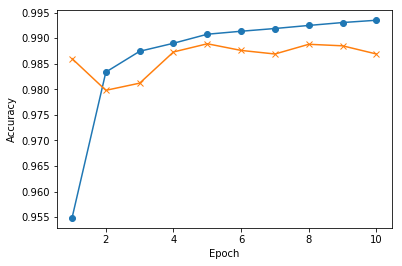

In [155]:
obj.epoch_acc();


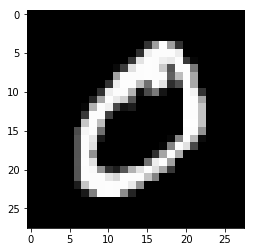

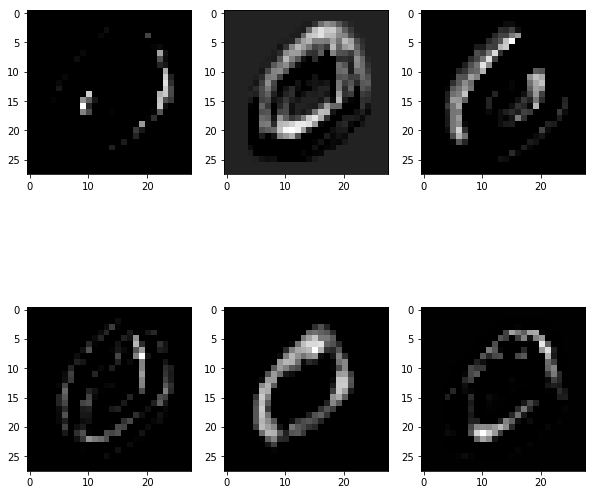

In [156]:
obj.predict_before_display(3,2,0,1);

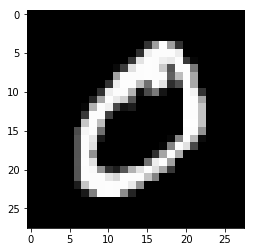

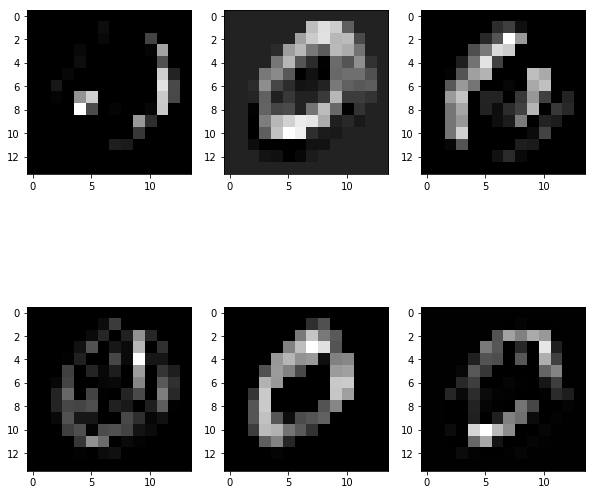

In [157]:
obj.predict_before_display(3,2,1,1);

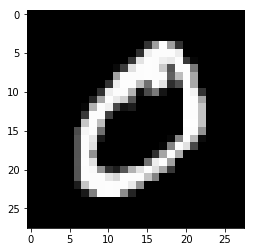

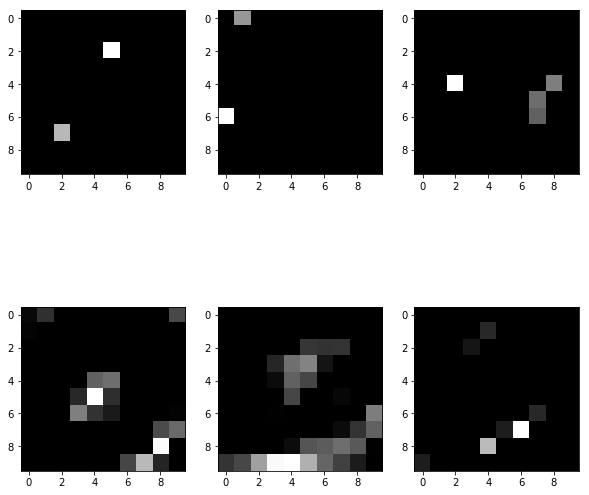

In [158]:
obj.predict_before_display(3,2,2,1);

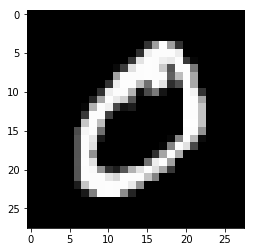

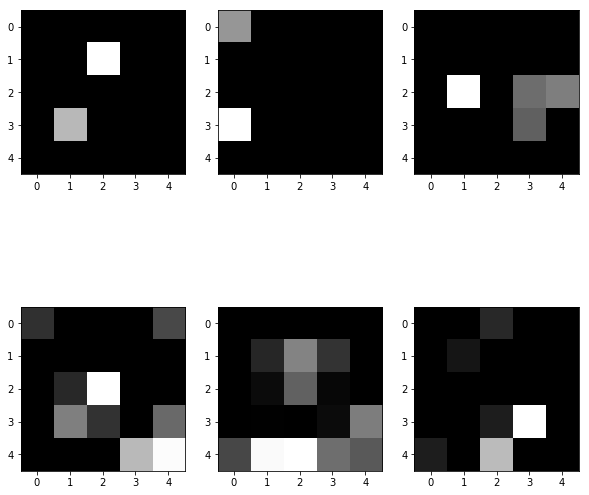

In [159]:
obj.predict_before_display(3,2,3,1);

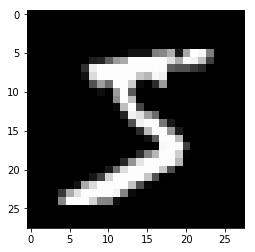

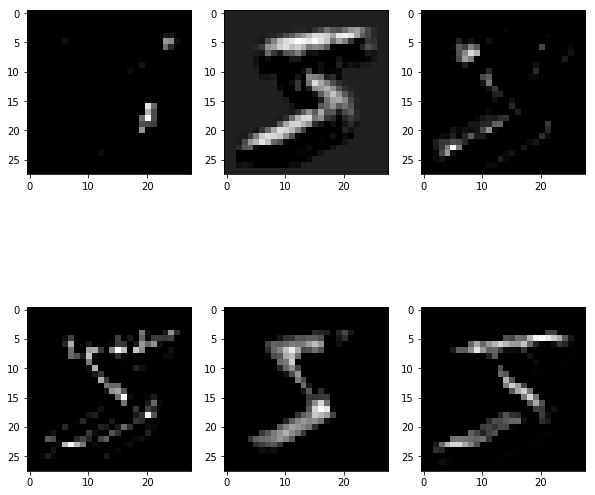

In [160]:
obj.predict_before_display(3,2,0,0);

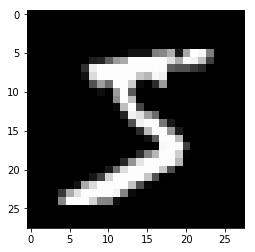

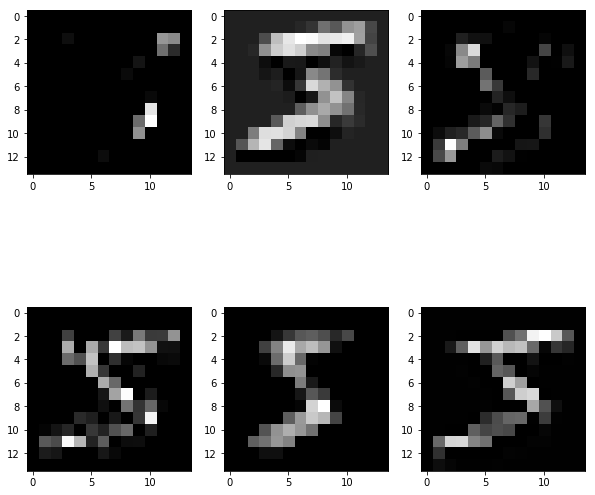

In [161]:
obj.predict_before_display(3,2,1,0);

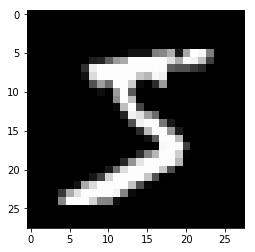

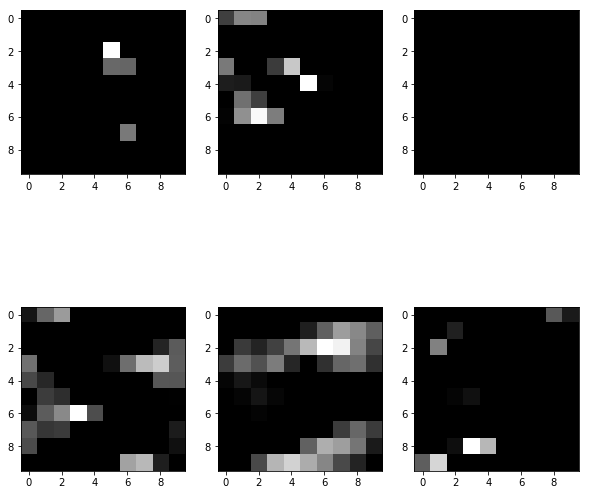

In [162]:
obj.predict_before_display(3,2,2,0);

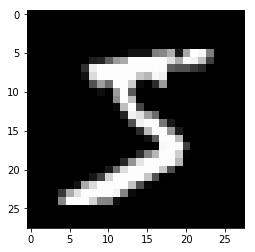

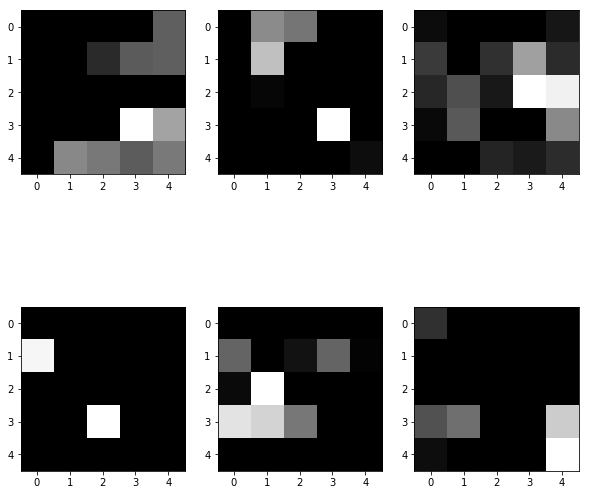

In [202]:
obj.predict_before_display(3,2,3,0);

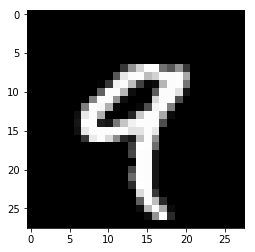

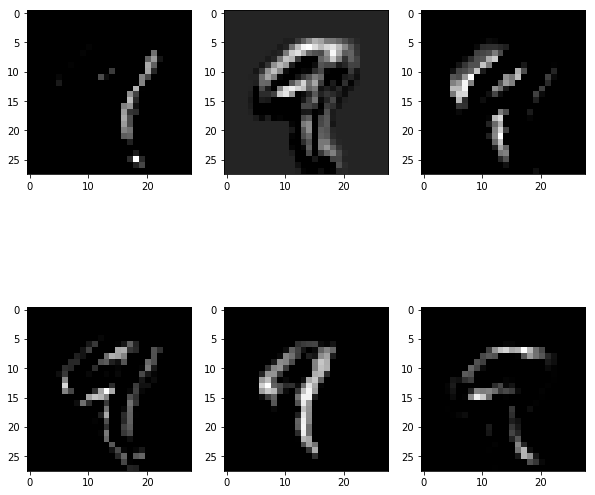

In [164]:
obj.predict_before_display(3,2,0,4);

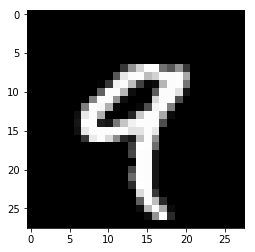

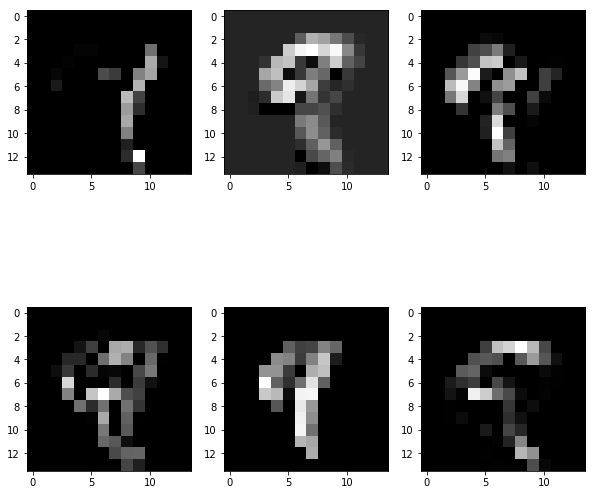

In [165]:
obj.predict_before_display(3,2,1,4);

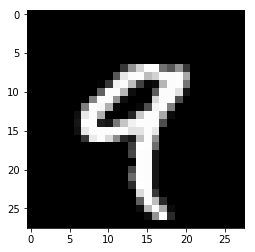

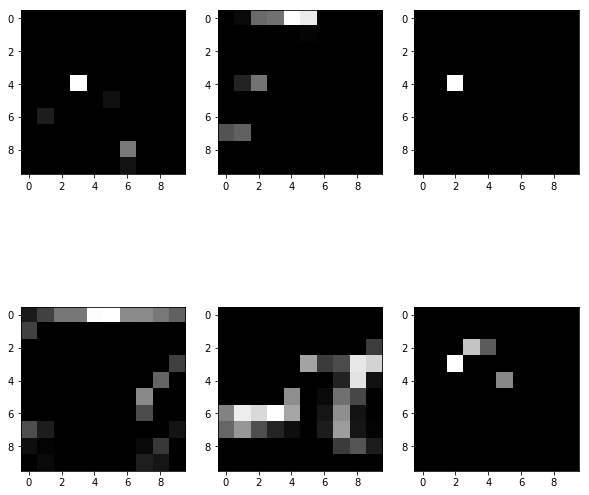

In [166]:
obj.predict_before_display(3,2,2,4);

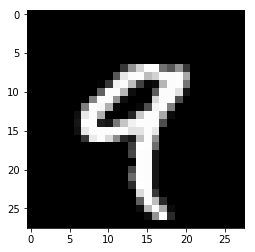

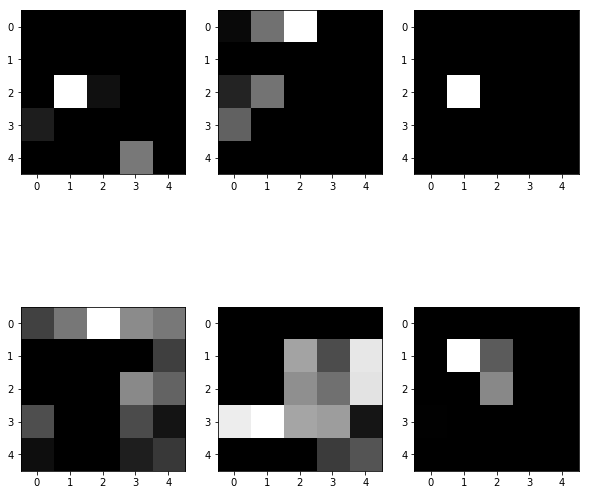

In [167]:
obj.predict_before_display(3,2,3,4);

array([[ 976,    0,    0,    0,    0,    1,    0,    1,    2,    0],
       [   0, 1129,    2,    0,    0,    2,    1,    0,    1,    0],
       [   1,    1, 1025,    0,    0,    0,    0,    2,    3,    0],
       [   1,    0,    5,  999,    0,    4,    0,    1,    0,    0],
       [   0,    1,    1,    0,  966,    0,    2,    0,    3,    9],
       [   2,    0,    0,    5,    0,  881,    1,    0,    3,    0],
       [  15,    2,    2,    0,    1,    1,  932,    0,    5,    0],
       [   0,    1,    7,    1,    0,    0,    0, 1017,    1,    1],
       [   5,    1,    3,    1,    0,    1,    1,    1,  958,    3],
       [   1,    1,    0,    1,    3,    3,    0,   10,    4,  986]],
      dtype=int64)

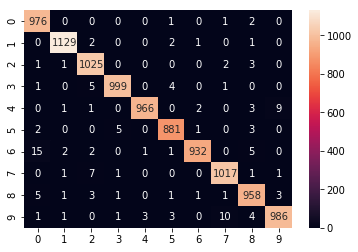

In [168]:
cm = obj.confusion_matrix();
cm

In [169]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.98      1.00      0.99       980
    class 1       0.99      0.99      0.99      1135
    class 2       0.98      0.99      0.99      1032
    class 3       0.99      0.99      0.99      1010
    class 4       1.00      0.98      0.99       982
    class 5       0.99      0.99      0.99       892
    class 6       0.99      0.97      0.98       958
    class 7       0.99      0.99      0.99      1028
    class 8       0.98      0.98      0.98       974
    class 9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [170]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 240)               96240     
_________________________________________________________________
dense_41 (Dense)             (None, 160)               38560     
__________

## Setting - 6

In [171]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [172]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [173]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [174]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [175]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [176]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [177]:
# increasing the filter, kernel and the dense sizes
filter_size1 = 16;
kernel_size1 = 9;
pool_size1 = 2;
filter_size2 = 26;
kernel_size2 = 9;
pool_size2 = 2
dense_size1 = 240;
dense_size2 = 160;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1482 - acc: 0.9538 - val_loss: 0.0455 - val_acc: 0.9844
Epoch 2/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0530 - acc: 0.9851 - val_loss: 0.0763 - val_acc: 0.9769
Epoch 3/10
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0439 - acc: 0.9882 - val_loss: 0.0476 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0379 - acc: 0.9904 - val_loss: 0.0514 - val_acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0398 - acc: 0.9910 - val_loss: 0.0495 - val_acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0392 - acc: 0.9916 - val_loss: 0.0572 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0367 - acc: 0.9923 - val_loss: 0.0427 - 

In [178]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 7s 735us/step


[0.07046130691131161, 0.9892]

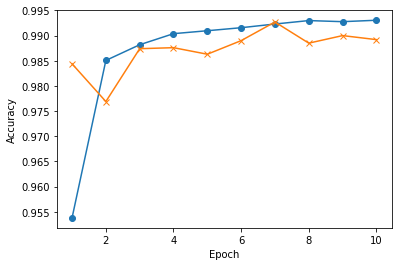

In [179]:
obj.epoch_acc();


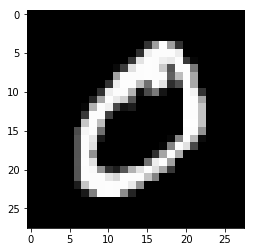

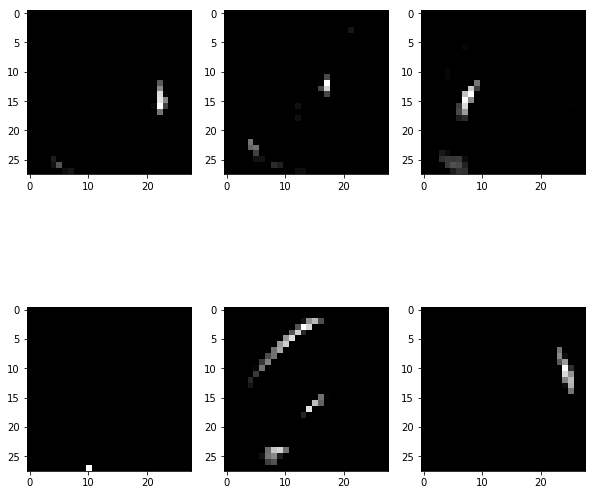

In [180]:
obj.predict_before_display(3,2,0,1);

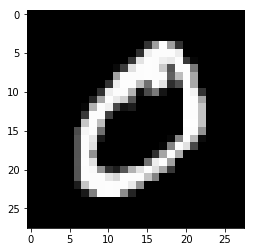

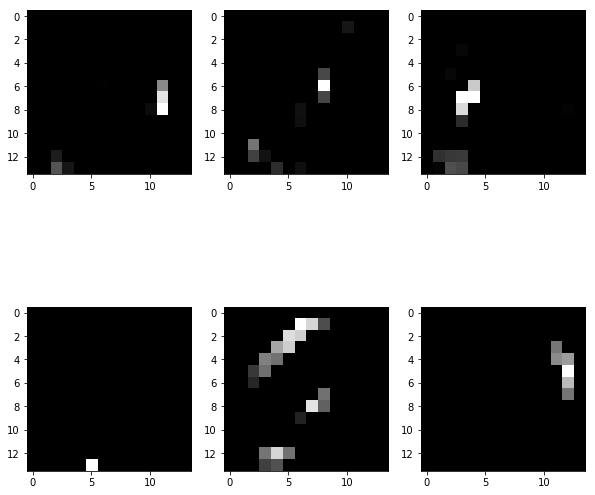

In [181]:
obj.predict_before_display(3,2,1,1);

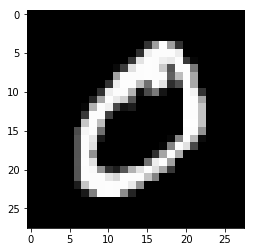

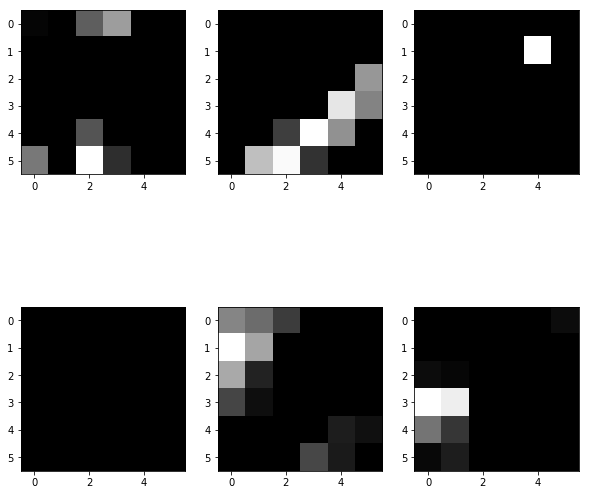

In [182]:
obj.predict_before_display(3,2,2,1);

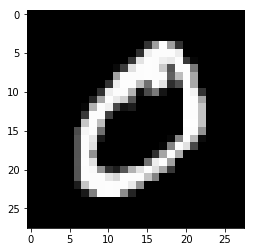

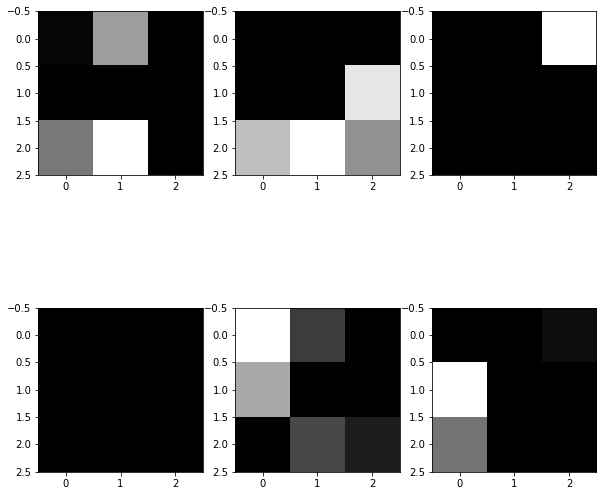

In [183]:
obj.predict_before_display(3,2,3,1);

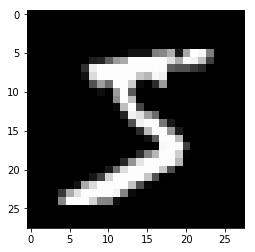

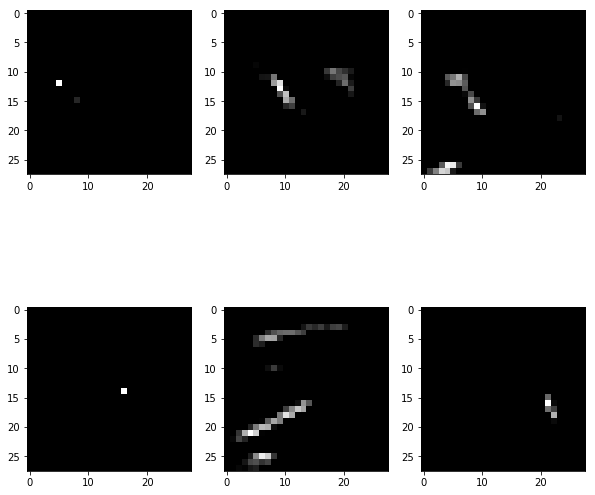

In [184]:
obj.predict_before_display(3,2,0,0);

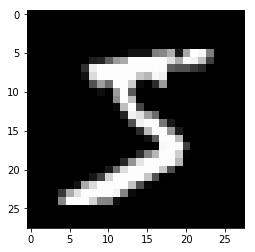

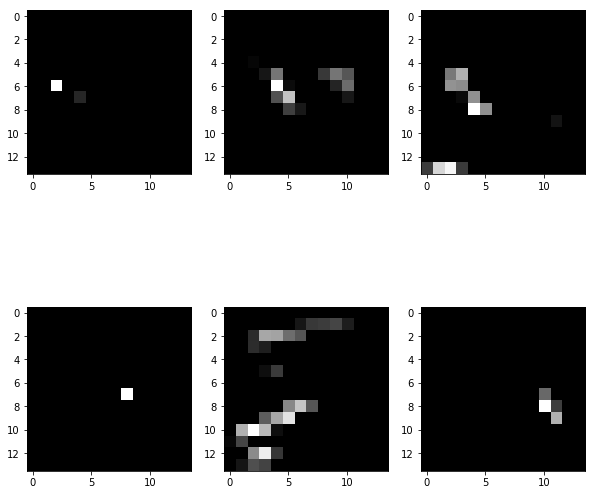

In [185]:
obj.predict_before_display(3,2,1,0);

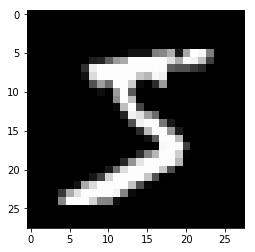

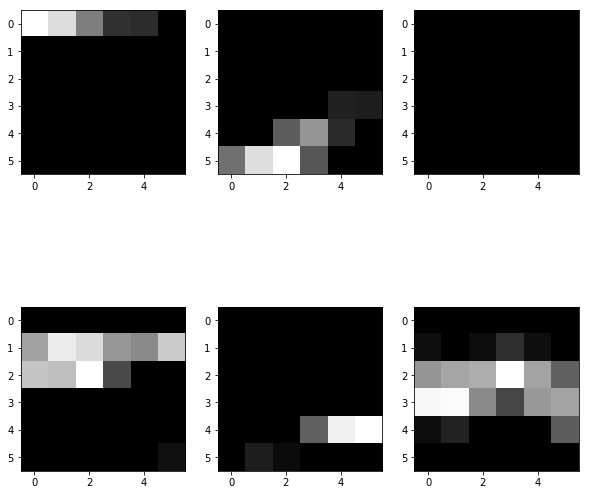

In [186]:
obj.predict_before_display(3,2,2,0);

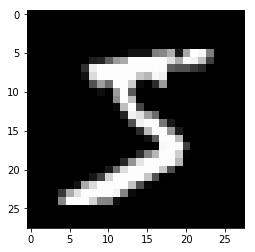

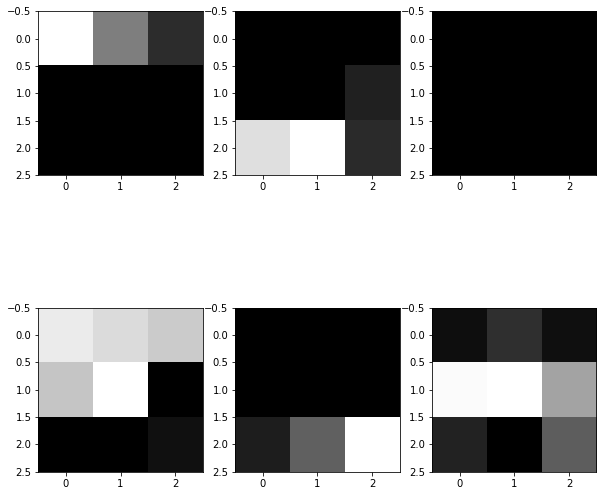

In [187]:
obj.predict_before_display(3,2,3,0);

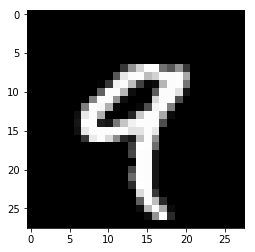

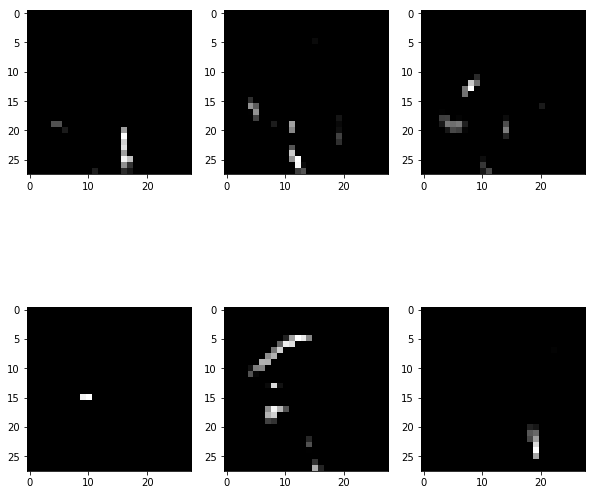

In [188]:
obj.predict_before_display(3,2,0,4);

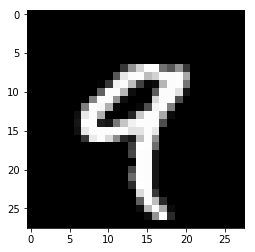

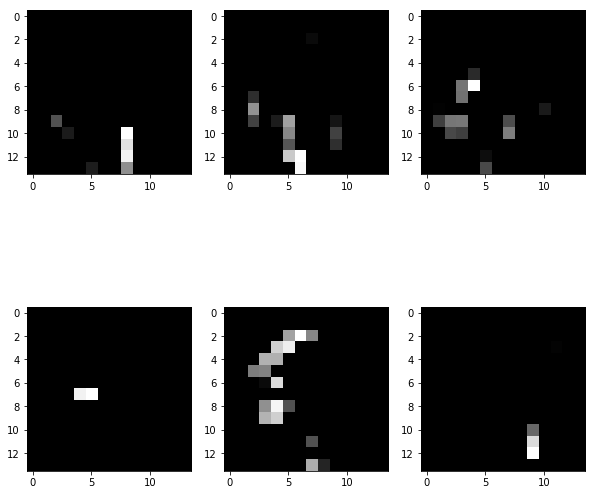

In [189]:
obj.predict_before_display(3,2,1,4);

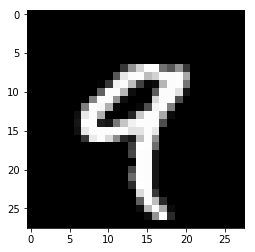

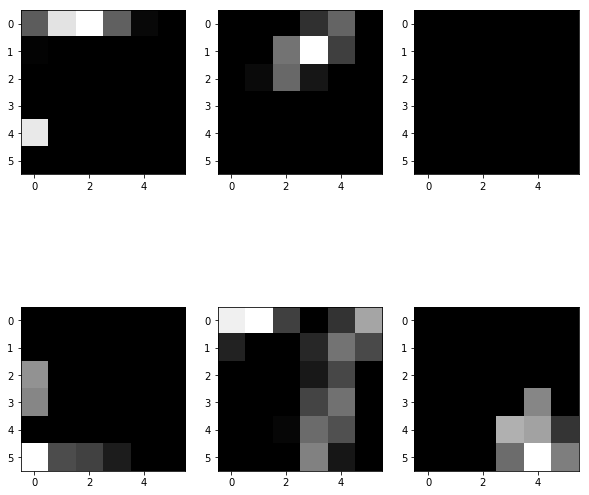

In [190]:
obj.predict_before_display(3,2,2,4);

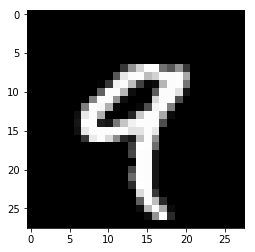

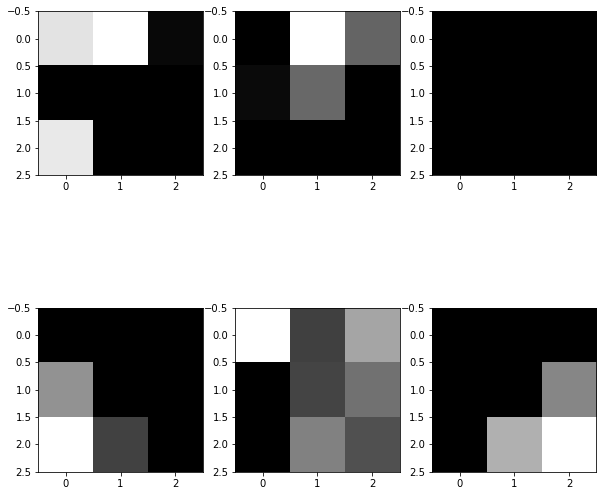

In [191]:
obj.predict_before_display(3,2,3,4);

array([[ 970,    0,    2,    0,    0,    3,    1,    1,    3,    0],
       [   0, 1129,    0,    0,    1,    1,    0,    1,    3,    0],
       [   2,    1, 1025,    0,    0,    0,    0,    1,    3,    0],
       [   0,    0,    2,  994,    0,   14,    0,    0,    0,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    1,    2],
       [   0,    0,    0,    3,    0,  887,    1,    0,    1,    0],
       [   3,    4,    2,    0,    4,    4,  940,    0,    1,    0],
       [   0,    3,   10,    0,    0,    0,    0, 1006,    2,    7],
       [   0,    0,    1,    1,    0,    1,    0,    1,  967,    3],
       [   0,    1,    0,    0,    6,    6,    0,    0,    0,  996]],
      dtype=int64)

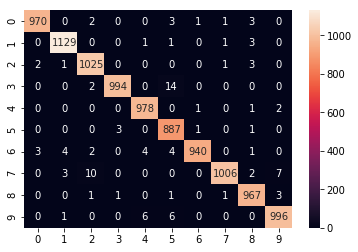

In [192]:
cm = obj.confusion_matrix();
cm

In [193]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99       980
    class 1       0.99      0.99      0.99      1135
    class 2       0.98      0.99      0.99      1032
    class 3       1.00      0.98      0.99      1010
    class 4       0.99      1.00      0.99       982
    class 5       0.97      0.99      0.98       892
    class 6       1.00      0.98      0.99       958
    class 7       1.00      0.98      0.99      1028
    class 8       0.99      0.99      0.99       974
    class 9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [194]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 16)        1312      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 6, 6, 26)          33722     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 3, 26)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 234)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 240)               56400     
_________________________________________________________________
dense_44 (Dense)             (None, 160)               38560     
__________

## Setting - 7

In [195]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [196]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [197]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [198]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [199]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [200]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [201]:
# increasing the epoch sizes
filter_size1 = 6;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 16;
kernel_size2 = 5;
pool_size2 = 2
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 32;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 49s 822us/step - loss: 0.1635 - acc: 0.9497 - val_loss: 0.0553 - val_acc: 0.9820
Epoch 2/32
60000/60000 [==============================] - 47s 781us/step - loss: 0.0572 - acc: 0.9829 - val_loss: 0.0410 - val_acc: 0.9878
Epoch 3/32
60000/60000 [==============================] - 45s 745us/step - loss: 0.0448 - acc: 0.9867 - val_loss: 0.0415 - val_acc: 0.9882
Epoch 4/32
60000/60000 [==============================] - 45s 745us/step - loss: 0.0363 - acc: 0.9895 - val_loss: 0.0398 - val_acc: 0.9875
Epoch 5/32
60000/60000 [==============================] - 44s 740us/step - loss: 0.0325 - acc: 0.9908 - val_loss: 0.0365 - val_acc: 0.9901
Epoch 6/32
60000/60000 [==============================] - 45s 747us/step - loss: 0.0288 - acc: 0.9917 - val_loss: 0.0432 - val_acc: 0.9872
Epoch 7/32
60000/60000 [==============================] - 47s 780us/step - loss: 0.0261 - acc: 0.9923 - val_loss: 0.

In [203]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 3s 343us/step


[0.09468820653967763, 0.9887]

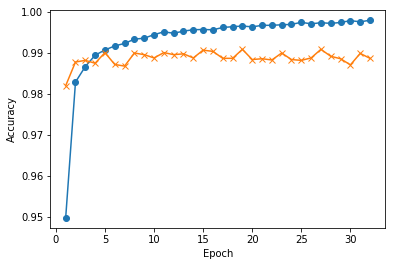

In [204]:
obj.epoch_acc();


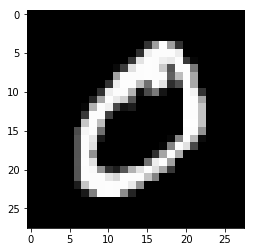

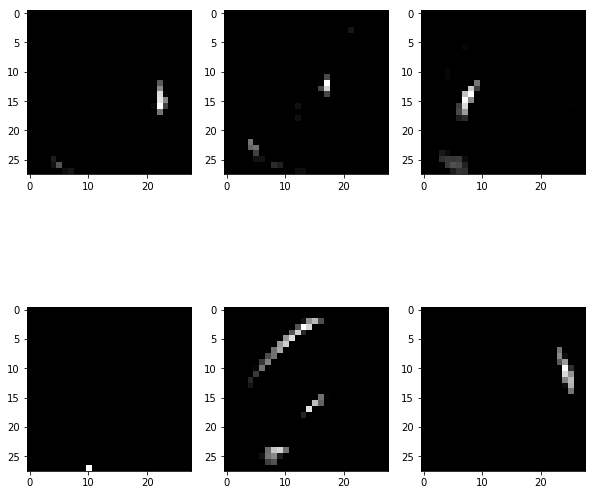

In [180]:
obj.predict_before_display(3,2,0,1);

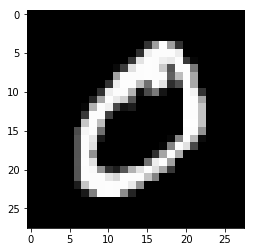

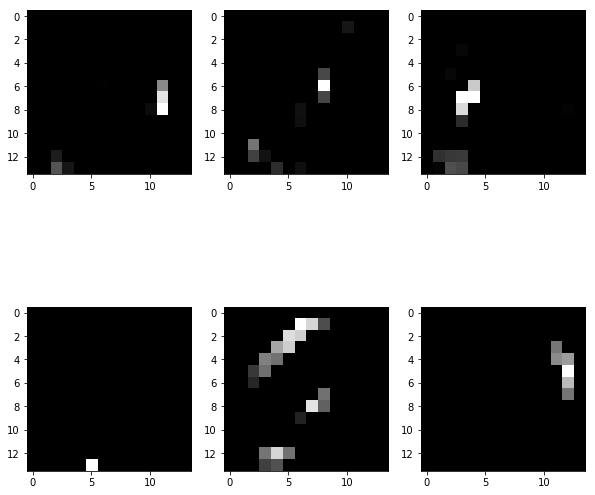

In [181]:
obj.predict_before_display(3,2,1,1);

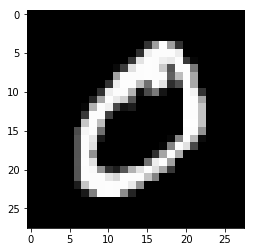

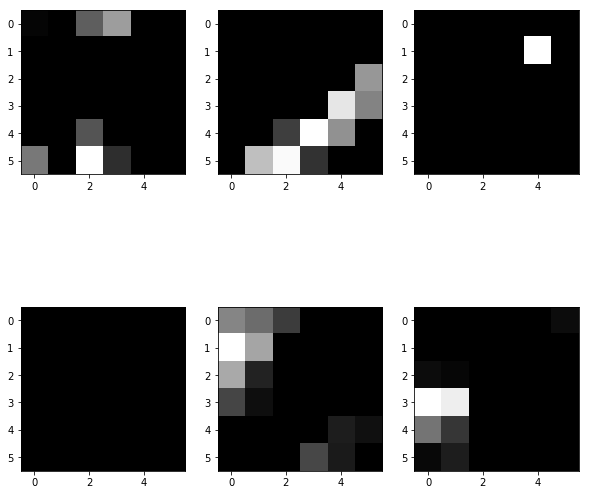

In [182]:
obj.predict_before_display(3,2,2,1);

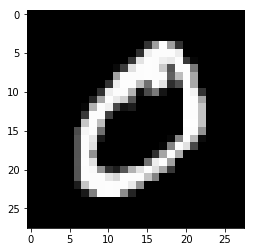

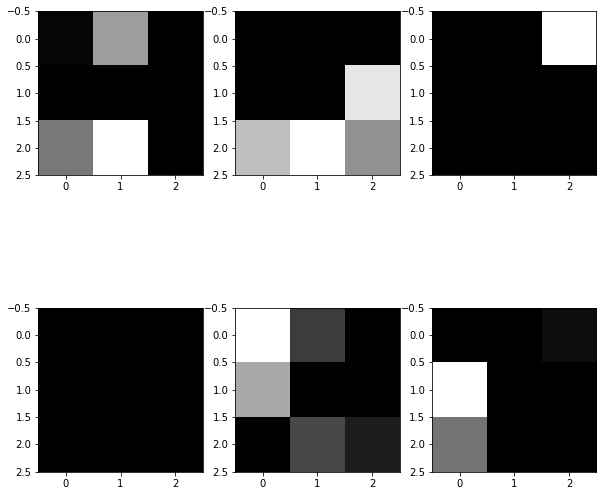

In [183]:
obj.predict_before_display(3,2,3,1);

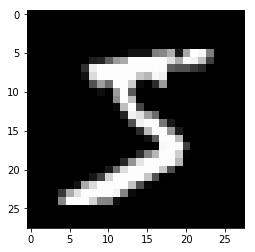

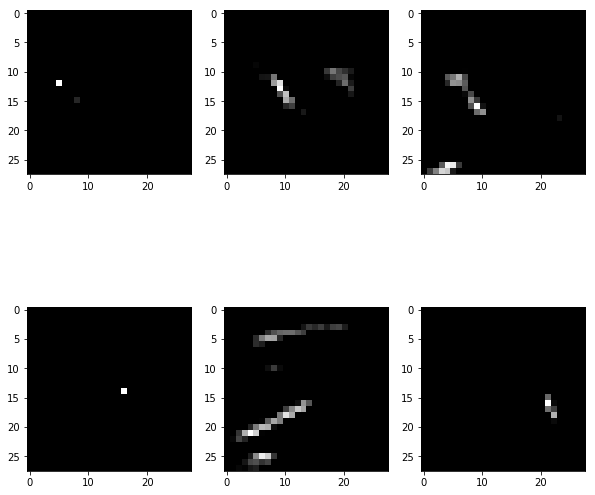

In [184]:
obj.predict_before_display(3,2,0,0);

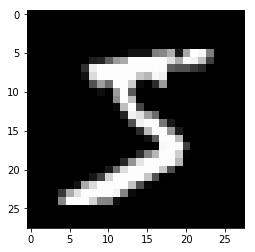

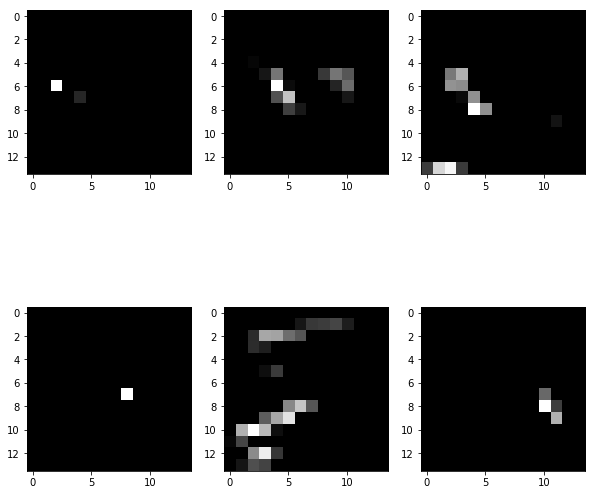

In [185]:
obj.predict_before_display(3,2,1,0);

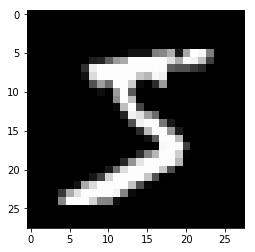

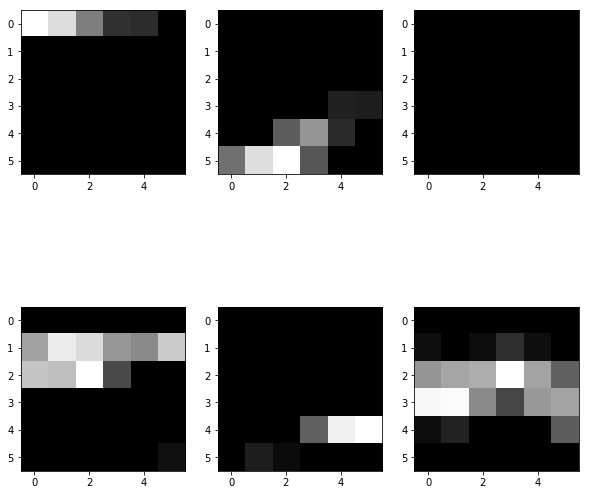

In [186]:
obj.predict_before_display(3,2,2,0);

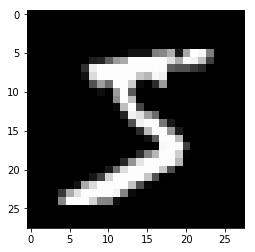

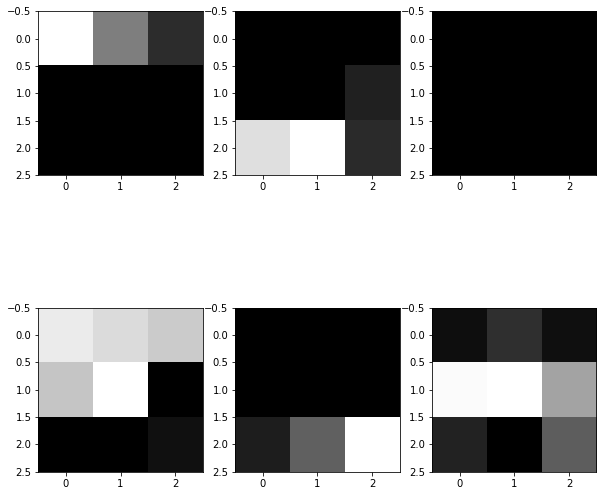

In [187]:
obj.predict_before_display(3,2,3,0);

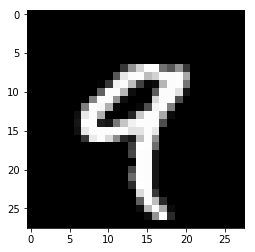

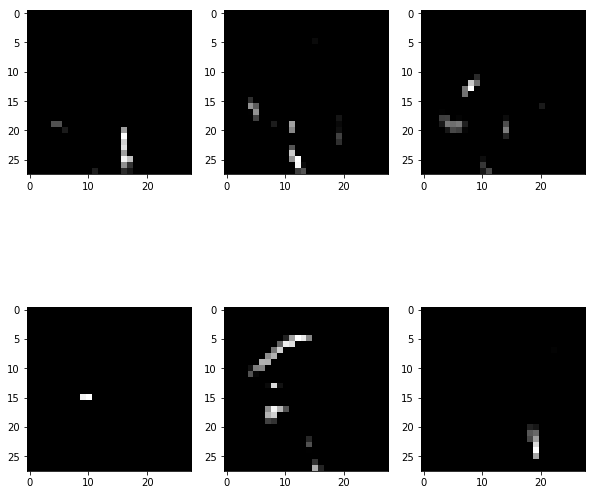

In [188]:
obj.predict_before_display(3,2,0,4);

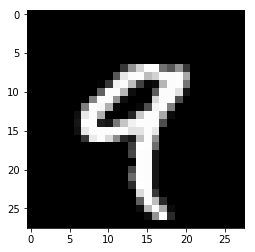

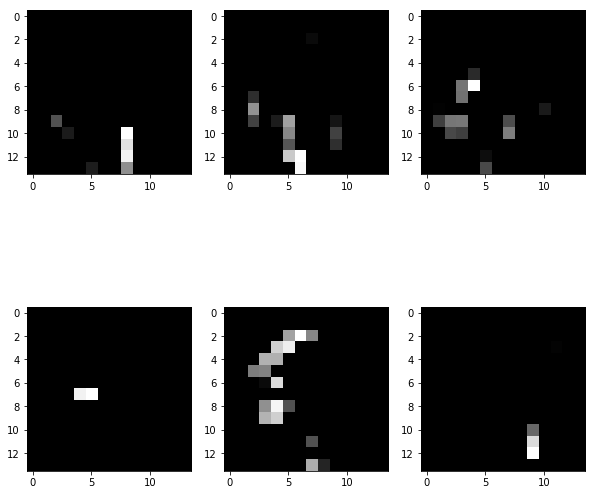

In [189]:
obj.predict_before_display(3,2,1,4);

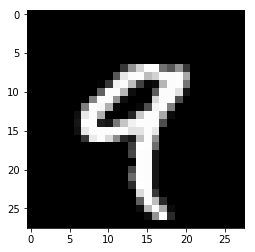

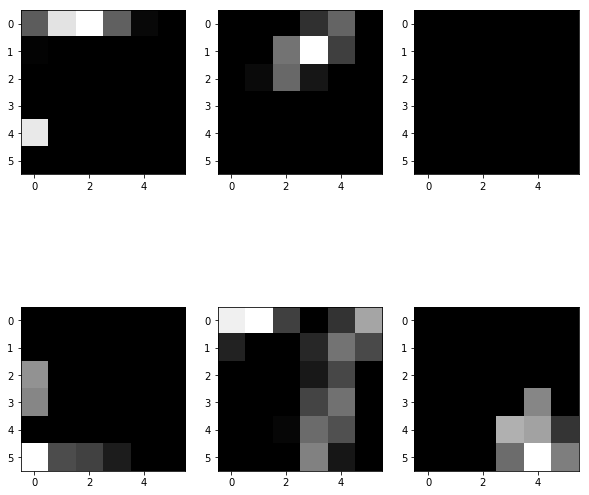

In [190]:
obj.predict_before_display(3,2,2,4);

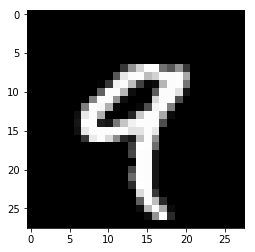

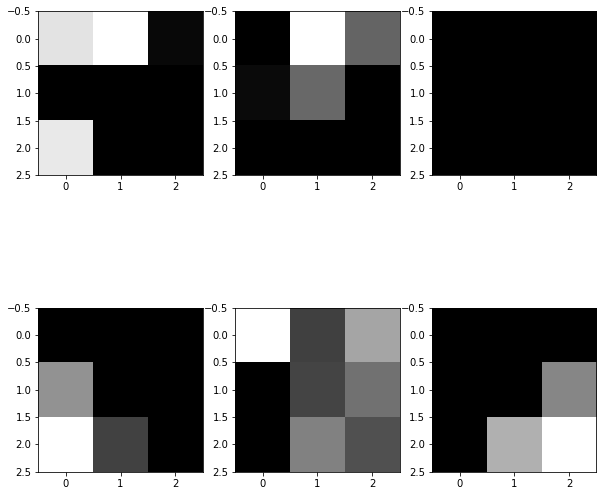

In [191]:
obj.predict_before_display(3,2,3,4);

array([[ 970,    0,    2,    0,    0,    3,    1,    1,    3,    0],
       [   0, 1129,    0,    0,    1,    1,    0,    1,    3,    0],
       [   2,    1, 1025,    0,    0,    0,    0,    1,    3,    0],
       [   0,    0,    2,  994,    0,   14,    0,    0,    0,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    1,    2],
       [   0,    0,    0,    3,    0,  887,    1,    0,    1,    0],
       [   3,    4,    2,    0,    4,    4,  940,    0,    1,    0],
       [   0,    3,   10,    0,    0,    0,    0, 1006,    2,    7],
       [   0,    0,    1,    1,    0,    1,    0,    1,  967,    3],
       [   0,    1,    0,    0,    6,    6,    0,    0,    0,  996]],
      dtype=int64)

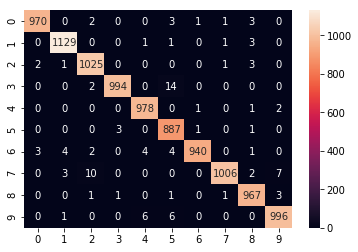

In [192]:
cm = obj.confusion_matrix();
cm

In [193]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99       980
    class 1       0.99      0.99      0.99      1135
    class 2       0.98      0.99      0.99      1032
    class 3       1.00      0.98      0.99      1010
    class 4       0.99      1.00      0.99       982
    class 5       0.97      0.99      0.98       892
    class 6       1.00      0.98      0.99       958
    class 7       1.00      0.98      0.99      1028
    class 8       0.99      0.99      0.99       974
    class 9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [194]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 16)        1312      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 6, 6, 26)          33722     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 3, 26)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 234)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 240)               56400     
_________________________________________________________________
dense_44 (Dense)             (None, 160)               38560     
__________

## Setting - 8

In [205]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [206]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [207]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [208]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [209]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [210]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [212]:
#optimizer = adams+increase in filter size
filter_size1 = 16;
kernel_size1 = 9;
pool_size1 = 2;
filter_size2 = 26;
kernel_size2 = 9;
pool_size2 = 2
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'adam';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1669 - acc: 0.9476 - val_loss: 0.0590 - val_acc: 0.9822
Epoch 2/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0554 - acc: 0.9827 - val_loss: 0.0507 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0403 - acc: 0.9874 - val_loss: 0.0348 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0347 - acc: 0.9887 - val_loss: 0.0594 - val_acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0262 - acc: 0.9917 - val_loss: 0.0409 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0240 - acc: 0.9927 - val_loss: 0.0329 - val_acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.0383 - 

In [213]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 8s 763us/step


[0.05192580051602745, 0.9886]

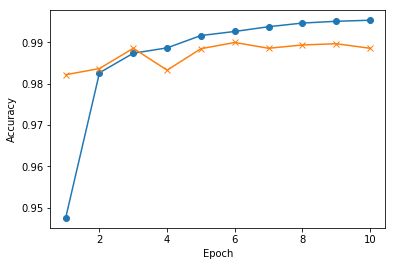

In [214]:
obj.epoch_acc();


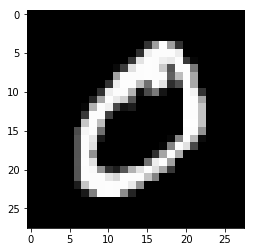

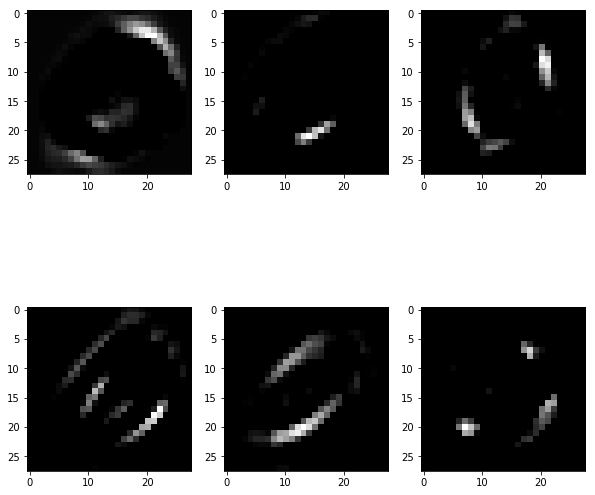

In [215]:
obj.predict_before_display(3,2,0,1);

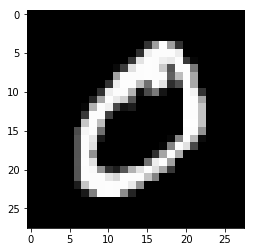

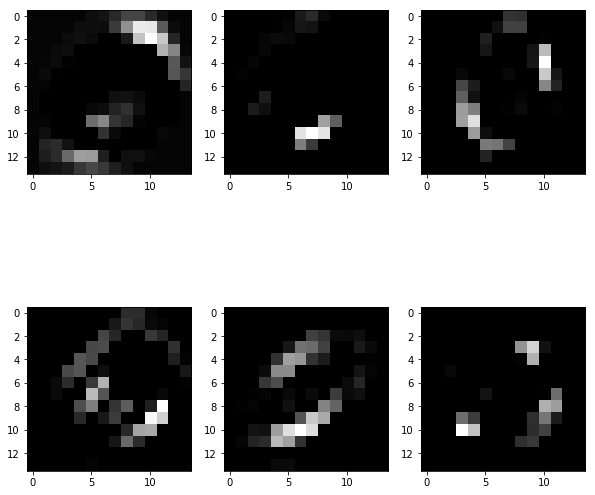

In [216]:
obj.predict_before_display(3,2,1,1);

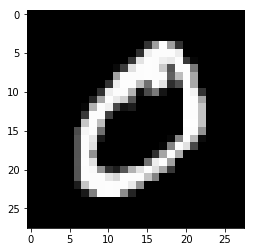

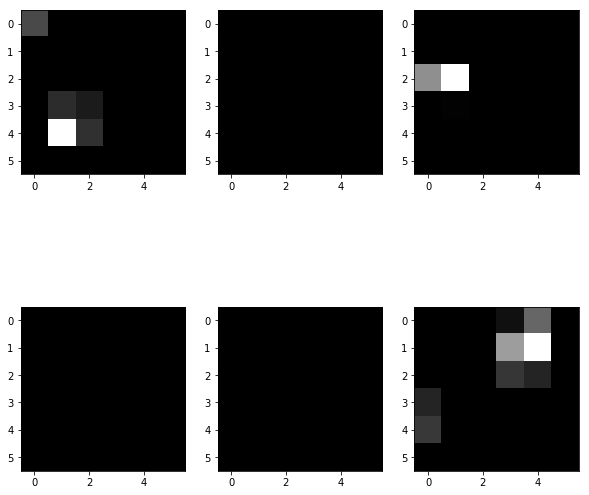

In [217]:
obj.predict_before_display(3,2,2,1);

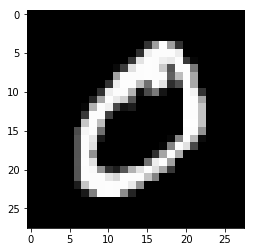

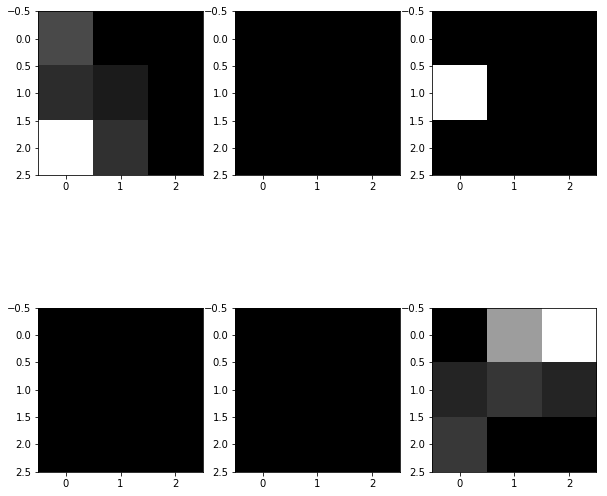

In [218]:
obj.predict_before_display(3,2,3,1);

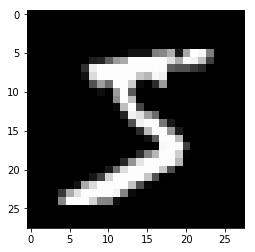

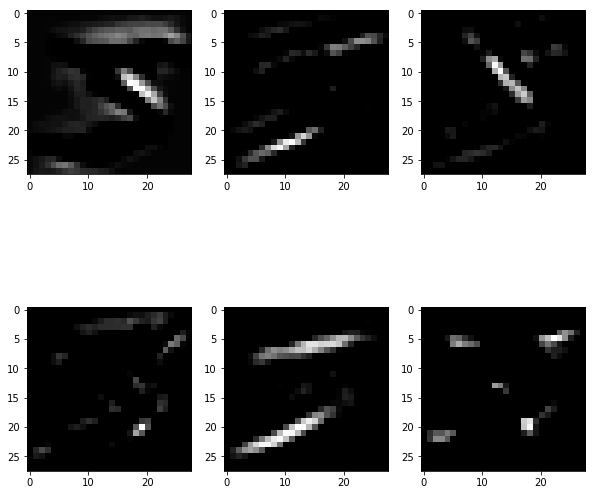

In [219]:
obj.predict_before_display(3,2,0,0);

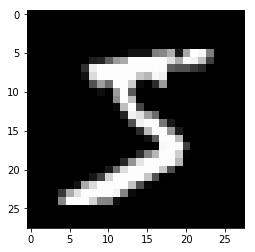

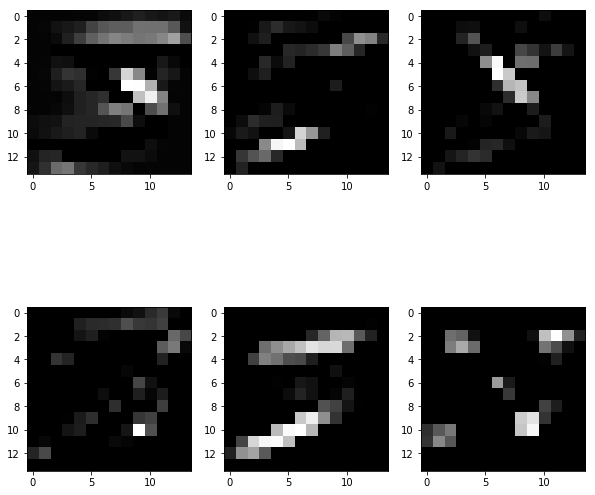

In [220]:
obj.predict_before_display(3,2,1,0);

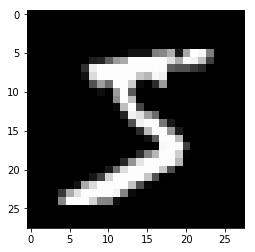

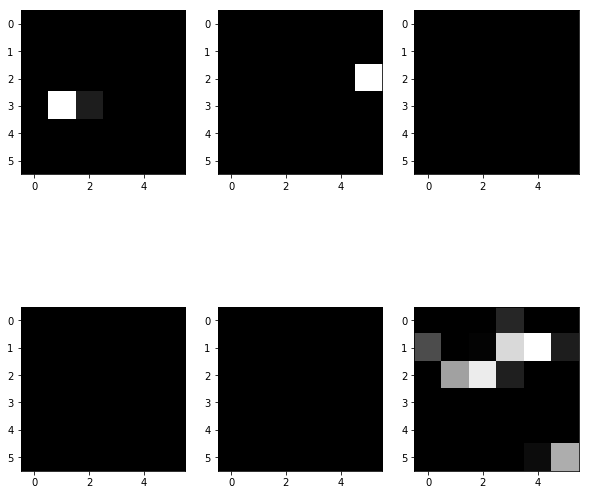

In [221]:
obj.predict_before_display(3,2,2,0);

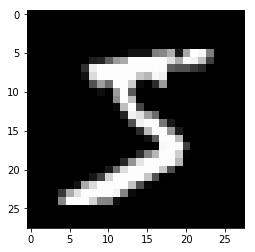

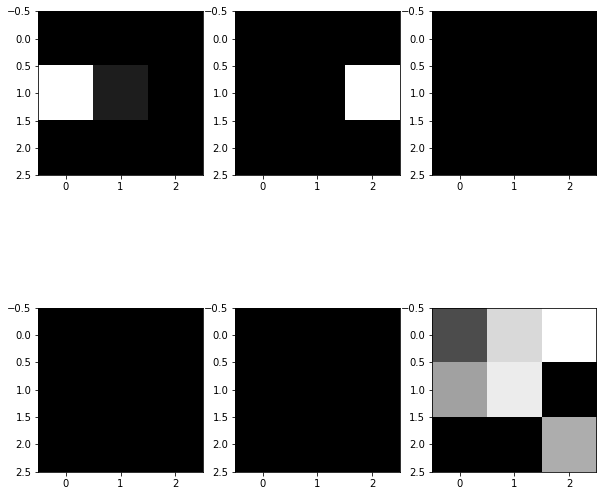

In [222]:
obj.predict_before_display(3,2,3,0);

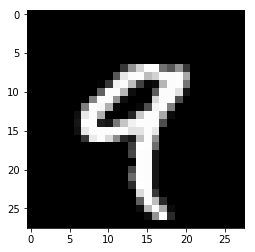

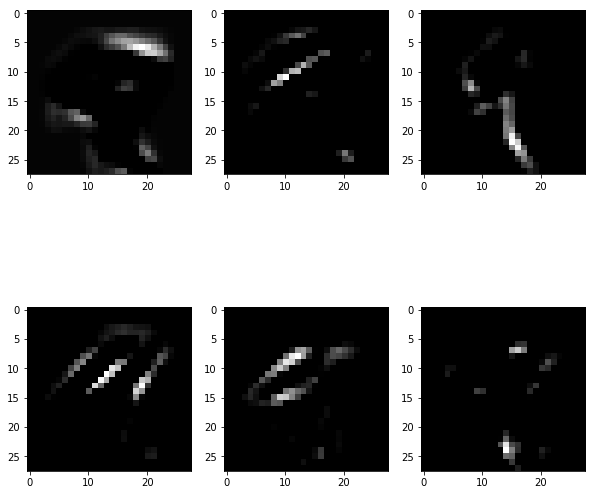

In [223]:
obj.predict_before_display(3,2,0,4);

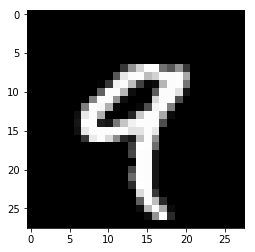

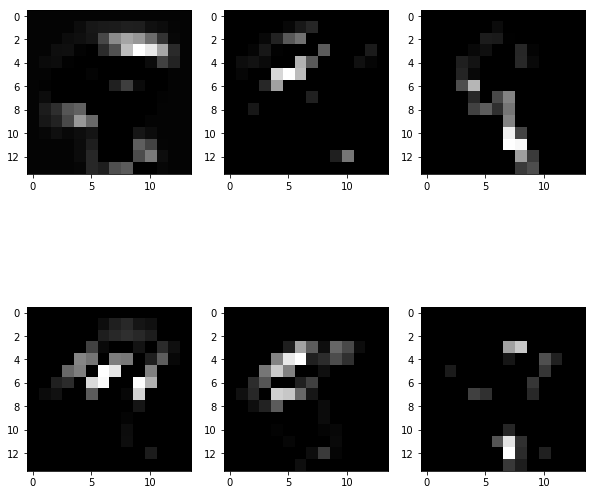

In [224]:
obj.predict_before_display(3,2,1,4);

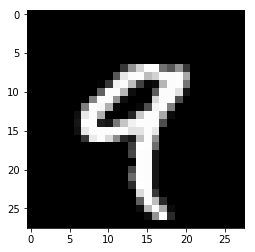

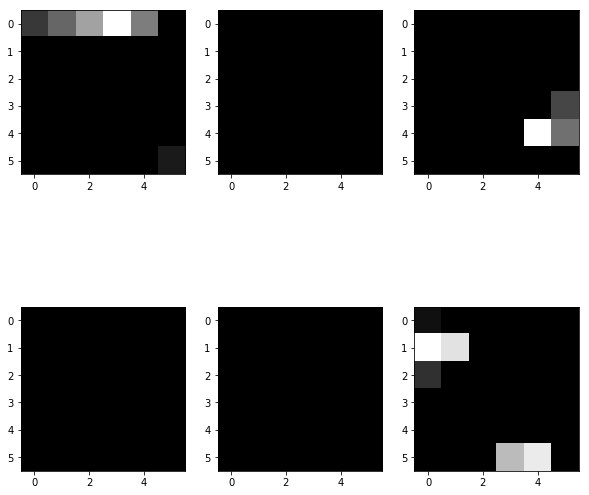

In [225]:
obj.predict_before_display(3,2,2,4);

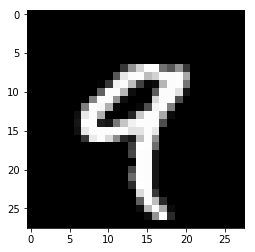

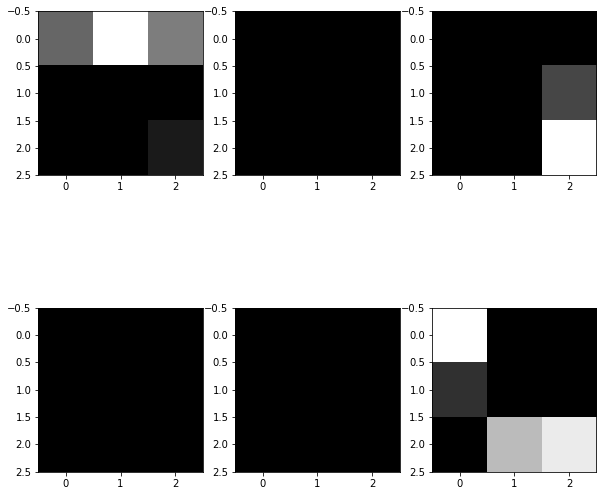

In [226]:
obj.predict_before_display(3,2,3,4);

array([[ 972,    0,    1,    0,    0,    0,    5,    1,    1,    0],
       [   1, 1127,    1,    3,    0,    0,    2,    0,    1,    0],
       [   0,    1, 1025,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    2, 1001,    0,    1,    0,    2,    1,    3],
       [   0,    0,    0,    0,  968,    0,    2,    1,    1,   10],
       [   0,    0,    0,   12,    0,  861,    2,    1,    3,   13],
       [   7,    2,    1,    0,    1,    2,  943,    0,    1,    1],
       [   1,    2,    2,    1,    0,    0,    0, 1018,    0,    4],
       [   0,    0,    2,    0,    0,    1,    0,    0,  967,    4],
       [   0,    0,    0,    0,    3,    0,    1,    0,    1, 1004]],
      dtype=int64)

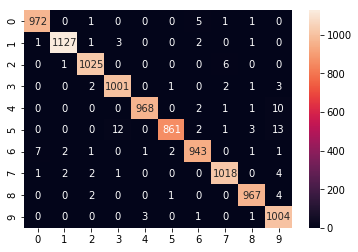

In [227]:
cm = obj.confusion_matrix();
cm

In [228]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99       980
    class 1       1.00      0.99      0.99      1135
    class 2       0.99      0.99      0.99      1032
    class 3       0.98      0.99      0.99      1010
    class 4       1.00      0.99      0.99       982
    class 5       1.00      0.97      0.98       892
    class 6       0.99      0.98      0.99       958
    class 7       0.99      0.99      0.99      1028
    class 8       0.99      0.99      0.99       974
    class 9       0.97      1.00      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [229]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 16)        1312      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 6, 6, 26)          33722     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 3, 3, 26)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 234)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 120)               28200     
_________________________________________________________________
dense_53 (Dense)             (None, 80)                9680      
__________

## Setting - 9

In [171]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [172]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [173]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [174]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [175]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [41]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.rms = keras.optimizers.RMSprop(lr=0.0001)
        self.model.compile(optimizer = self.rms, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [42]:
# learning rate
filter_size1 = 16;
kernel_size1 = 9;
pool_size1 = 2;
filter_size2 = 26;
kernel_size2 = 9;
pool_size2 = 2
dense_size1 = 240;
dense_size2 = 160;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.3971 - acc: 0.8911 - val_loss: 0.1310 - val_acc: 0.9614
Epoch 2/10
60000/60000 [==============================] - 213s 4ms/step - loss: 0.1151 - acc: 0.9639 - val_loss: 0.0802 - val_acc: 0.9753
Epoch 3/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0783 - acc: 0.9757 - val_loss: 0.0592 - val_acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0613 - acc: 0.9806 - val_loss: 0.0570 - val_acc: 0.9828
Epoch 5/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0518 - acc: 0.9841 - val_loss: 0.0491 - val_acc: 0.9825
Epoch 6/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0444 - acc: 0.9858 - val_loss: 0.0598 - val_acc: 0.9800
Epoch 7/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0394 - acc: 0.9879 - val_loss: 0.0369 - 

In [43]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 12s 1ms/step


[0.032864195666089654, 0.9889]

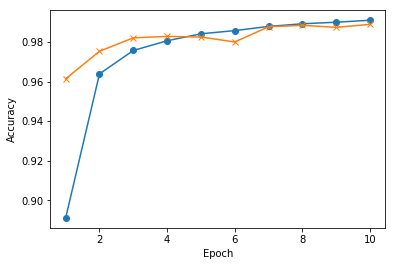

In [44]:
obj.epoch_acc();


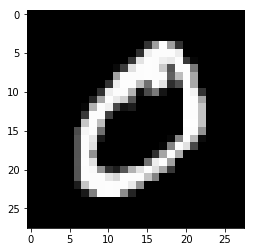

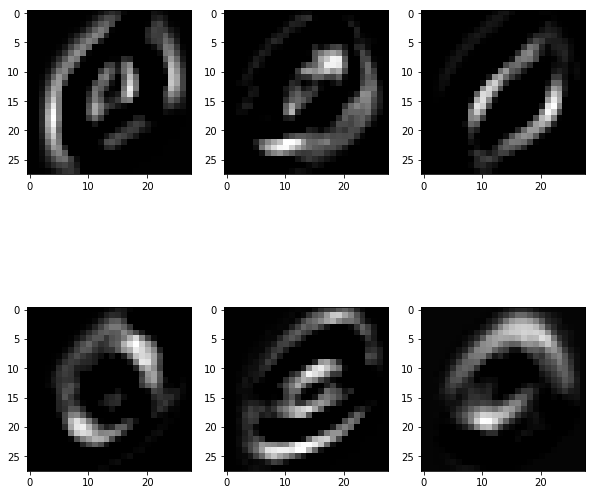

In [45]:
obj.predict_before_display(3,2,0,1);

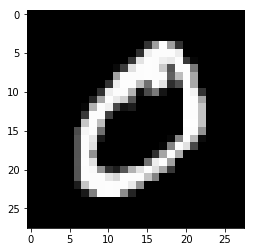

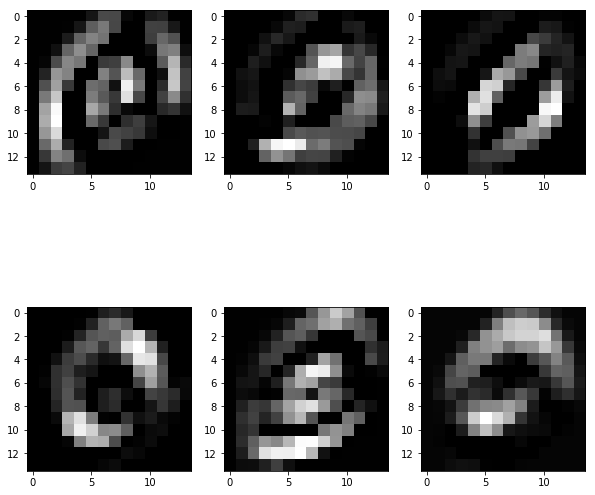

In [46]:
obj.predict_before_display(3,2,1,1);

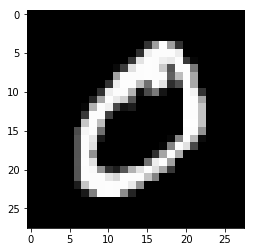

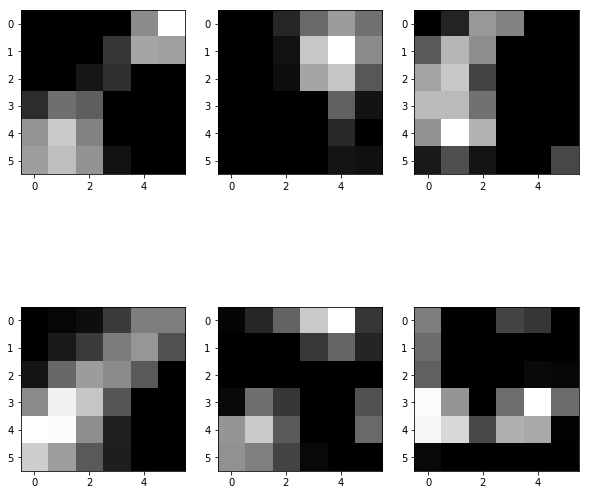

In [47]:
obj.predict_before_display(3,2,2,1);

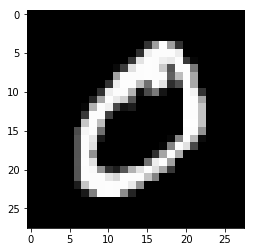

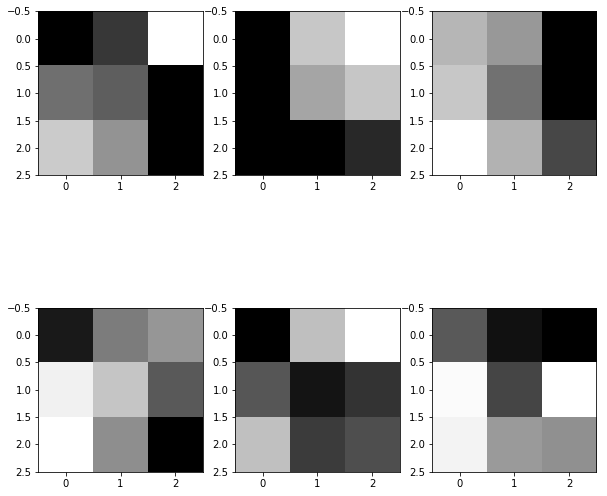

In [48]:
obj.predict_before_display(3,2,3,1);

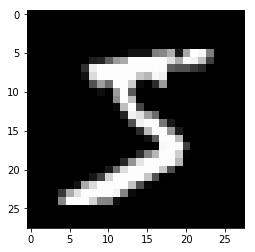

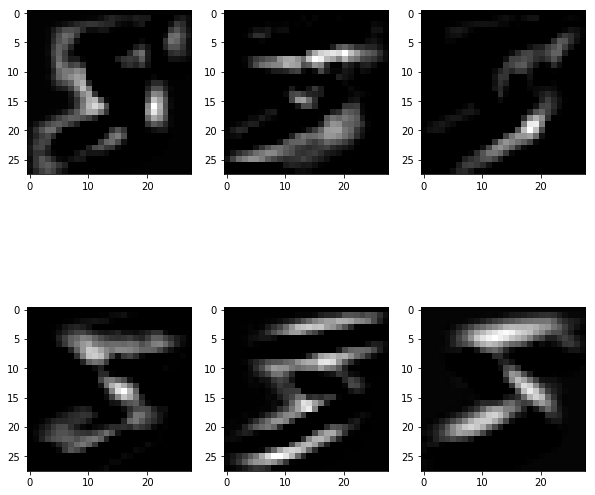

In [49]:
obj.predict_before_display(3,2,0,0);

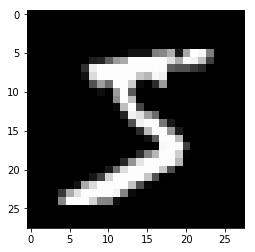

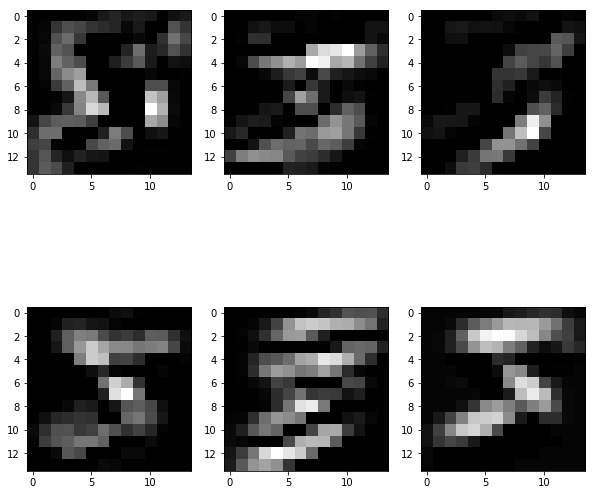

In [50]:
obj.predict_before_display(3,2,1,0);

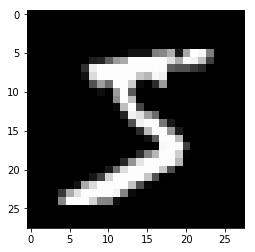

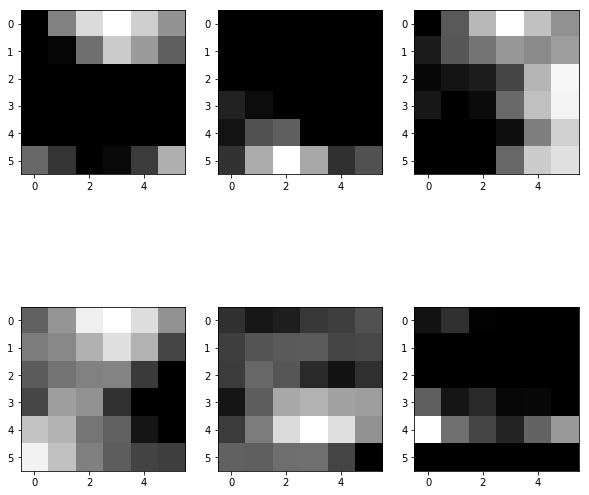

In [51]:
obj.predict_before_display(3,2,2,0);

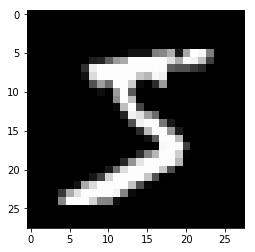

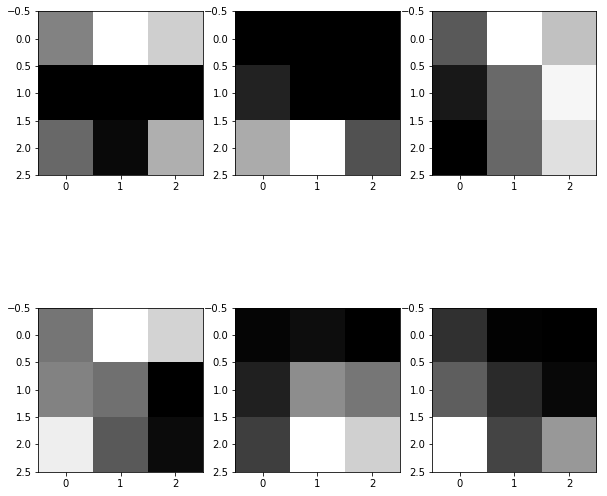

In [52]:
obj.predict_before_display(3,2,3,0);

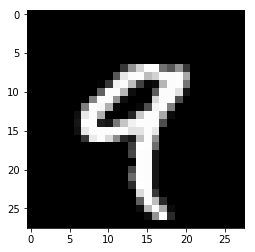

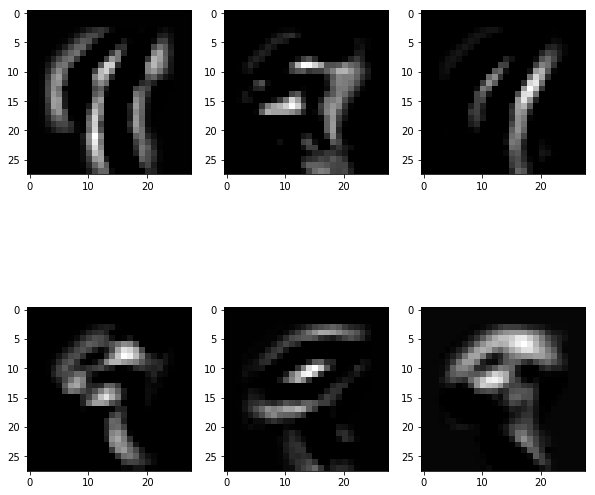

In [53]:
obj.predict_before_display(3,2,0,4);

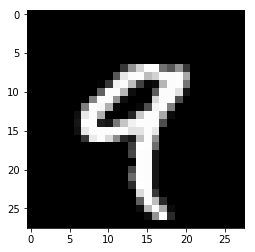

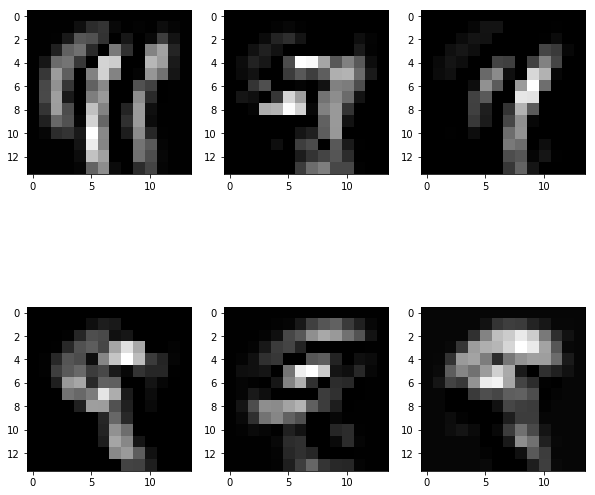

In [54]:
obj.predict_before_display(3,2,1,4);

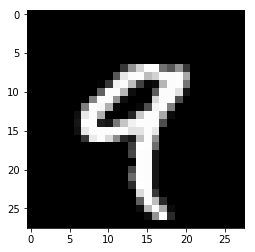

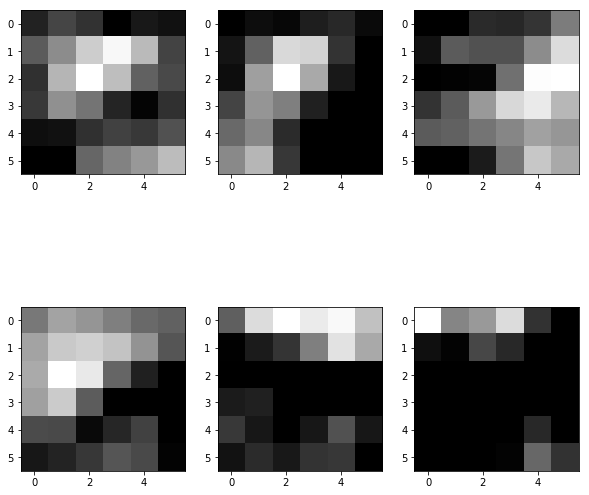

In [55]:
obj.predict_before_display(3,2,2,4);

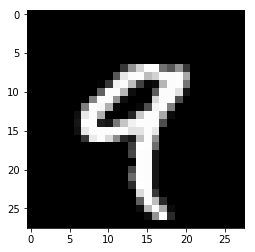

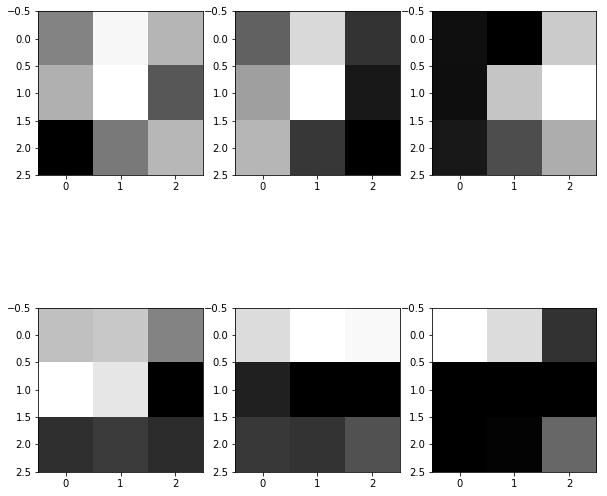

In [56]:
obj.predict_before_display(3,2,3,4);

array([[ 976,    0,    0,    0,    0,    0,    0,    1,    3,    0],
       [   0, 1122,    2,    2,    0,    1,    1,    2,    5,    0],
       [   0,    0, 1025,    1,    0,    0,    0,    3,    3,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    1,    2,    0],
       [   0,    0,    2,    0,  971,    0,    1,    2,    2,    4],
       [   2,    0,    0,   10,    0,  876,    1,    1,    1,    1],
       [   5,    1,    0,    1,    1,    3,  944,    0,    3,    0],
       [   0,    1,    6,    3,    0,    0,    0, 1013,    2,    3],
       [   1,    0,    1,    3,    0,    1,    0,    1,  965,    2],
       [   1,    1,    0,    5,    2,    2,    0,    2,    3,  993]],
      dtype=int64)

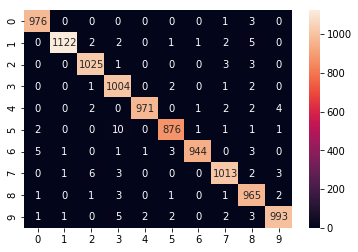

In [57]:
cm = obj.confusion_matrix();
cm

In [58]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      1.00      0.99       980
    class 1       1.00      0.99      0.99      1135
    class 2       0.99      0.99      0.99      1032
    class 3       0.98      0.99      0.98      1010
    class 4       1.00      0.99      0.99       982
    class 5       0.99      0.98      0.99       892
    class 6       1.00      0.99      0.99       958
    class 7       0.99      0.99      0.99      1028
    class 8       0.98      0.99      0.98       974
    class 9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [59]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        1312      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 26)          33722     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 26)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 234)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 240)               56400     
_________________________________________________________________
dense_8 (Dense)              (None, 160)               38560     
__________

## Setting - 10

## Setting - 10

In [8]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [172]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [173]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [174]:
#normalising to [0,1]
x_train /= 255
x_test /= 255

In [175]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [176]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [177]:
# increasing the epochs size
filter_size1 = 16;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 26;
kernel_size2 = 9;
pool_size2 = 2
dense_size1 = 240;
dense_size2 = 160;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
obj.save_weights();

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1482 - acc: 0.9538 - val_loss: 0.0455 - val_acc: 0.9844
Epoch 2/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0530 - acc: 0.9851 - val_loss: 0.0763 - val_acc: 0.9769
Epoch 3/10
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0439 - acc: 0.9882 - val_loss: 0.0476 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0379 - acc: 0.9904 - val_loss: 0.0514 - val_acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0398 - acc: 0.9910 - val_loss: 0.0495 - val_acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0392 - acc: 0.9916 - val_loss: 0.0572 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0367 - acc: 0.9923 - val_loss: 0.0427 - 

In [178]:
test_acc = obj.testing_stage(batchtest_size);
test_acc

10000/10000 [==============================] - 7s 735us/step


[0.07046130691131161, 0.9892]

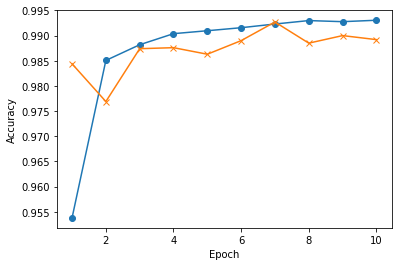

In [179]:
obj.epoch_acc();


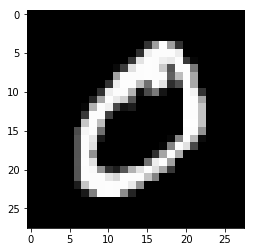

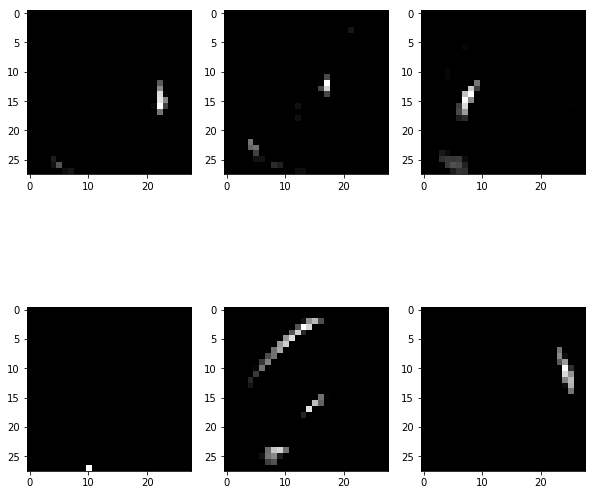

In [180]:
obj.predict_before_display(3,2,0,1);

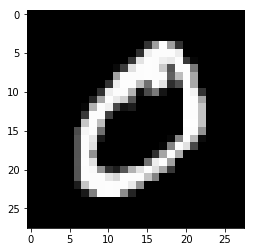

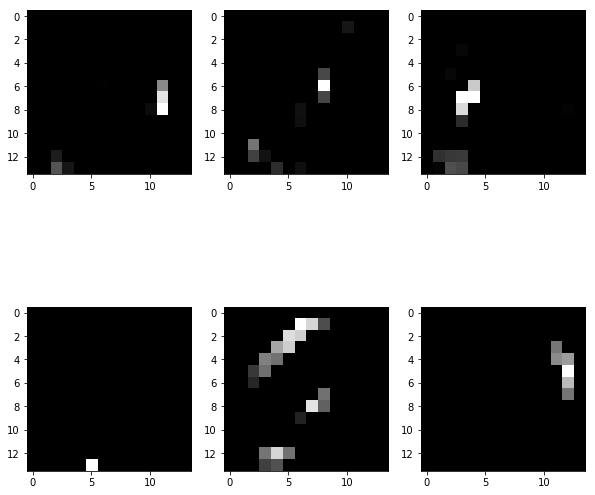

In [181]:
obj.predict_before_display(3,2,1,1);

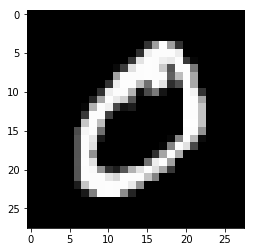

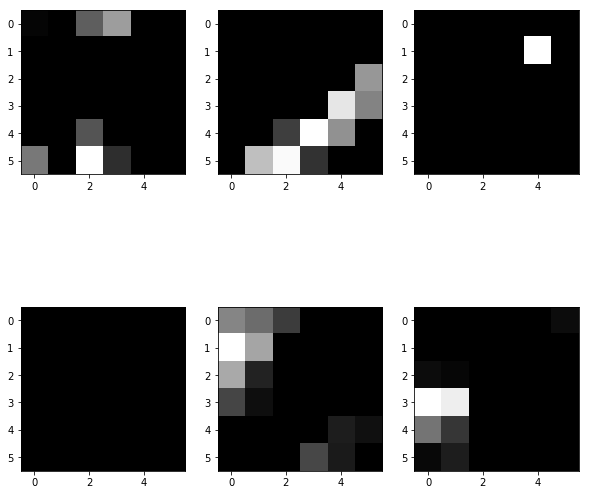

In [182]:
obj.predict_before_display(3,2,2,1);

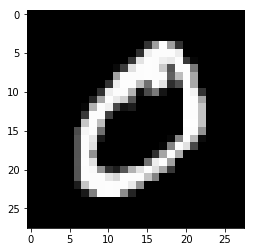

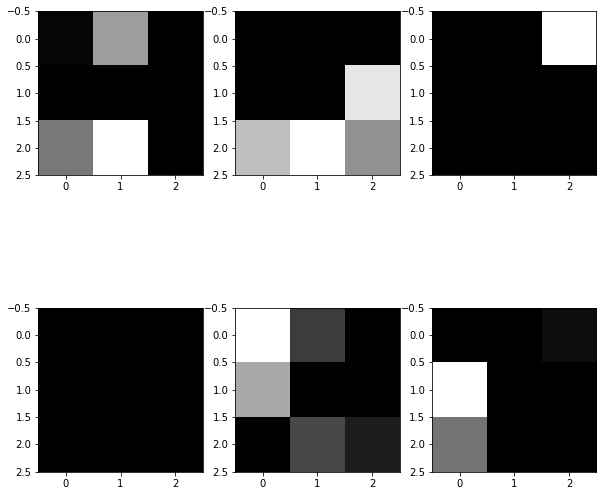

In [183]:
obj.predict_before_display(3,2,3,1);

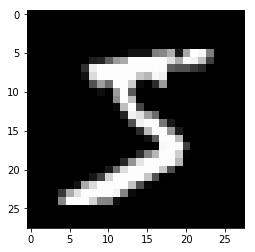

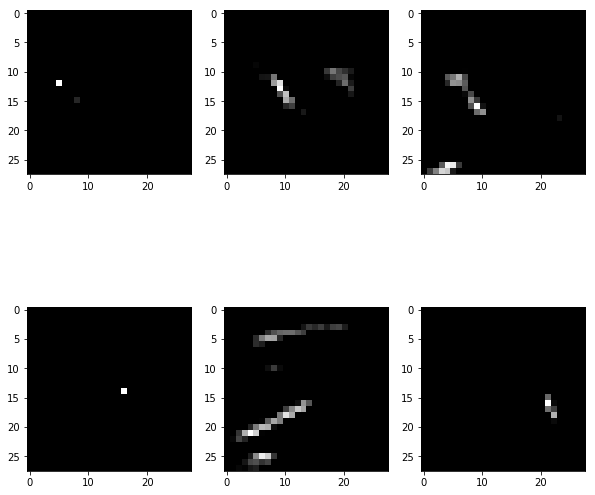

In [184]:
obj.predict_before_display(3,2,0,0);

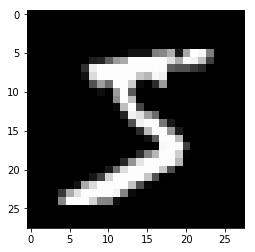

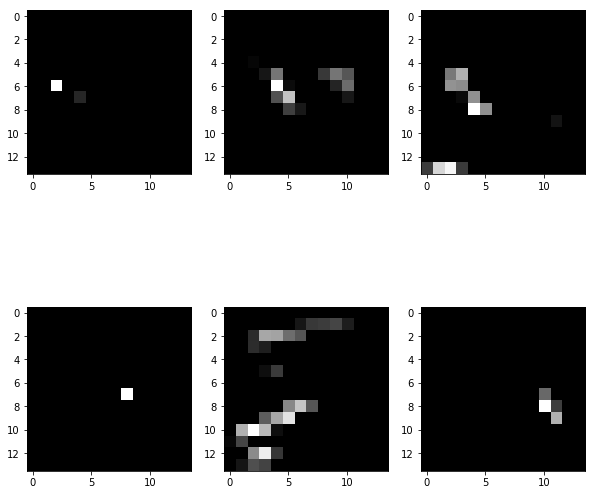

In [185]:
obj.predict_before_display(3,2,1,0);

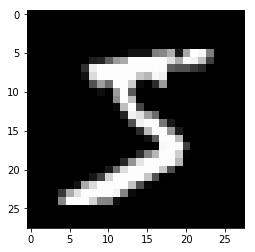

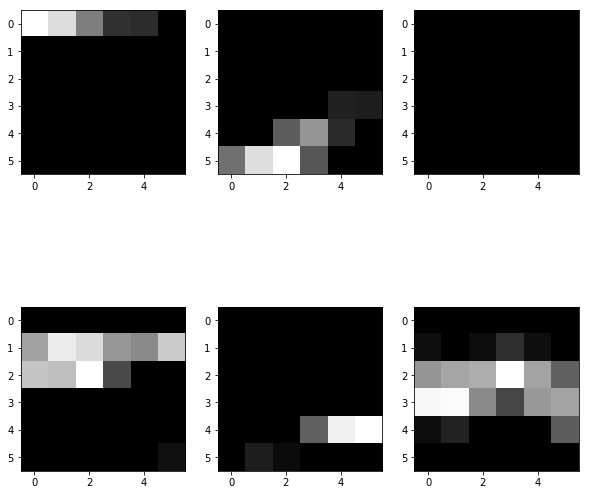

In [186]:
obj.predict_before_display(3,2,2,0);

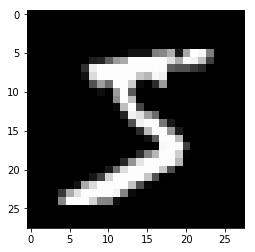

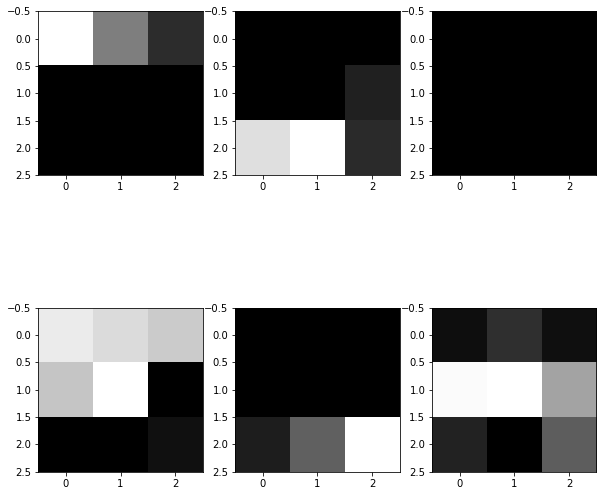

In [187]:
obj.predict_before_display(3,2,3,0);

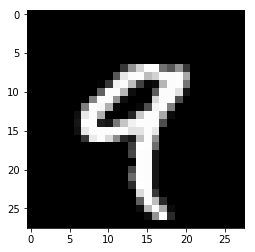

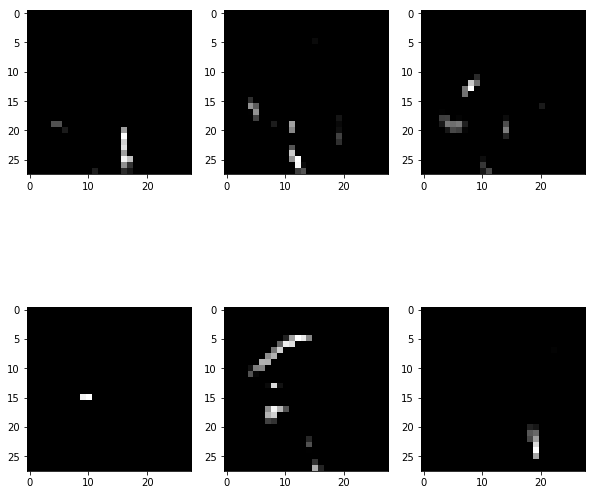

In [188]:
obj.predict_before_display(3,2,0,4);

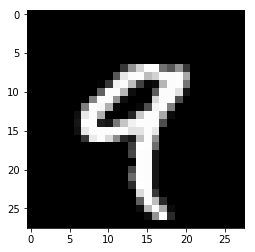

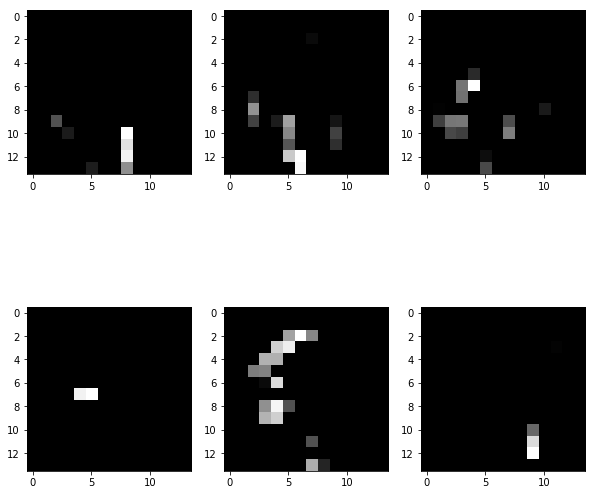

In [189]:
obj.predict_before_display(3,2,1,4);

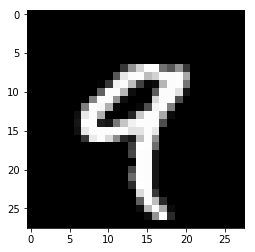

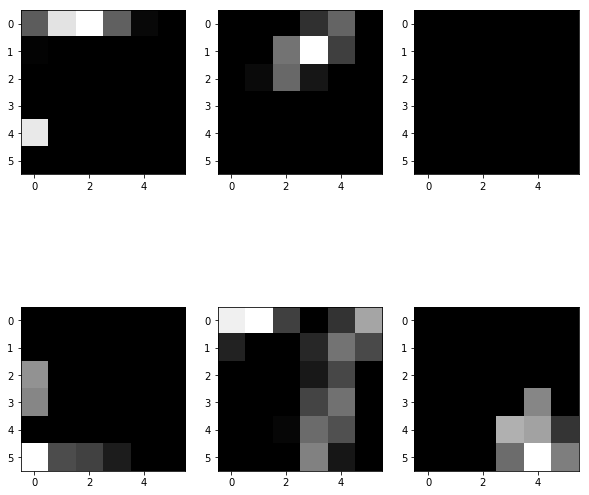

In [190]:
obj.predict_before_display(3,2,2,4);

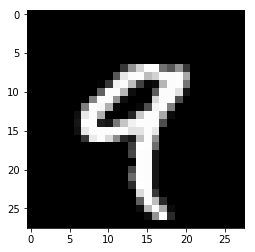

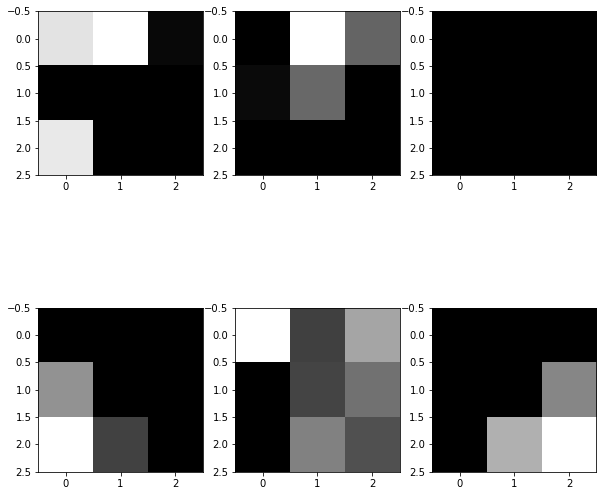

In [191]:
obj.predict_before_display(3,2,3,4);

array([[ 970,    0,    2,    0,    0,    3,    1,    1,    3,    0],
       [   0, 1129,    0,    0,    1,    1,    0,    1,    3,    0],
       [   2,    1, 1025,    0,    0,    0,    0,    1,    3,    0],
       [   0,    0,    2,  994,    0,   14,    0,    0,    0,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    1,    2],
       [   0,    0,    0,    3,    0,  887,    1,    0,    1,    0],
       [   3,    4,    2,    0,    4,    4,  940,    0,    1,    0],
       [   0,    3,   10,    0,    0,    0,    0, 1006,    2,    7],
       [   0,    0,    1,    1,    0,    1,    0,    1,  967,    3],
       [   0,    1,    0,    0,    6,    6,    0,    0,    0,  996]],
      dtype=int64)

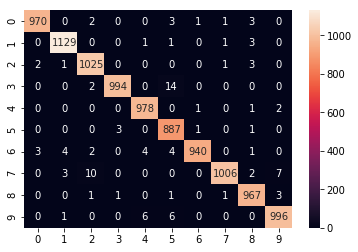

In [192]:
cm = obj.confusion_matrix();
cm

In [193]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99       980
    class 1       0.99      0.99      0.99      1135
    class 2       0.98      0.99      0.99      1032
    class 3       1.00      0.98      0.99      1010
    class 4       0.99      1.00      0.99       982
    class 5       0.97      0.99      0.98       892
    class 6       1.00      0.98      0.99       958
    class 7       1.00      0.98      0.99      1028
    class 8       0.99      0.99      0.99       974
    class 9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [194]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 16)        1312      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 6, 6, 26)          33722     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 3, 26)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 234)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 240)               56400     
_________________________________________________________________
dense_44 (Dense)             (None, 160)               38560     
__________

In [ ]:
##starts here ---c

In [ ]:
#c starts here

In [301]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [302]:
#Loading the dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [303]:
#Converting from uint8 to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [304]:
neg_x_test = 255 - x_test;


In [305]:
#normalising to [0,1]
neg_x_test /= 255
x_train /=255
x_test /=255

In [306]:
np.shape(y_train)

(60000,)

In [307]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [308]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(neg_x_test)
neg_x_test = neg_x_test.reshape(shtest[0],shtest[1],shtest[2],1)
shtest1 = np.shape(x_test)
x_test = x_test.reshape(shtest1[0],shtest1[1],shtest1[2],1)

In [309]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        #self.cb = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='auto')
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True,
        #callbacks = [self.cb]
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= neg_x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(neg_x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image);
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id])
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [310]:
np.shape(x_test)

(10000, 28, 28, 1)

In [311]:
filter_size1 = 6;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 16;
kernel_size2 = 5;
pool_size2 = 2;
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);
'''obj.testing_stage(batchtest_size);
obj.epoch_acc();
obj.save_weights();
obj.predict_before_display(3,2,1,3);
cm = obj.confusion_matrix();'''

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.1796 - acc: 0.9437 - val_loss: 0.0813 - val_acc: 0.9727
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0612 - acc: 0.9815 - val_loss: 0.0487 - val_acc: 0.9851
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0463 - acc: 0.9864 - val_loss: 0.0388 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0391 - acc: 0.9887 - val_loss: 0.0395 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0330 - acc: 0.9906 - val_loss: 0.0406 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0294 - acc: 0.9914 - val_loss: 0.0656 - val_acc: 0.9841
Epoch 7/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0256 - acc: 0.9926 - val_loss: 0.0439 - val_ac

'obj.testing_stage(batchtest_size);\nobj.epoch_acc();\nobj.save_weights();\nobj.predict_before_display(3,2,1,3);\ncm = obj.confusion_matrix();'

In [312]:
obj.model.evaluate(x= neg_x_test, y= y_test, batch_size=32)

10000/10000 [==============================] - 7s 654us/step


[7.075172193908691, 0.3674]

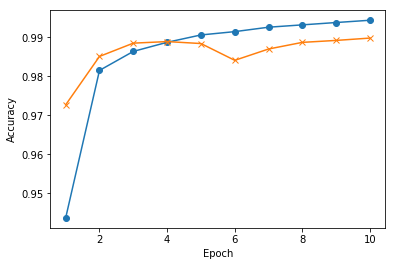

In [329]:
obj.epoch_acc();


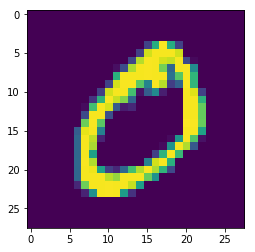

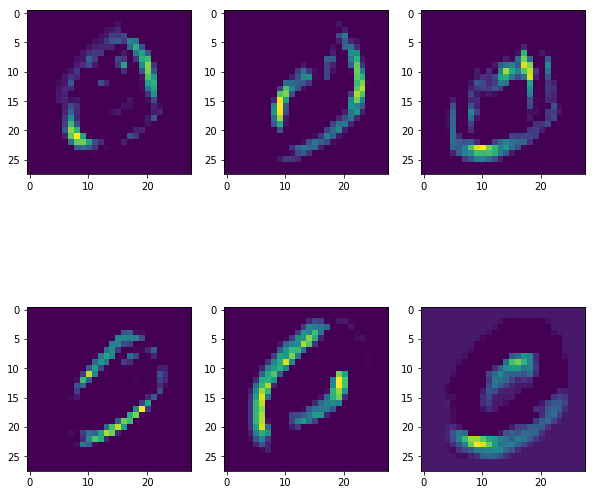

In [314]:
obj.predict_before_display(3,2,0,1);

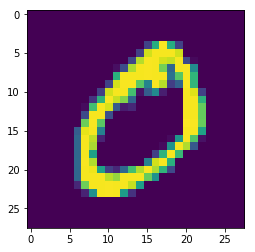

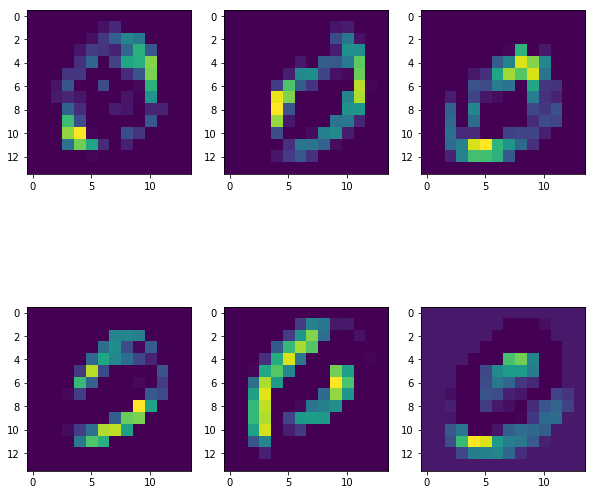

In [315]:
obj.predict_before_display(3,2,1,1);

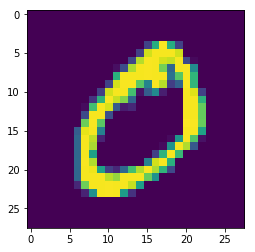

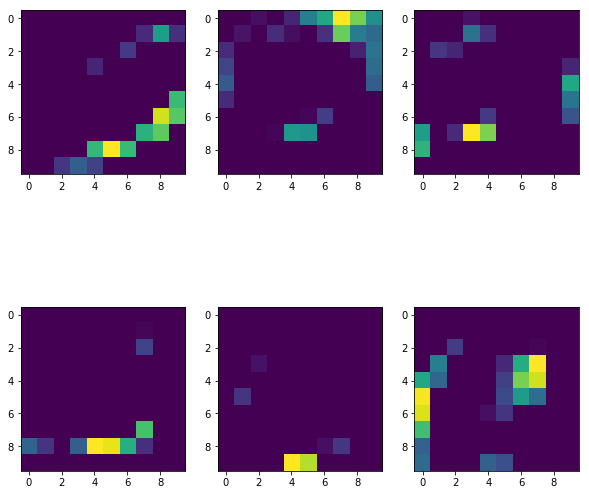

In [316]:
obj.predict_before_display(3,2,2,1);

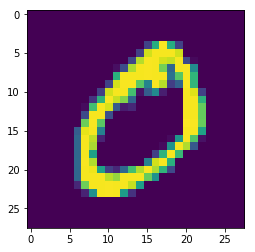

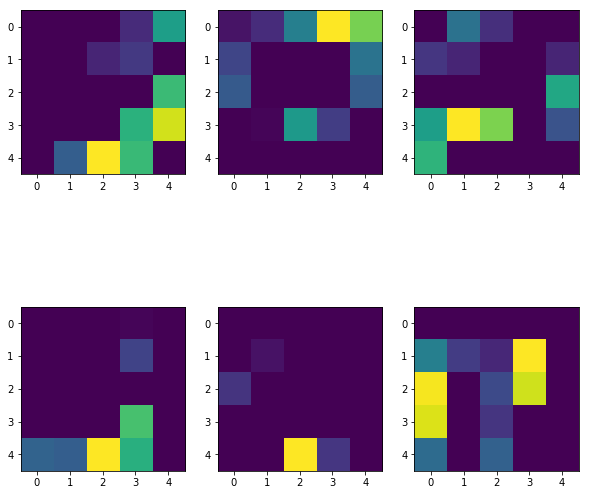

In [317]:
obj.predict_before_display(3,2,3,1);

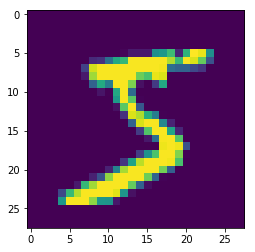

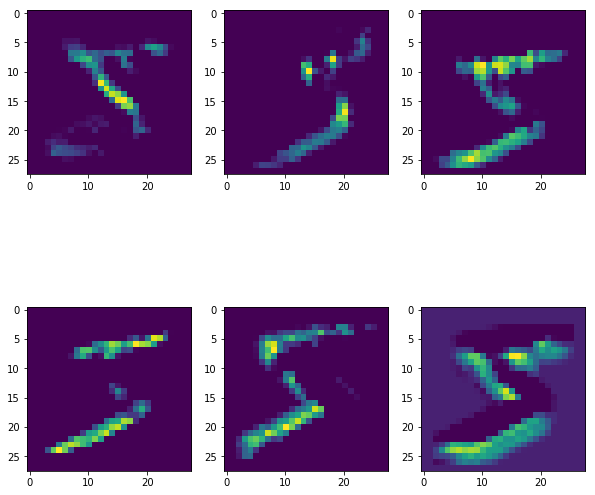

In [318]:
obj.predict_before_display(3,2,0,0);

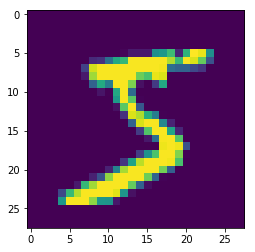

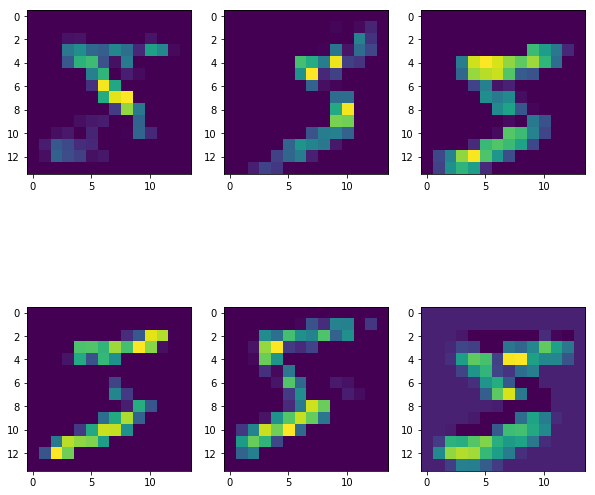

In [319]:
obj.predict_before_display(3,2,1,0);

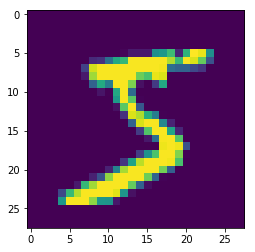

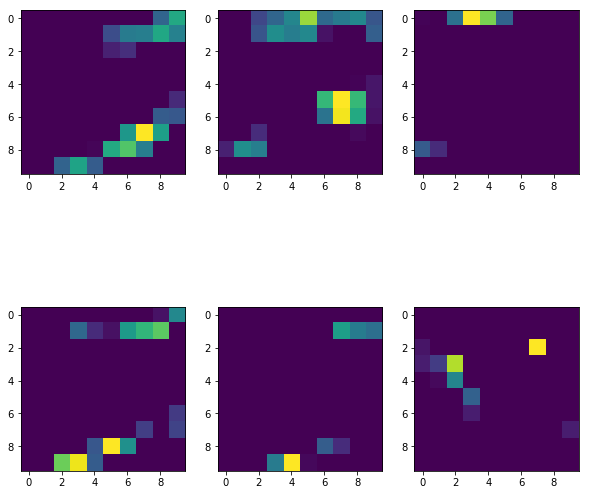

In [320]:
obj.predict_before_display(3,2,2,0);

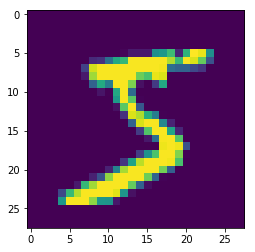

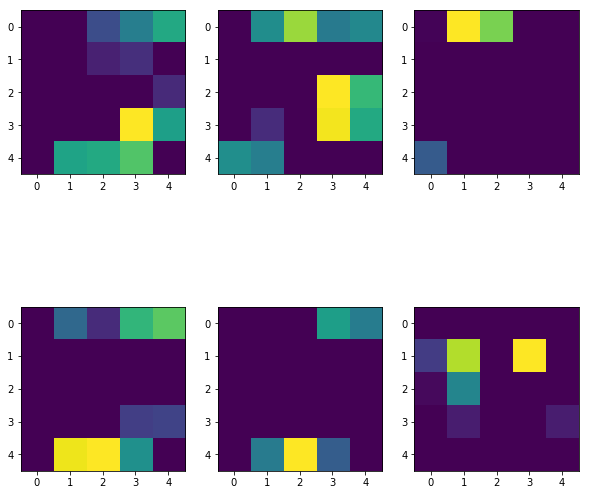

In [321]:
obj.predict_before_display(3,2,3,0);

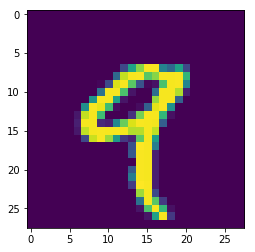

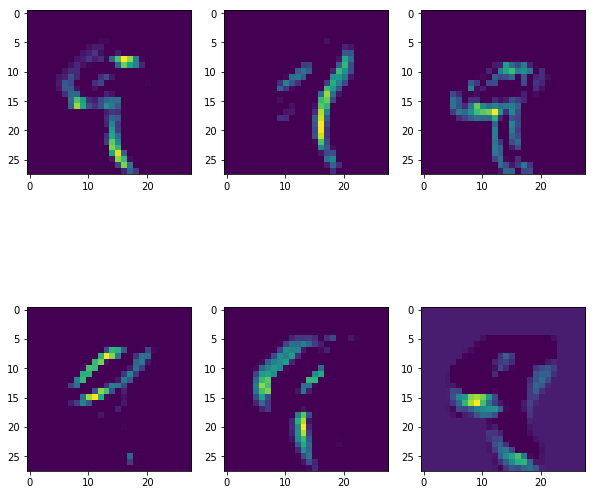

In [322]:
obj.predict_before_display(3,2,0,4);

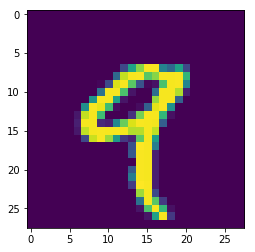

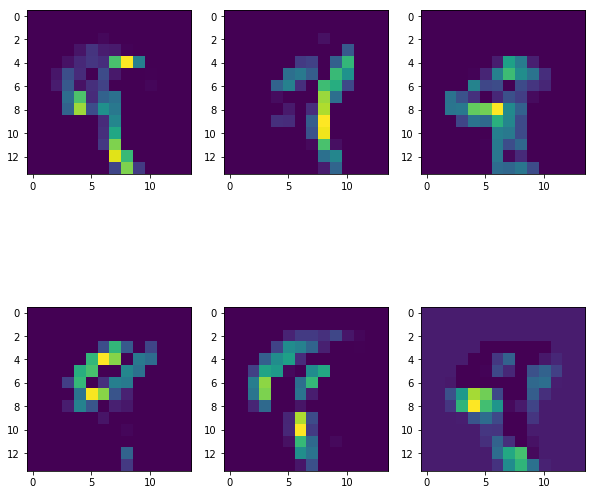

In [323]:
obj.predict_before_display(3,2,1,4);

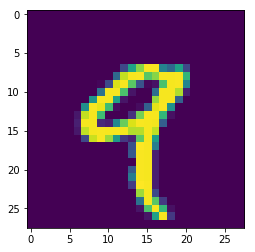

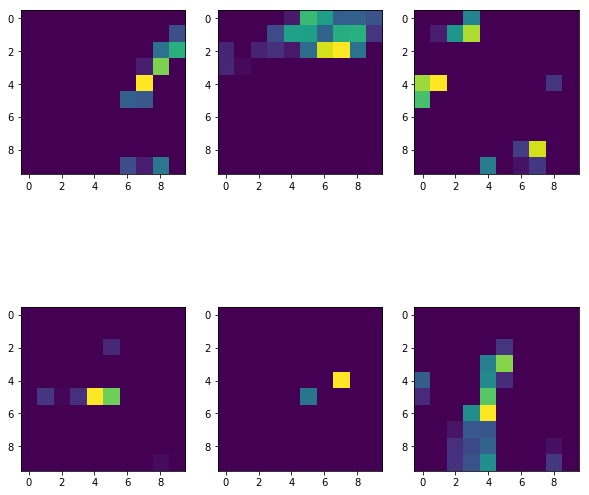

In [324]:
obj.predict_before_display(3,2,2,4);

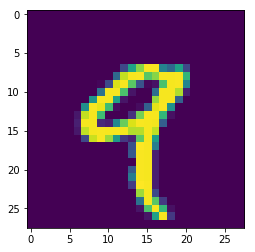

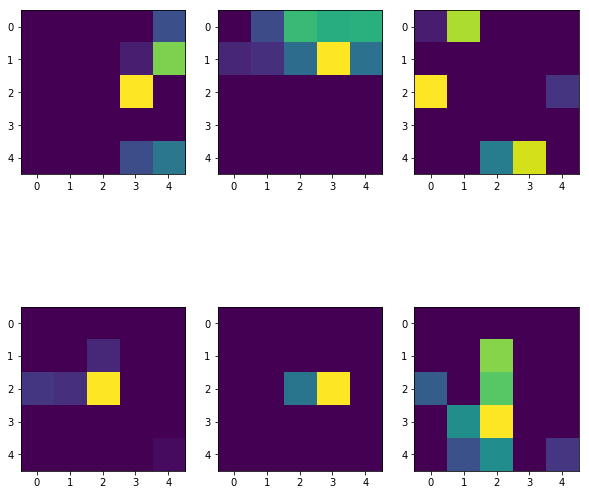

In [325]:
obj.predict_before_display(3,2,3,4);

array([[781,   0,  11,   1,  94,  36,  51,   0,   4,   2],
       [110, 237,   7,   0, 767,   1,   1,  12,   0,   0],
       [ 46,   2, 611,   0, 272,  30,  16,  14,  41,   0],
       [332,   2, 155,   1, 305,  90,  90,  17,  15,   3],
       [101,  75,  22,   0, 691,  21,   3,  62,   2,   5],
       [235,   1,  33,   3, 237, 285,  46,   8,  43,   1],
       [325,   0,   2,   1, 152, 222, 250,   0,   5,   1],
       [153,  48, 134,   0,  60,   3,   0, 624,   6,   0],
       [453,   0, 193,   0, 107,   9,  31,  11, 170,   0],
       [257,   5,  25,   2, 485,  25,   2, 160,  24,  24]], dtype=int64)

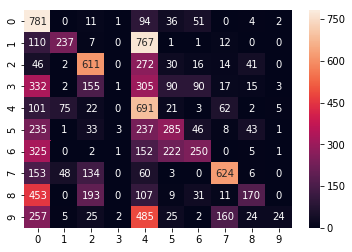

In [326]:
cm = obj.confusion_matrix();
cm

In [327]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.98      1.00      0.99       980
    class 1       0.99      1.00      1.00      1135
    class 2       0.99      1.00      0.99      1032
    class 3       1.00      0.99      0.99      1010
    class 4       0.99      1.00      0.99       982
    class 5       0.99      0.99      0.99       892
    class 6       1.00      0.98      0.99       958
    class 7       0.99      0.98      0.98      1028
    class 8       0.98      0.99      0.98       974
    class 9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [328]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_71 (Dense)             (None, 80)                9680      
__________

In [272]:
#proposed 1 st model
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import h5py
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Model

In [273]:
#proposed network starts here
(x_train1,y_train),(x_test1,y_test) = mnist.load_data();

In [274]:
x_train2 = 255 - x_train1
x_test2 = 255 - x_test1


In [275]:
np.shape(x_test2)

(10000, 28, 28)

In [276]:
x_train = np.vstack((x_train1,x_train2))
y_train = np.hstack((y_train,y_train))
x_test = np.vstack((x_test1,x_test2))
y_test = np.hstack((y_test,y_test))

In [277]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [278]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [279]:
x_train /= 255
x_test /= 255

In [280]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [281]:
np.shape(x_test)

(20000, 28, 28, 1)

In [282]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        plt.imshow(x_train[img_no][:,:,0], cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f, self.ax = plt.subplots(Row_Size, Column_Size, figsize = (Row_Size*10, Column_Size*7.5) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [283]:
filter_size1 = 6;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 16;
kernel_size2 = 5;
pool_size2 = 2;
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'rmsprop';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);


Train on 120000 samples, validate on 20000 samples
Epoch 1/10
120000/120000 [==============================] - 247s 2ms/step - loss: 0.1612 - acc: 0.9493 - val_loss: 0.0746 - val_acc: 0.9768
Epoch 2/10
120000/120000 [==============================] - 169s 1ms/step - loss: 0.0608 - acc: 0.9816 - val_loss: 0.0492 - val_acc: 0.9855
Epoch 3/10
120000/120000 [==============================] - 171s 1ms/step - loss: 0.0506 - acc: 0.9854 - val_loss: 0.0466 - val_acc: 0.9858
Epoch 4/10
120000/120000 [==============================] - 175s 1ms/step - loss: 0.0439 - acc: 0.9871 - val_loss: 0.0484 - val_acc: 0.9849
Epoch 5/10
120000/120000 [==============================] - 182s 2ms/step - loss: 0.0425 - acc: 0.9882 - val_loss: 0.0570 - val_acc: 0.9846
Epoch 6/10
120000/120000 [==============================] - 168s 1ms/step - loss: 0.0424 - acc: 0.9886 - val_loss: 0.0609 - val_acc: 0.9827
Epoch 7/10
120000/120000 [==============================] - 179s 1ms/step - loss: 0.0444 - acc: 0.9882 - val_

In [284]:
test_acc = obj.testing_stage(batchtest_size);




20000/20000 [==============================] - 13s 643us/step


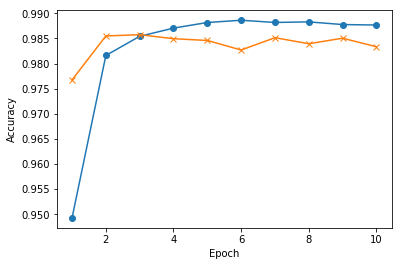

In [285]:
obj.epoch_acc();


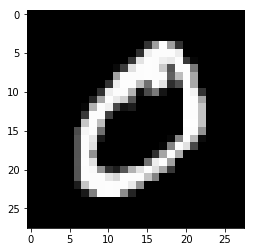

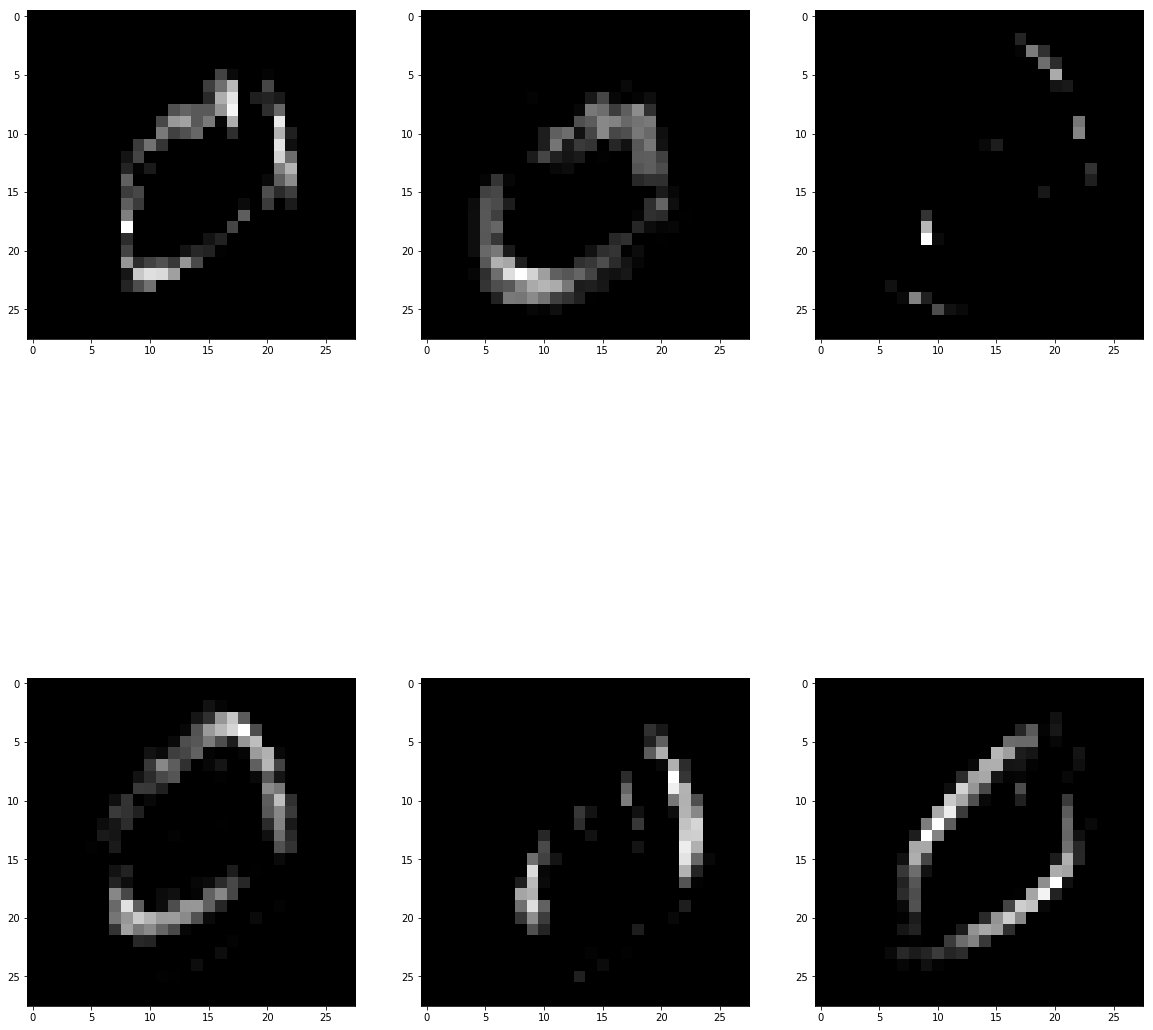

In [286]:
obj.predict_before_display(3,2,0,1);

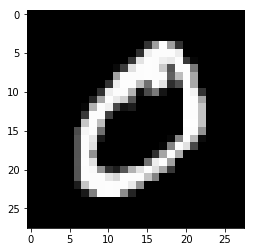

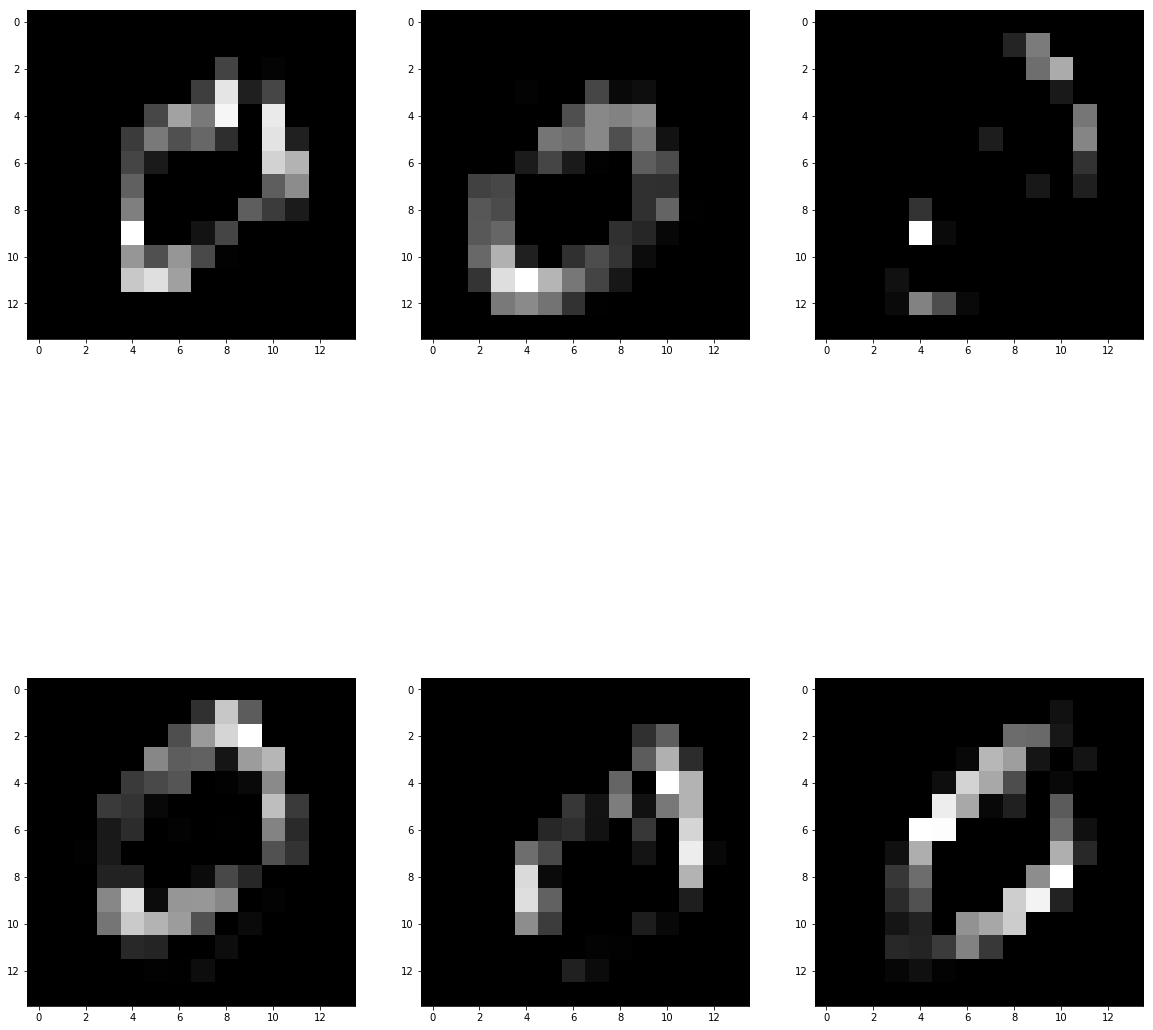

In [287]:
obj.predict_before_display(3,2,1,1);

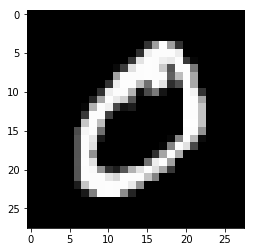

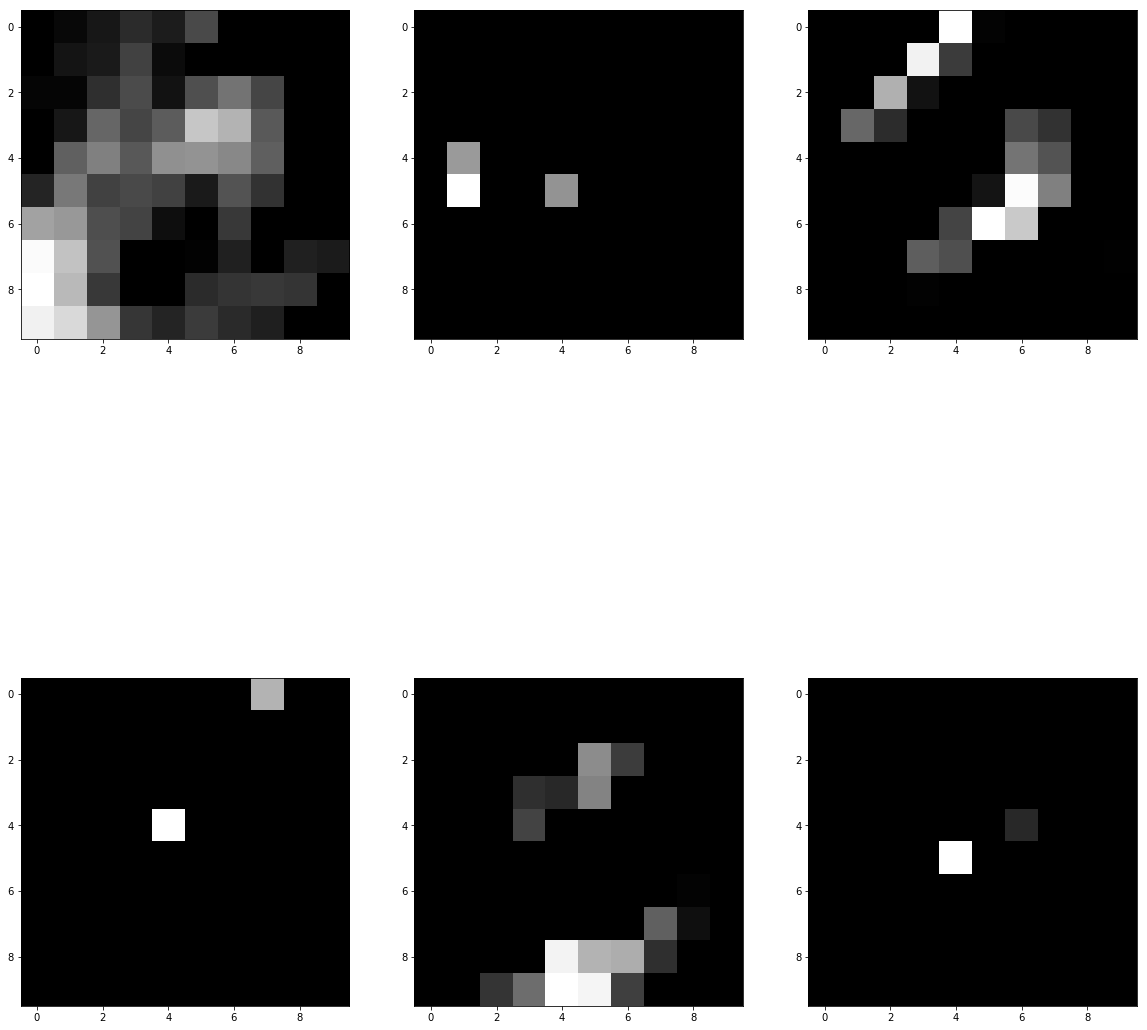

In [288]:
obj.predict_before_display(3,2,2,1);

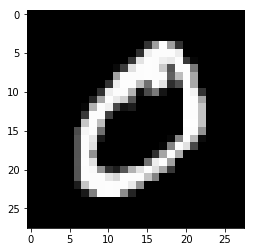

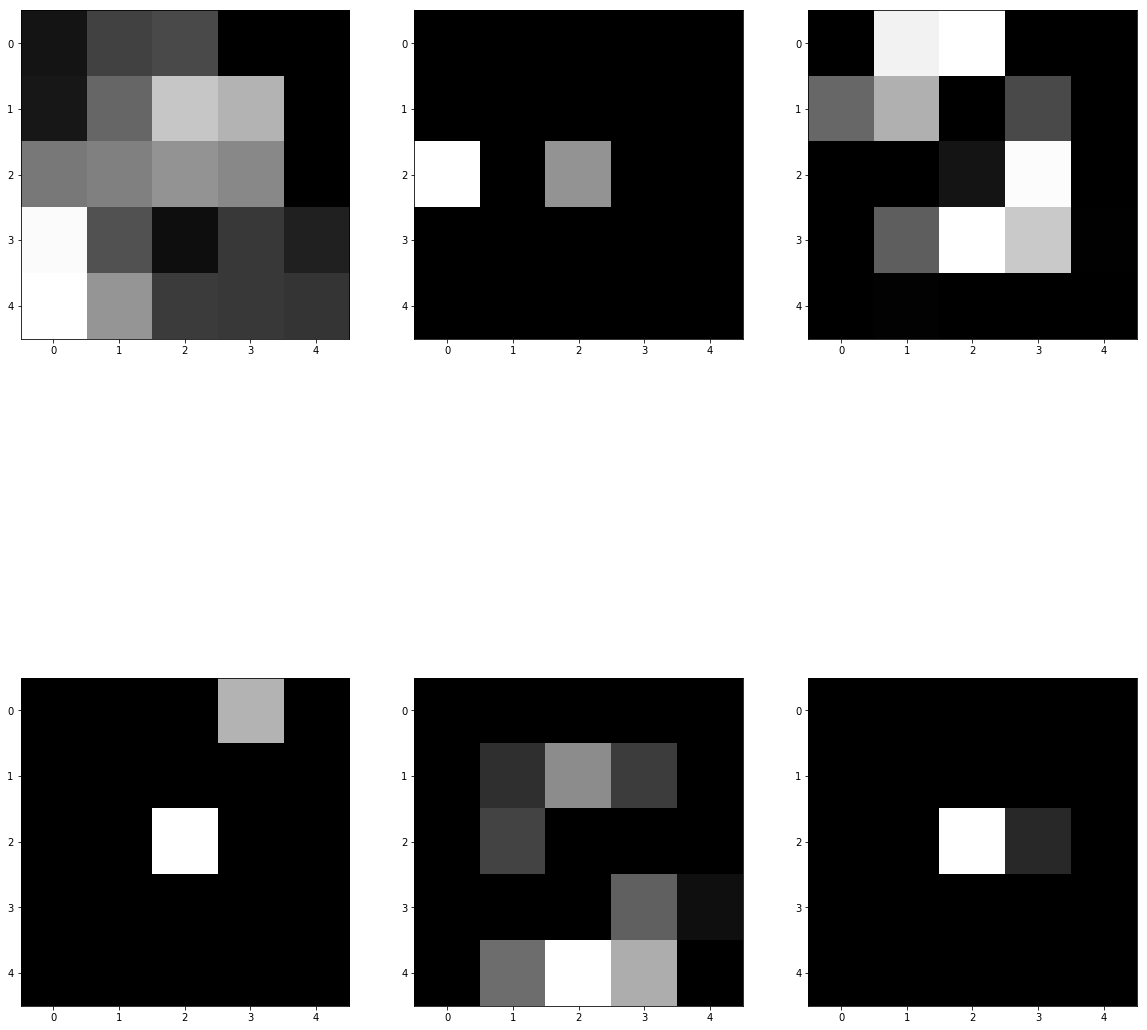

In [289]:
obj.predict_before_display(3,2,3,1);

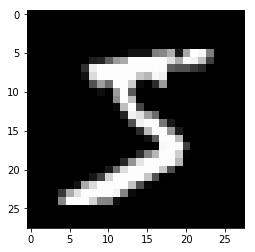

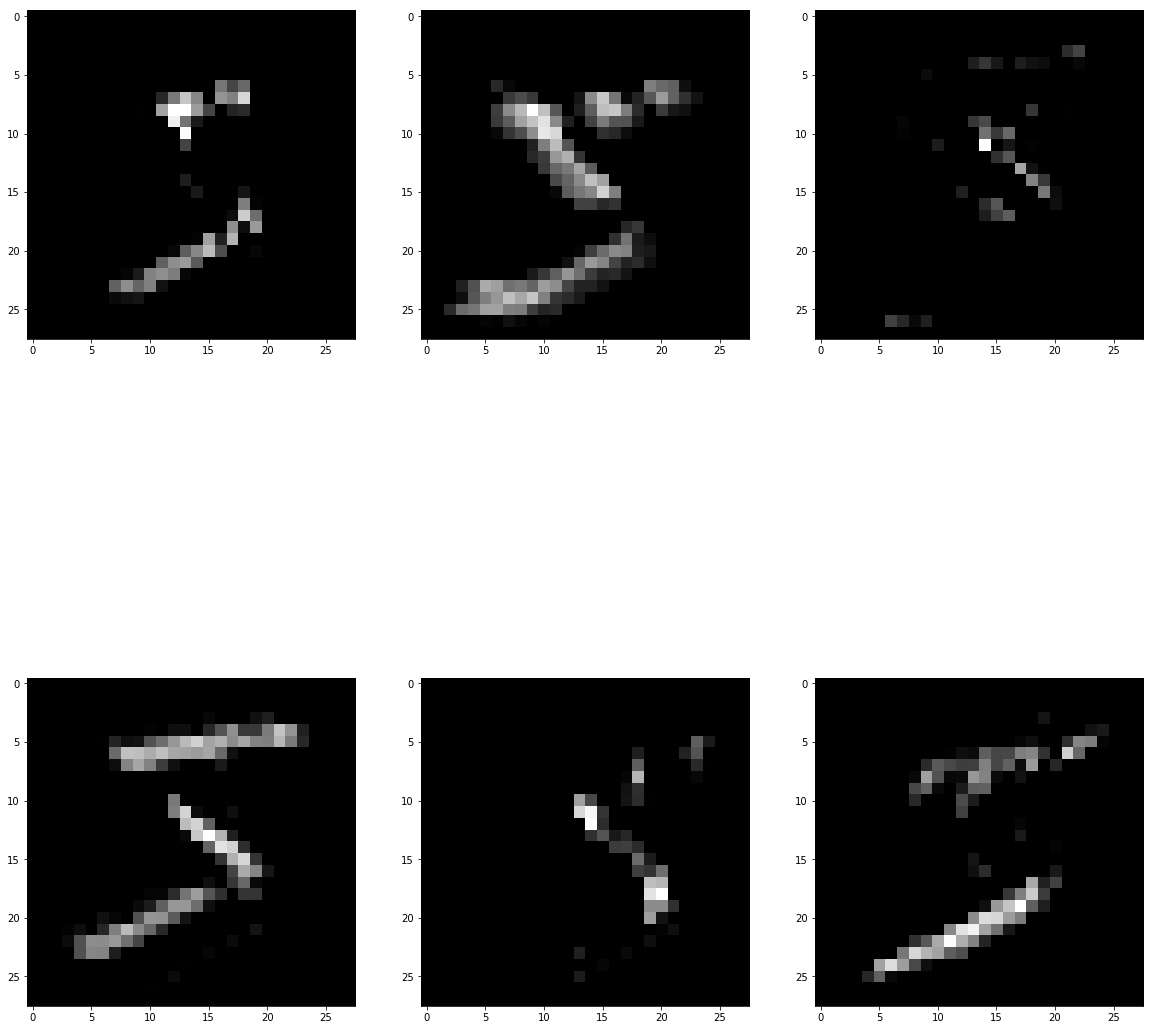

In [290]:
obj.predict_before_display(3,2,0,0);

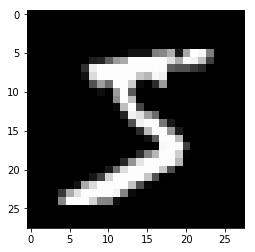

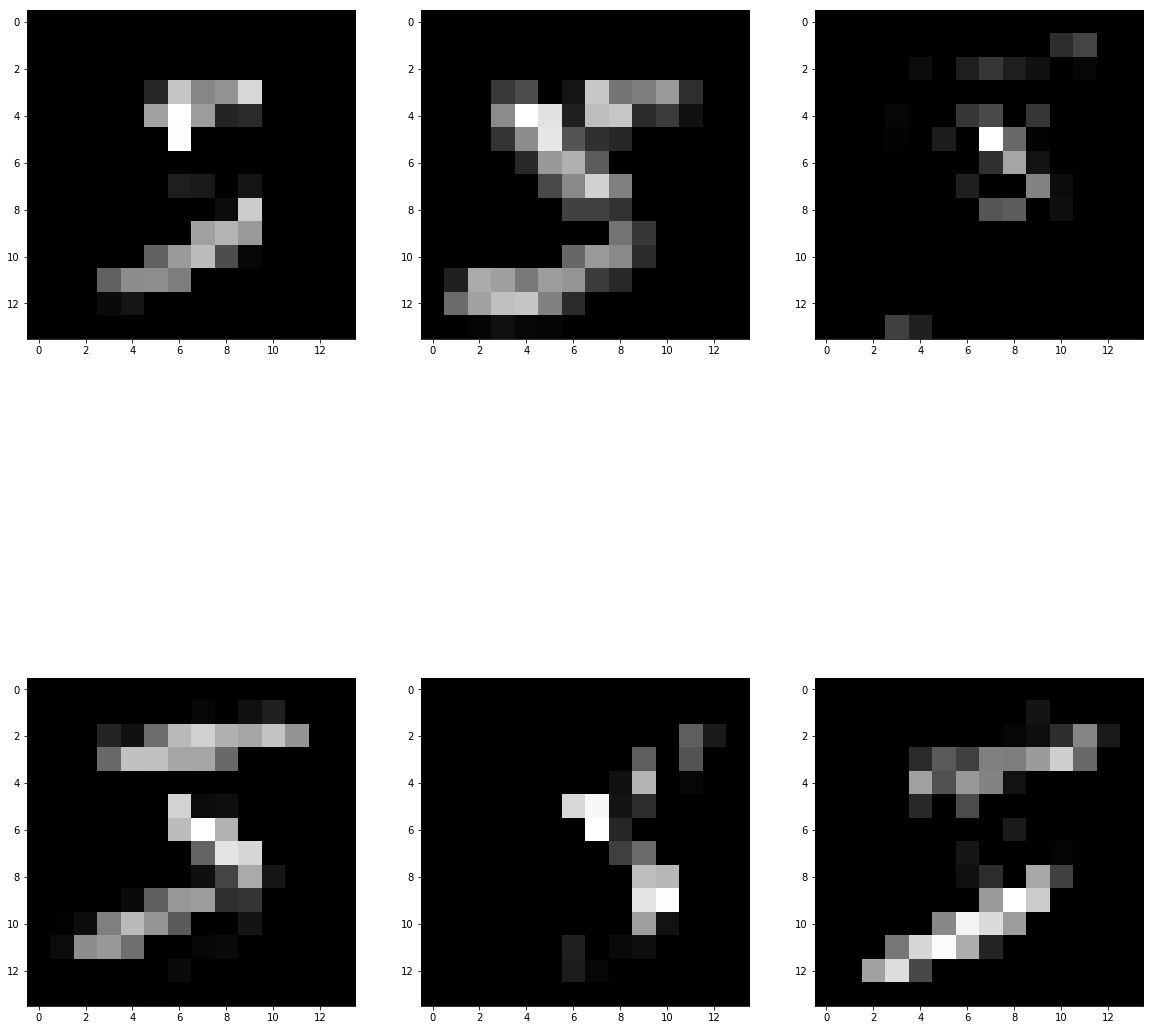

In [291]:
obj.predict_before_display(3,2,1,0);

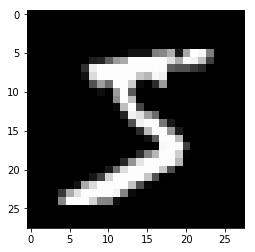

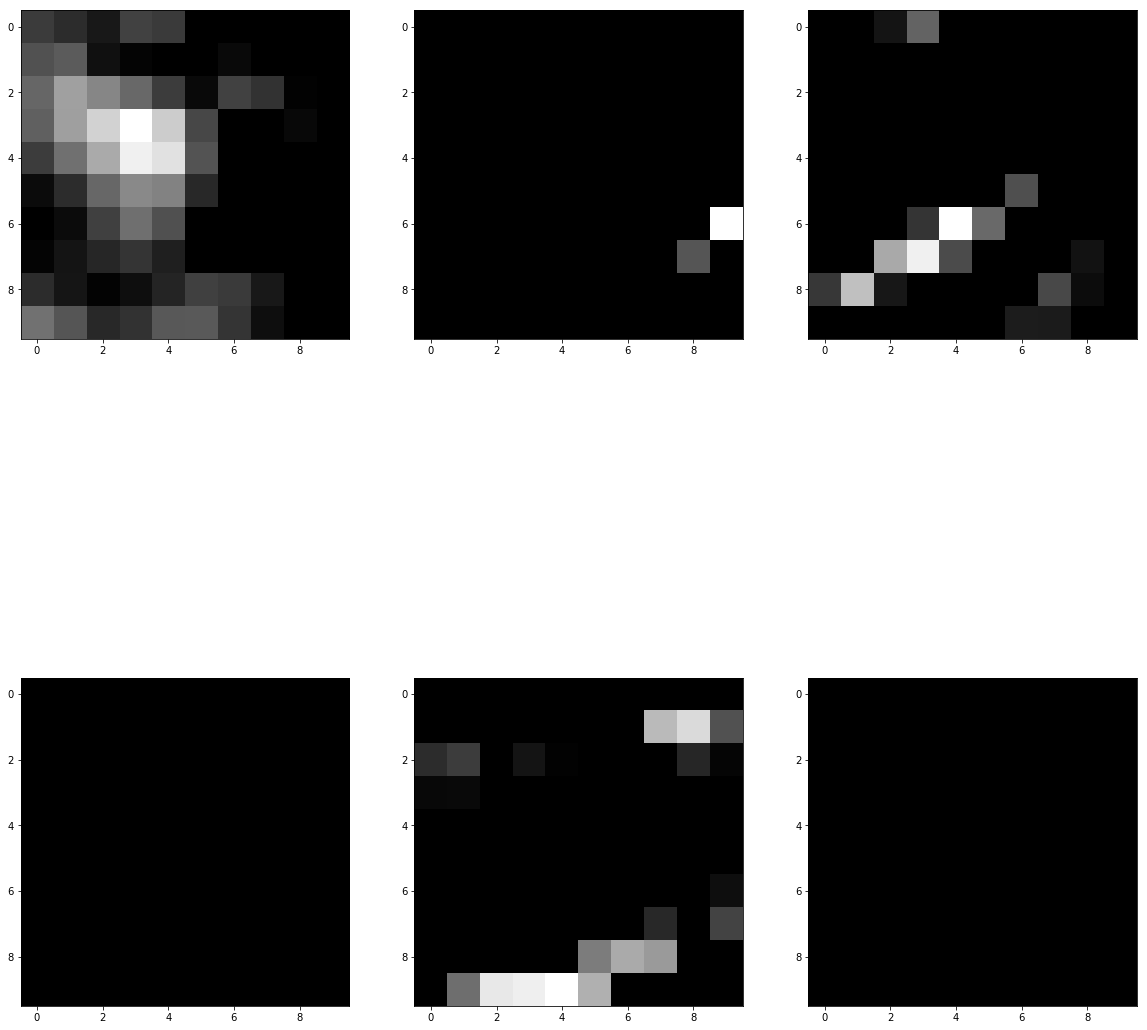

In [292]:
obj.predict_before_display(3,2,2,0);

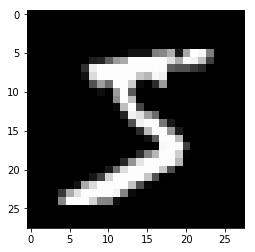

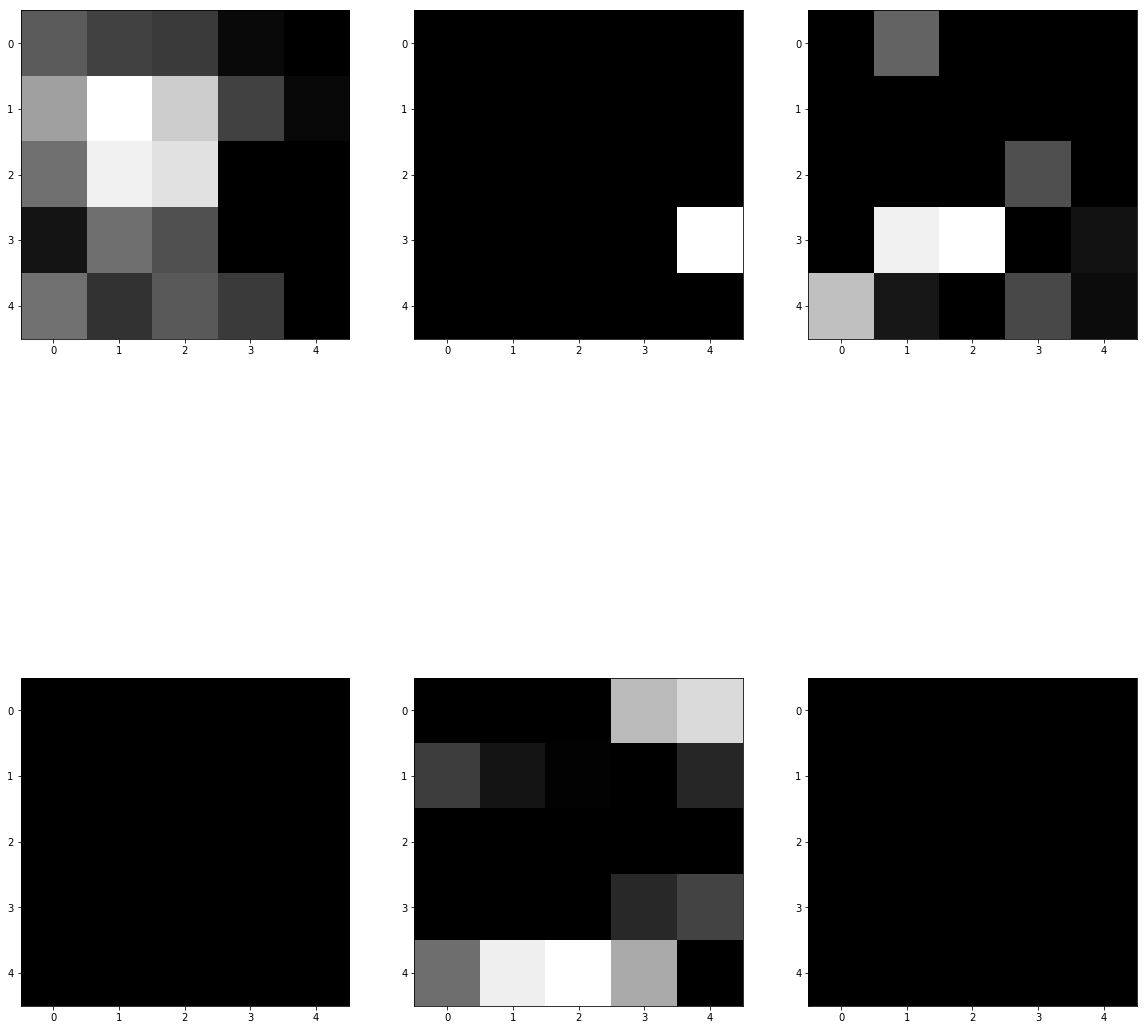

In [293]:
obj.predict_before_display(3,2,3,0);

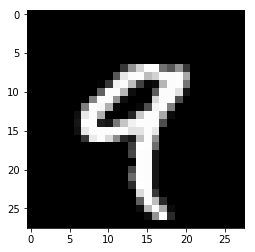

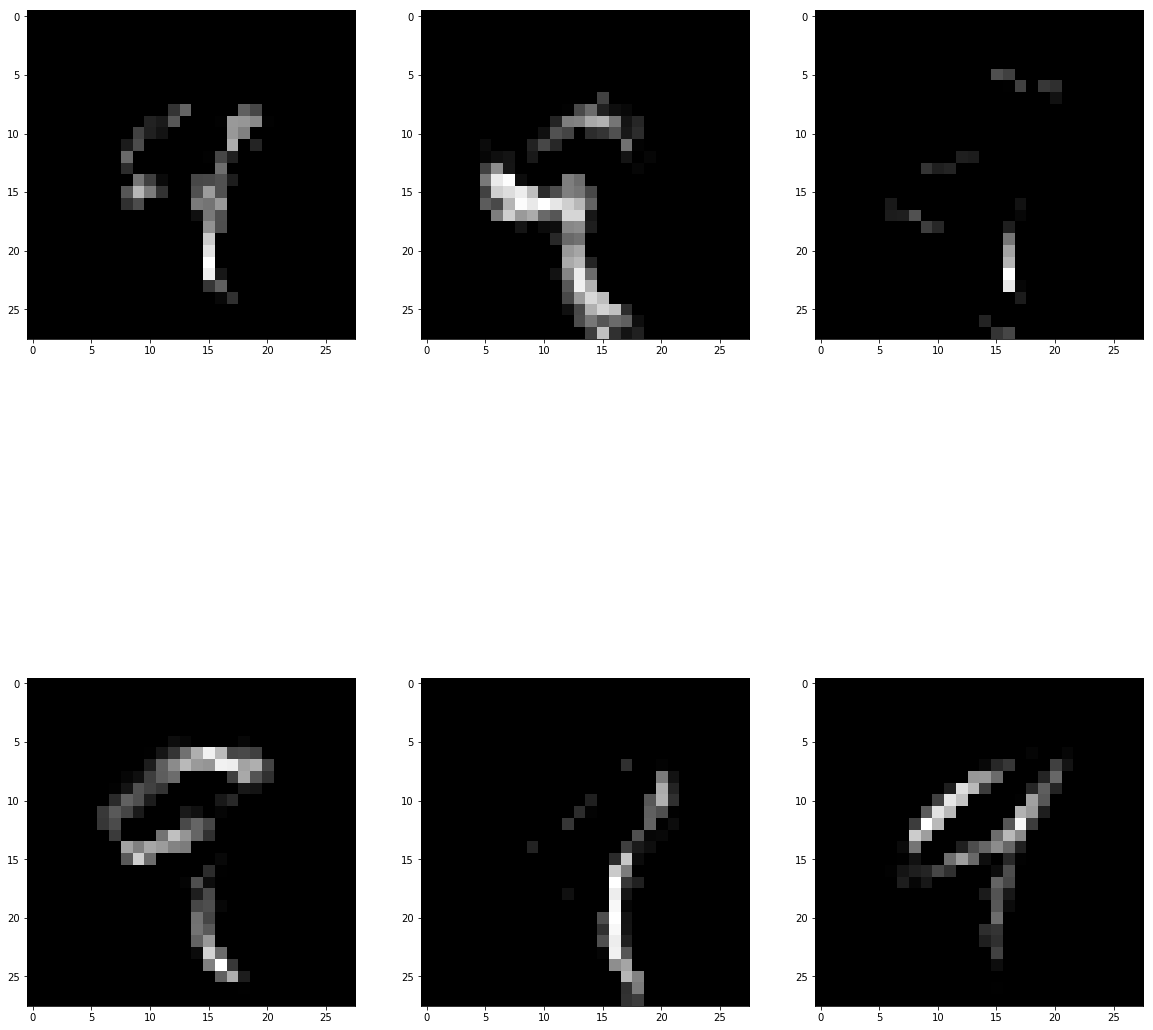

In [294]:
obj.predict_before_display(3,2,0,4);

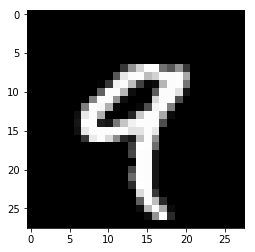

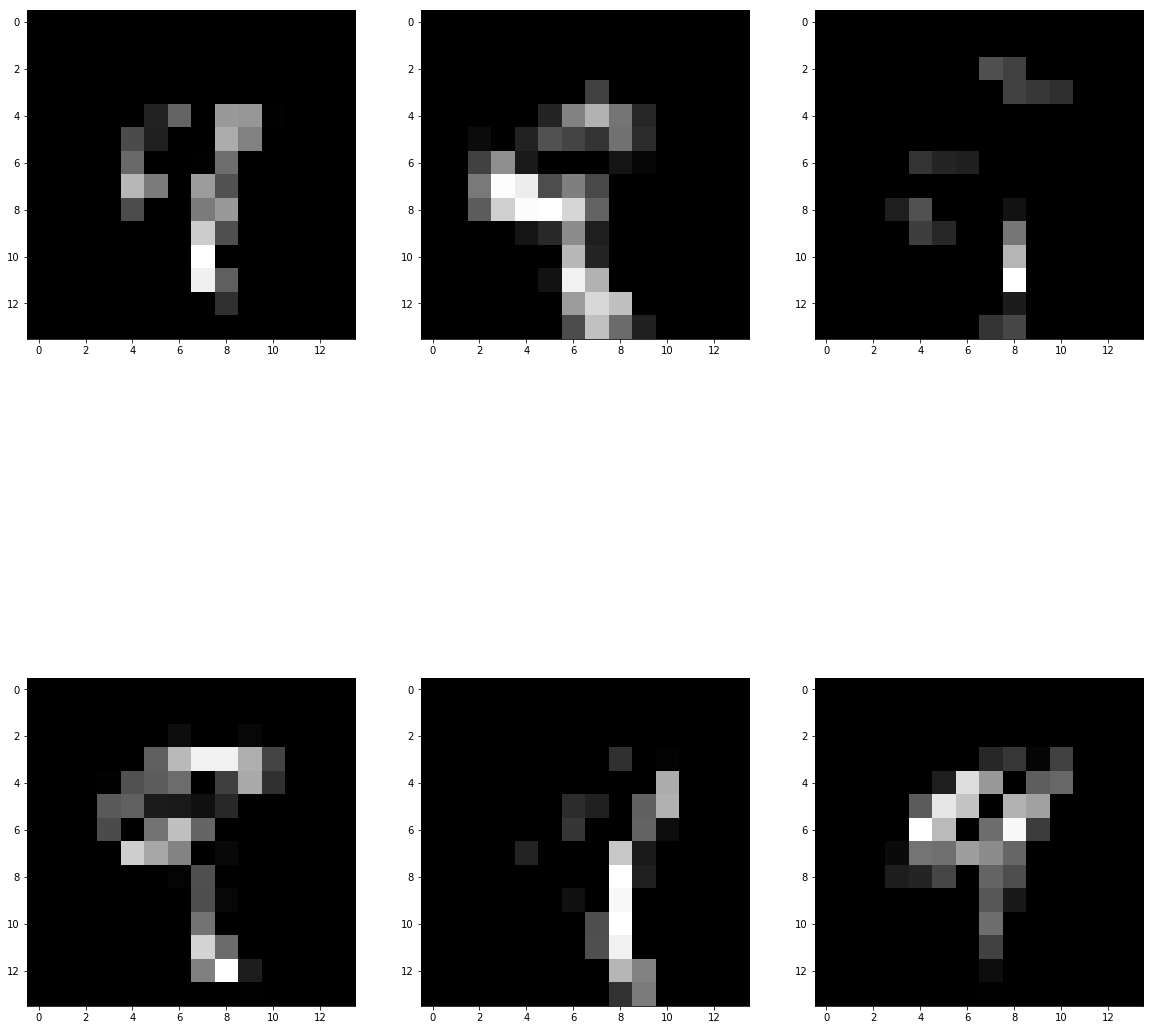

In [295]:
obj.predict_before_display(3,2,1,4);

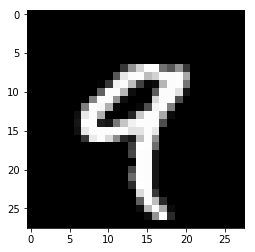

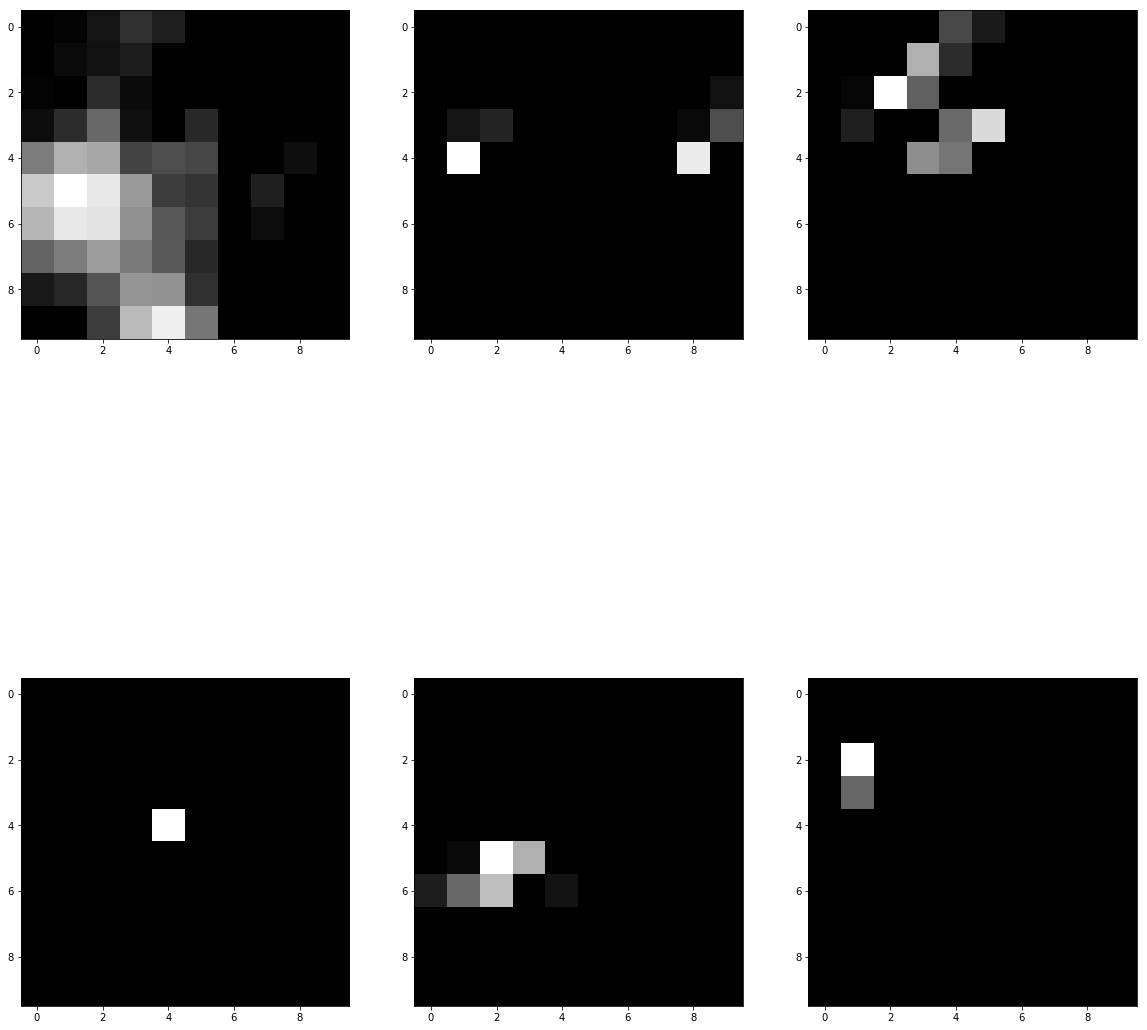

In [296]:
obj.predict_before_display(3,2,2,4);

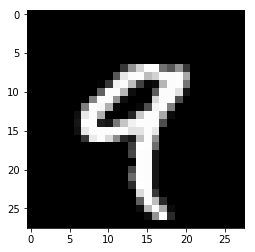

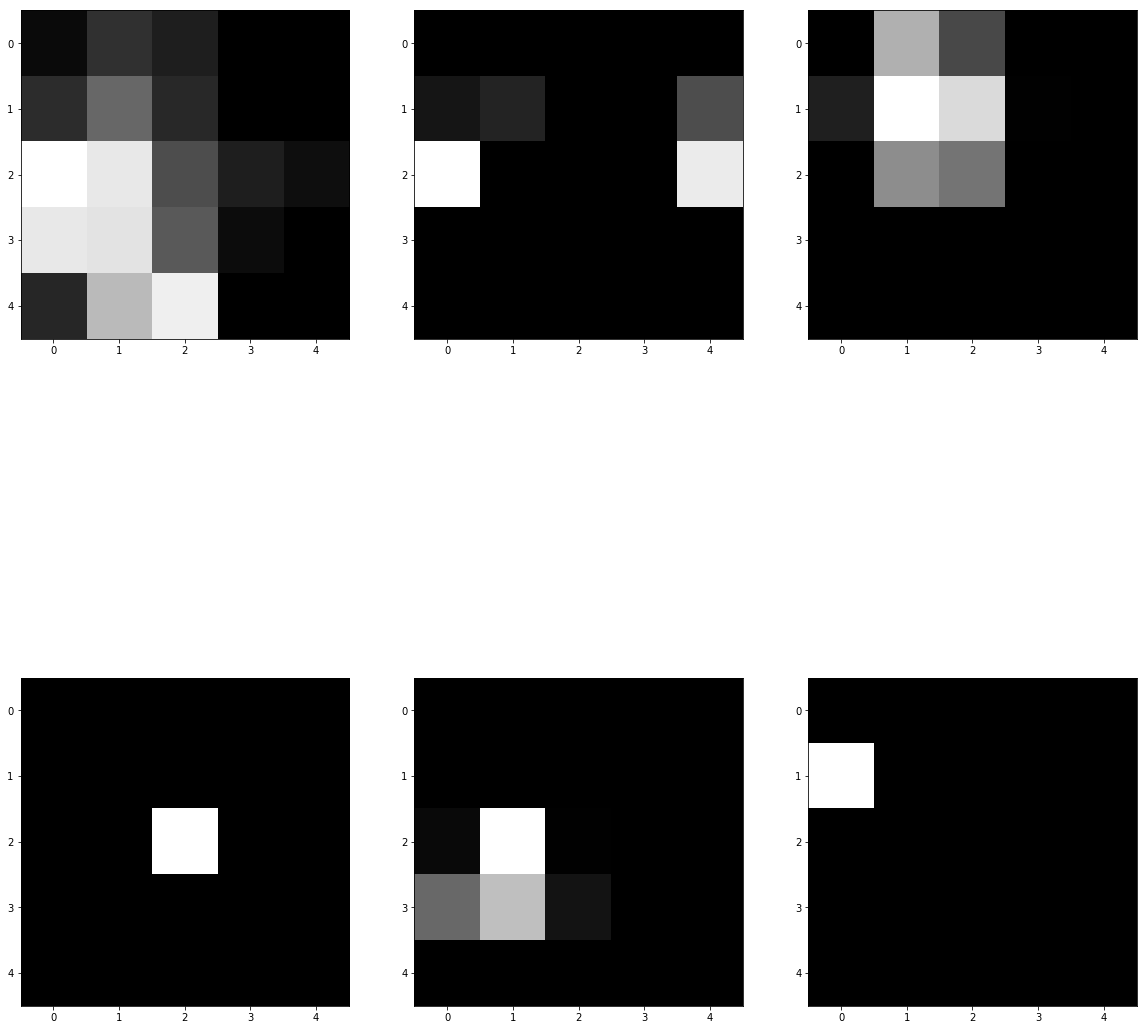

In [297]:
obj.predict_before_display(3,2,3,4);

array([[1943,    0,    4,    2,    0,    0,    4,    3,    2,    2],
       [   0, 2256,    2,    5,    0,    0,    1,    4,    2,    0],
       [   1,    2, 2040,    4,    3,    0,    0,   12,    1,    1],
       [   0,    0,    3, 2010,    0,    4,    0,    1,    0,    2],
       [   0,    0,    3,    0, 1921,    0,    2,    7,    2,   29],
       [   1,    0,    1,   49,    0, 1724,    4,    1,    1,    3],
       [  11,    8,    2,    2,    7,    9, 1866,    0,   11,    0],
       [   0,    1,   12,    6,    4,    1,    0, 2025,    2,    5],
       [   3,    0,    8,   27,    1,    5,    0,    3, 1889,   12],
       [   1,    0,    2,    9,    6,    1,    0,    5,    1, 1993]],
      dtype=int64)

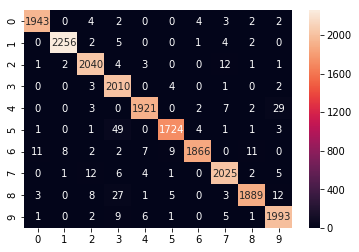

In [298]:
cm = obj.confusion_matrix();
cm

In [299]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99      1960
    class 1       1.00      0.99      0.99      2270
    class 2       0.98      0.99      0.99      2064
    class 3       0.95      1.00      0.97      2020
    class 4       0.99      0.98      0.98      1964
    class 5       0.99      0.97      0.98      1784
    class 6       0.99      0.97      0.98      1916
    class 7       0.98      0.98      0.98      2056
    class 8       0.99      0.97      0.98      1948
    class 9       0.97      0.99      0.98      2018

avg / total       0.98      0.98      0.98     20000



In [300]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_68 (Dense)             (None, 80)                9680      
__________

In [244]:
# Proposed third model
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import h5py
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Model

In [245]:
#proposed network starts here
(x_train1,y_train1),(x_test1,y_test1) = mnist.load_data();

In [246]:
x_train2 = 255 - x_train1
x_test2 = 255 - x_test1


In [247]:
np.shape(x_test1)

(10000, 28, 28)

In [248]:
x_train = np.zeros((120000,28,28));
y_train = np.zeros((120000,))
x_test  = np.zeros((20000,28,28));
y_test = np.zeros((20000,))
m = 0
for i in range(0,60000):
    if(m!=0):
        m = m + 1
    x_train[m][:][:] = x_train1 [i][:][:]
    y_train[m,] = y_train1[i,]
    m = m + 1
    x_train[m][:][:] = x_train2 [i][:][:]
    y_train[m,] = y_train1[i,]
    
m = 0
for i in range(0,10000):
    if(m!=0):
        m = m + 1
    x_test[m][:][:] = x_test1 [i][:][:]
    y_test[m,] = y_test1[i,]
    m = m + 1
    x_test[m][:][:] = x_test2 [i][:][:]
    y_test[m,] = y_test1[i,]
    

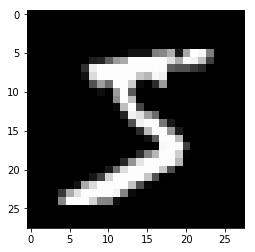

In [249]:
plt.imshow(x_train[0,:,:],cmap='gray')

In [250]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [251]:
sh = np.shape(x_train)
#x_train = x_train.reshape(x_train,[sh[0],sh[1],sh[2],1])
x_train = x_train.reshape(sh[0],sh[1],sh[2],1)
shtest = np.shape(x_test)
x_test = x_test.reshape(shtest[0],shtest[1],shtest[2],1)

In [252]:
x_train /= 255
x_test /= 255

In [253]:
#using the one hot encoding for the labels
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [254]:
class CNN():
    
    def _init_(self):
        self.Conv2D = Conv2D;
        self.MaxPooling2D = MaxPooling2D;
        self.Flatten = Flatten;
        self.Dense = Dense;
        self.final = final;
        
    def add_layers(self, filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, Dense_size1, Dense_size2):
        self.model = Sequential();
        self.model.add(Conv2D(filters = filter_size1, kernel_size = (kernel_size1, kernel_size1), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))
        self.model.add(Conv2D(filters = filter_size2, kernel_size = (kernel_size2, kernel_size2), activation = 'relu'))
        self.model.add(MaxPooling2D(pool_size = (pool_size2, pool_size2)))
        self.model.add(Flatten())
        self.model.add(Dense(Dense_size1, activation = "relu"))
        self.model.add(Dense(Dense_size2, activation = "relu"))
        self.model.add(Dense(10, activation="softmax"))
                       
    def compiling_model(self,optimizer_type,loss_type,metrics_type):
        self.model.compile(optimizer = optimizer_type, 
              loss = loss_type,
              metrics = [metrics_type]);
    
                       
    def training_stage(self,batchtrain_size,epochs_size):
        self.final = self.model.fit(
        x_train,
        y_train,
        batch_size=batchtrain_size,
        epochs=epochs_size,
        validation_data = (x_test,y_test),
        shuffle=True
        )
    
    def testing_stage(self,batchtest_size):
        self.test_acc = self.model.evaluate(x= x_test, y= y_test, batch_size=batchtest_size)
        return self.test_acc;
    
    def epoch_acc(self):
        self.f, self.ax = plt.subplots()
        self.ax.plot([None] + self.final.history['acc'],'o-')
        self.ax.plot([None] + self.final.history['val_acc'],'x-')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        
    def confusion_matrix(self):
        self.roundoff_predictions = self.model.predict_classes(x_test)
        y_test_labels = []
        for i in range(0, len(y_test)):
            y_test_labels.append(int(np.argmax(y_test[i])))
        self.cm = confusion_matrix(y_test_labels, self.roundoff_predictions)
        sns.heatmap(self.cm, annot=True, fmt="d");
        return self.cm;
        
    def predict_before_display(self,Column_Size, Row_Size, id_act, img_no):
        self.ly_output = [i.output for i in self.model.layers]
        self.act_model = Model(inputs = self.model.input, outputs = self.ly_output)
        self.no_act = self.act_model.predict(x_train[img_no].reshape(1,28,28,1))
        self.input_image = x_train[img_no][:,:,0];
        plt.imshow(self.input_image,cmap = 'gray');
        self.act_display(Column_Size, Row_Size, id_act);

    def act_display(self,Column_Size, Row_Size, id_act):
        self.act = self.no_act[id_act];
        self.act_id = 0;
        self.f1, self.ax1 = plt.subplots(Row_Size, Column_Size, figsize = (10, 10) )
        for i in range(0,Row_Size):
            for j in range(0, Column_Size):
                self.ax1[i][j].imshow(self.act[0,:,:,self.act_id],cmap = 'gray')
                self.act_id += 1;
                
    def save_weights(self):
        self.model_structure = self.model.to_json()
        self.f = Path("model_structure.json")
        self.f.write_text(self.model_structure)
        self.model.save_weights("model_weights.h5")
        
        



In [255]:
filter_size1 = 6;
kernel_size1 = 5;
pool_size1 = 2;
filter_size2 = 16;
kernel_size2 = 5;
pool_size2 = 2;
dense_size1 = 120;
dense_size2 = 80;

optimizer_type = 'adam';
loss_type = 'categorical_crossentropy';
metrics_type = 'accuracy';

batchtrain_size = 32;
epochs_size = 10;

batchtest_size = 32;


obj = CNN();
obj.add_layers(filter_size1, kernel_size1, pool_size1, filter_size2, kernel_size2, pool_size2, dense_size1, dense_size2);
obj.compiling_model(optimizer_type,loss_type,metrics_type);
obj.training_stage(batchtrain_size,epochs_size);


Train on 120000 samples, validate on 20000 samples
Epoch 1/10
120000/120000 [==============================] - 214s 2ms/step - loss: 0.1477 - acc: 0.9535 - val_loss: 0.0474 - val_acc: 0.9844
Epoch 2/10
120000/120000 [==============================] - 160s 1ms/step - loss: 0.0526 - acc: 0.9836 - val_loss: 0.0389 - val_acc: 0.9869
Epoch 3/10
120000/120000 [==============================] - 163s 1ms/step - loss: 0.0389 - acc: 0.9877 - val_loss: 0.0346 - val_acc: 0.9884
Epoch 4/10
120000/120000 [==============================] - 163s 1ms/step - loss: 0.0304 - acc: 0.9902 - val_loss: 0.0340 - val_acc: 0.9891
Epoch 5/10
120000/120000 [==============================] - 167s 1ms/step - loss: 0.0259 - acc: 0.9919 - val_loss: 0.0396 - val_acc: 0.9879
Epoch 6/10
120000/120000 [==============================] - 158s 1ms/step - loss: 0.0226 - acc: 0.9926 - val_loss: 0.0427 - val_acc: 0.9880
Epoch 7/10
120000/120000 [==============================] - 157s 1ms/step - loss: 0.0183 - acc: 0.9940 - val_

In [173]:
test = obj.testing_stage(batchtest_size);


20000/20000 [==============================] - 7s 353us/step


None


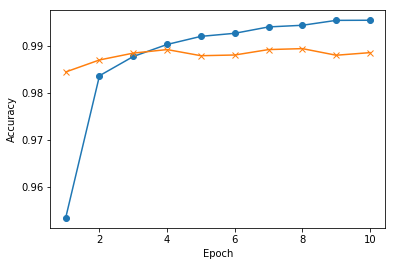

In [256]:
obj.epoch_acc();


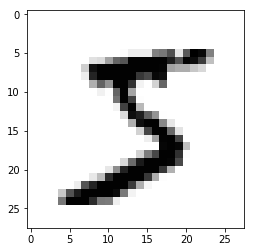

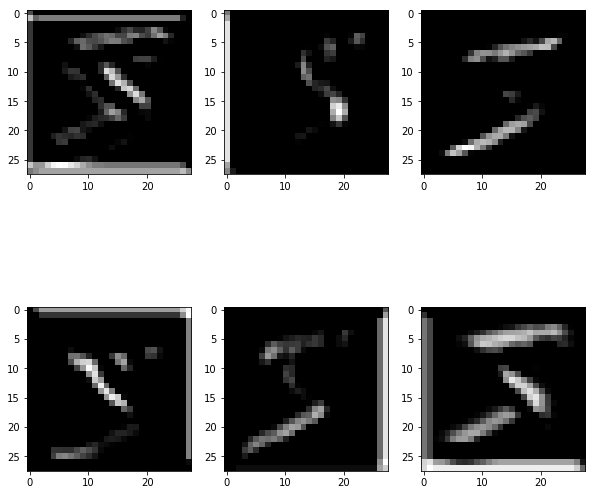

In [257]:
obj.predict_before_display(3,2,0,1);

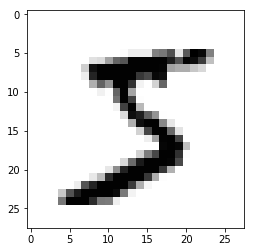

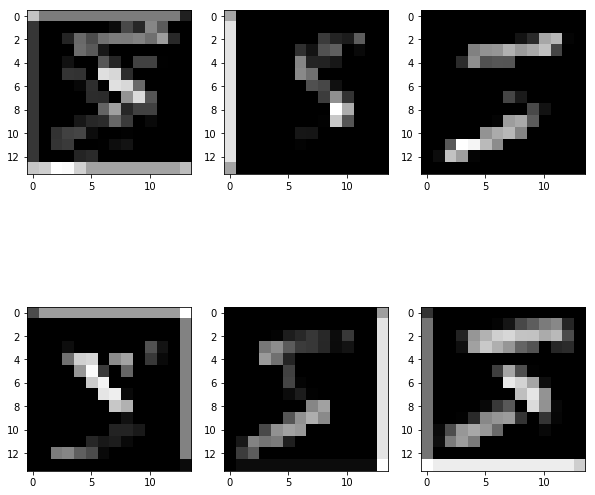

In [258]:
obj.predict_before_display(3,2,1,1);

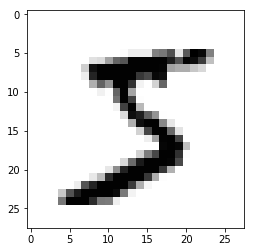

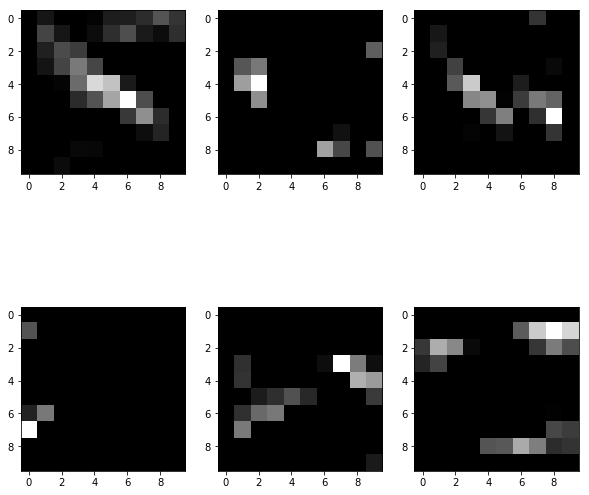

In [259]:
obj.predict_before_display(3,2,2,1);

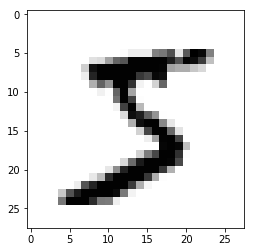

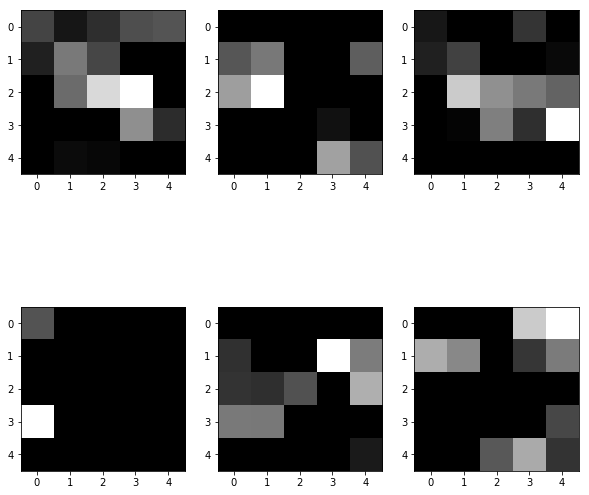

In [260]:
obj.predict_before_display(3,2,3,1);

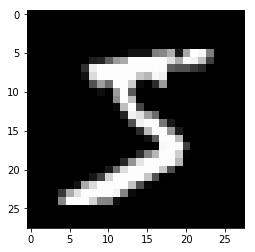

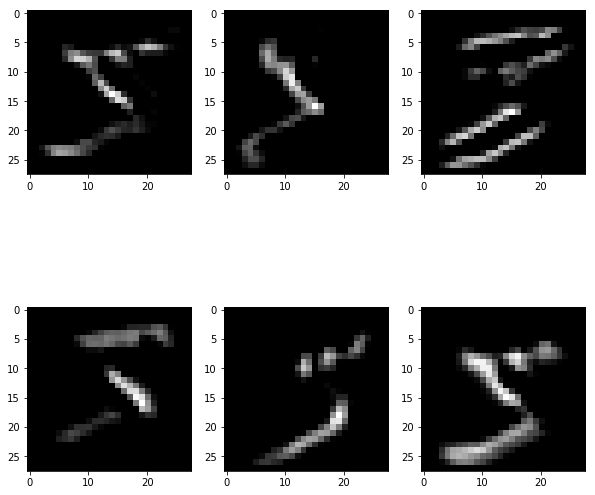

In [261]:
obj.predict_before_display(3,2,0,0);

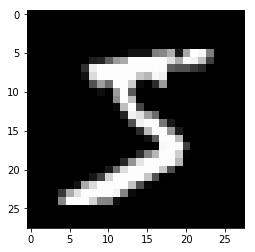

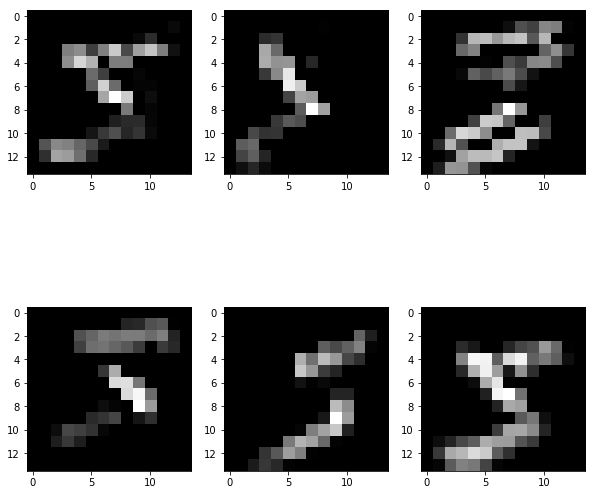

In [262]:
obj.predict_before_display(3,2,1,0);

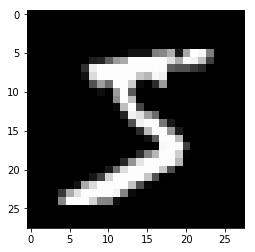

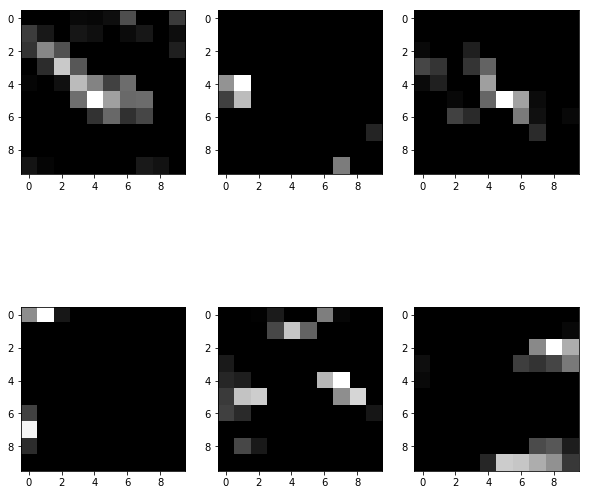

In [263]:
obj.predict_before_display(3,2,2,0);

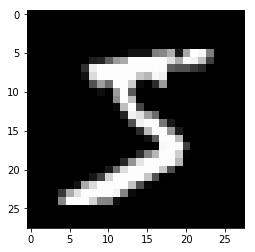

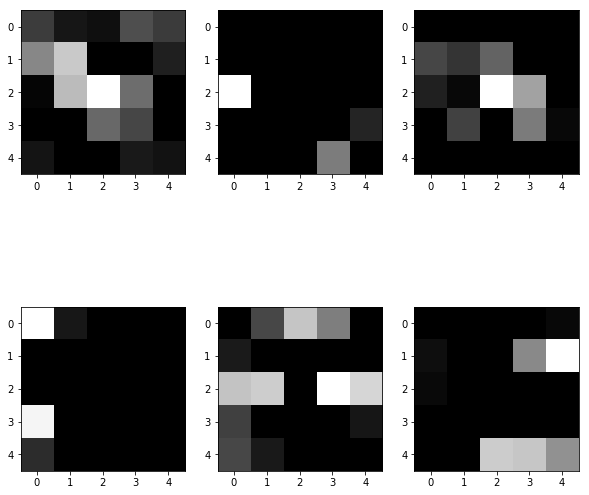

In [264]:
obj.predict_before_display(3,2,3,0);

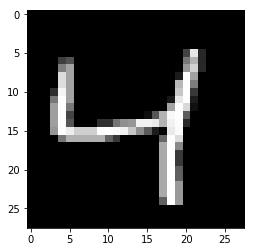

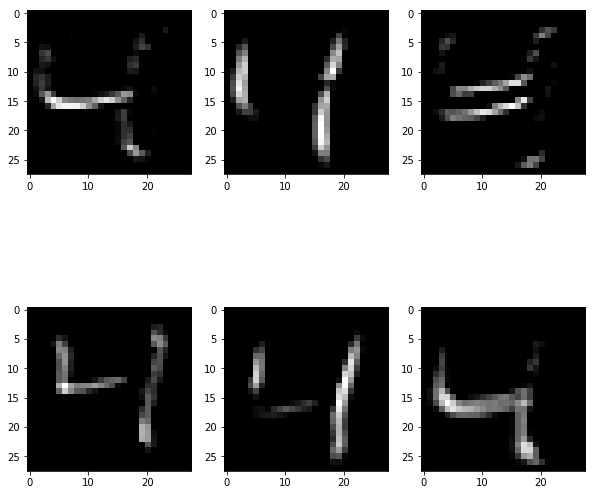

In [265]:
obj.predict_before_display(3,2,0,4);

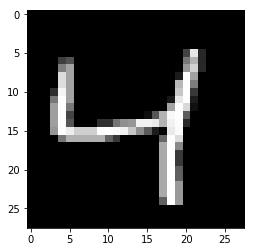

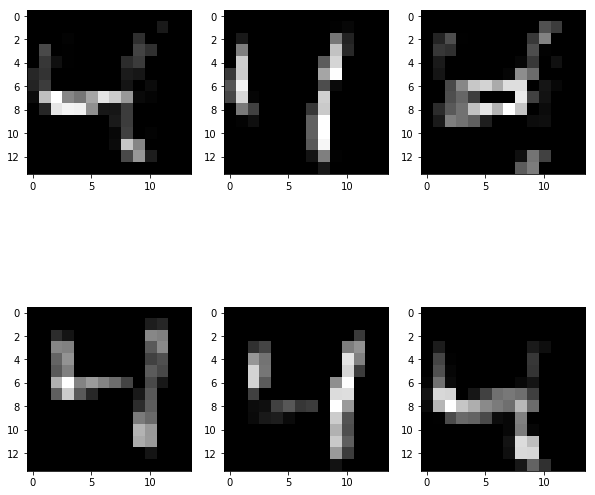

In [266]:
obj.predict_before_display(3,2,1,4);

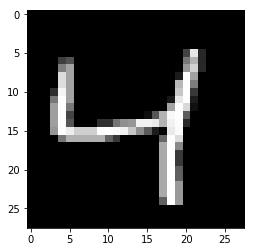

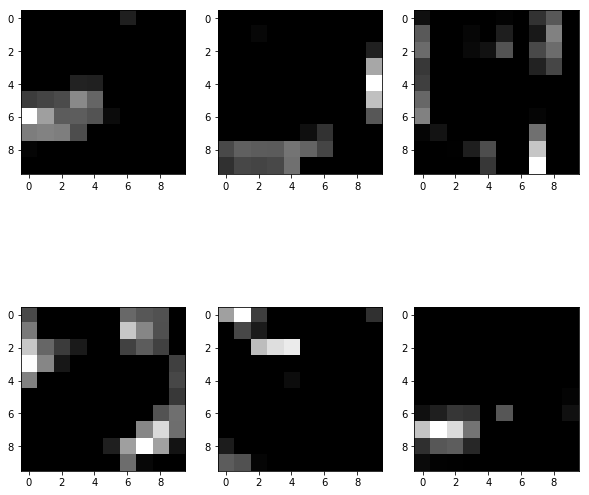

In [267]:
obj.predict_before_display(3,2,2,4);

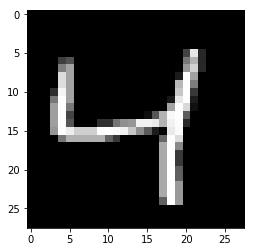

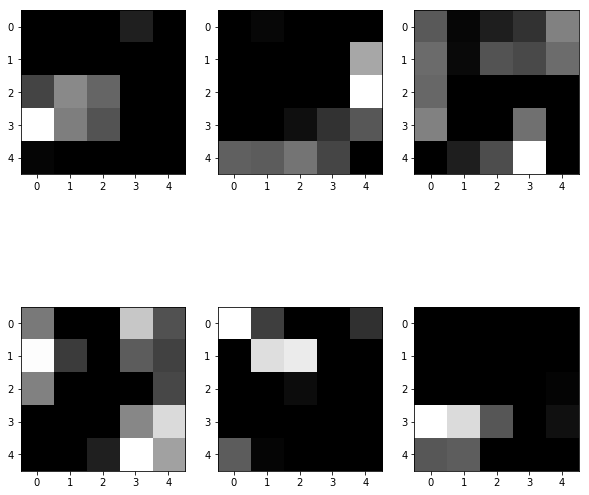

In [268]:
obj.predict_before_display(3,2,3,4);

array([[1953,    1,    1,    0,    0,    0,    2,    2,    1,    0],
       [   1, 2249,    5,    5,    1,    2,    2,    1,    4,    0],
       [   1,    0, 2045,    2,    0,    0,    0,   11,    5,    0],
       [   0,    0,    6, 2006,    0,    3,    0,    0,    5,    0],
       [   0,    0,    3,    0, 1941,    0,    4,    2,    5,    9],
       [   2,    0,    1,   19,    0, 1756,    3,    1,    1,    1],
       [  15,    3,    1,    1,    3,    3, 1885,    0,    5,    0],
       [   0,    2,   11,    1,    0,    0,    0, 2036,    2,    4],
       [   3,    0,    3,    7,    0,    4,    0,    1, 1925,    5],
       [   0,    0,    0,    5,    9,    6,    0,    7,   17, 1974]],
      dtype=int64)

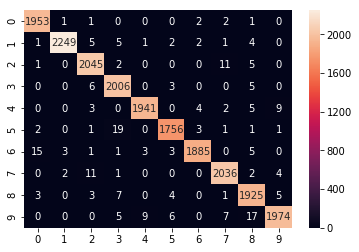

In [269]:
cm = obj.confusion_matrix();
cm

In [270]:
roundoff_predictions = obj.model.predict_classes(x_test)
y_test_labels = []
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
print(classification_report(y_test_labels, roundoff_predictions,target_names = target_names))


             precision    recall  f1-score   support

    class 0       0.99      1.00      0.99      1960
    class 1       1.00      0.99      0.99      2270
    class 2       0.99      0.99      0.99      2064
    class 3       0.98      0.99      0.99      2020
    class 4       0.99      0.99      0.99      1964
    class 5       0.99      0.98      0.99      1784
    class 6       0.99      0.98      0.99      1916
    class 7       0.99      0.99      0.99      2056
    class 8       0.98      0.99      0.98      1948
    class 9       0.99      0.98      0.98      2018

avg / total       0.99      0.99      0.99     20000



In [271]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_65 (Dense)             (None, 80)                9680      
__________

In [29]:
obj.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                9680      
__________